In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
#from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import os
from datetime import datetime
#from phik.report import plot_correlation_matrix
#from patsy import dmatrices
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from featurewiz import featurewiz
#from optbinning import BinningProcess
from sklearn.metrics import classification_report
import openpyxl
#from pycaret.classification import *
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score, roc_curve, auc
import pickle
import jenkspy
from openpyxl.drawing.image import Image
from openpyxl import load_workbook
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set()

In [3]:
file_path = "Input_Sviluppo_Prestitempo_v3.parquet"
df = pd.read_parquet(file_path)

In [4]:
df_clienti = df.copy()

In [5]:
df_clienti

Chiave         PRATICA  \
0       00000192490301_08_2021  00000192490301   
1       00000475601301_08_2021  00000475601301   
2       00005101916200_08_2021  00005101916200   
3       00001553388301_08_2021  00001553388301   
4       00001780466301_08_2021  00001780466301   
...                        ...             ...   
122124  00003306259301_10_2023  00003306259301   
122125  00000315666301_10_2023  00000315666301   
122126  00003304946301_10_2023  00003304946301   
122127  00003387886301_10_2023  00003387886301   
122128  00000374303301_10_2023  00000374303301   

                                            DELIN_HISTORY MOD_PAGAM MOD_PAG  \
0       2322222223322222123232211111119899987665432111...         P      BP   
1          1000000000000000000000000000000000000000000000         P      BP   
2       3321111112222112212121111110111111111121111111...         M      BP   
3                                 43211111211000000000000         P      BP   
4                                     3321222221000000000         P      BP   
...                                                   ...       ...     ...   
122124                                                110         P      BP   
122125  1003210000017788888876543210000000000000000000...         P      BP   
122126                                               1000         R      BP   
122127                                                 11         P      BP   
122128  1001110101000011111111110000100000000000000000...         P      BP   

       TIPO_GARANTE  Denominazione Regione CODICE_PHONIA  \
0              None                Sicilia        AHPTEL   
1                 C                 Veneto        AHPTEL   
2                 C  Friuli-Venezia Giulia        AHPTEL   
3              None                  Lazio        AHPTEL   
4              None                Sicilia        AHPTEL   
...             ...                    ...           ...   
122124         None               Piemonte        AQPTEL   
122125         None              Lombardia        AQPTEL   
122126         None               Piemonte        AQPTEL   
122127         None               Campania        AQPTEL   
122128         None              Lombardia        AQPTEL   

                     DES_PRODOTTO                   DES_BENE    MACROAREA  \
0              PRESTITO PERSONALE                       None  Sud_e_Isole   
1        AUTOMOTIVE AZIENDE NUOVO                       None     Nord_Est   
2          CASA GRANDI INTERVENTI                 ALTRI BENI     Nord_Est   
3         CASA PICCOLI INTERVENTI                 DEPURATORE       Centro   
4                AUTOMOTIVE USATO    Tipo FJ451XH   del 2017  Sud_e_Isole   
...                           ...                        ...          ...   
122124           AUTOMOTIVE NUOVO  DACIA DUSTER JOURNEY UP G   Nord_Ovest   
122125     CASA GRANDI INTERVENTI             CONDIZIONATORI   Nord_Ovest   
122126            REPEAT BUSINESS                       None   Nord_Ovest   
122127                ARREDAMENTO                     CUCINA  Sud_e_Isole   
122128  CONSOLIDAMENTO DEL DEBITO                       None   Nord_Ovest   

       DATA_AFFIDO DATA_FINE_AFFIDO DATA_FINANZIAM DT_VAL_ULT_PAGAM  \
0       2021-08-02       2021-08-13     2017-03-17       2021-07-28   
1       2021-08-02       2021-08-13     2017-10-17       2020-03-16   
2       2021-08-02       2021-08-13     2012-12-17       2021-07-20   
3       2021-08-02       2021-08-13     2019-09-16       2021-07-29   
4       2021-08-02       2021-08-13     2020-01-17       2021-07-01   
...            ...              ...            ...              ...   
122124  2023-10-30       2023-11-10     2023-07-14       2023-09-20   
122125  2023-10-30       2023-11-10     2017-06-13       2023-07-14   
122126  2023-10-30       2023-11-10     2023-06-13       2023-09-13   
122127  2023-10-30       2023-11-10     2023-08-14       2023-10-03   
122128  2023-10-30       2023-11-10     2017-07

In [6]:
df_clienti[(df_clienti['DistanzaAffidoUltimoPagamento'] > 20000) | (df_clienti['DistanzaAffidoUltimoPagamento'] < 0)]

Chiave         PRATICA DELIN_HISTORY MOD_PAGAM  \
1374    00002296932301_09_2021  00002296932301         10  0         P   
1415    00002393340301_09_2021  00002393340301          10 0         P   
1779    00002482052301_10_2021  00002482052301          1000         P   
1811    00002463656301_10_2021  00002463656301            10         P   
2065    00002327951301_11_2021  00002327951301         10  0         P   
...                        ...             ...           ...       ...   
122000  00003409963301_10_2023  00003409963301             1         R   
122059  00003365600301_10_2023  00003365600301             1         P   
122075  00003414834301_10_2023  00003414834301             1         P   
122076  00003302998301_10_2023  00003302998301             1         P   
122114  00003370789301_10_2023  00003370789301             1         R   

       MOD_PAG TIPO_GARANTE Denominazione Regione CODICE_PHONIA  \
1374        BP         None             Lombardia        AHPTEL   
1415        BP         None               Abruzzo        AHPTEL   
1779        BP         None             Lombardia        AHPTEL   
1811        BP         None                Puglia        AHPTEL   
2065        BP         None             Lombardia        AHPTEL   
...        ...          ...                   ...           ...   
122000      BP         None              Campania        AQPTEL   
122059      BP         None        Emilia-Romagna        AQPTEL   
122075      BP         None               Toscana        AQPTEL   
122076      BP         None              Campania        AQPTEL   
122114      BP         None               Toscana        AQPTEL   

                   DES_PRODOTTO                  DES_BENE    MACROAREA  \
1374     CASA GRANDI INTERVENTI                      None   Nord_Ovest   
1415    CASA PICCOLI INTERVENTI       IMPIANTO DI ALLARME       Centro   
1779              SPESE MEDICHE                      None   Nord_Ovest   
1811              SPESE MEDICHE      SPESE ODONTOIATRICHE  Sud_e_Isole   
2065     CASA GRANDI INTERVENTI                      None   Nord_Ovest   
...                         ...                       ...          ...   
122000         AUTOMOTIVE USATO  Sandero 3¼ serie GC243PP  Sud_e_Isole   
122059  CASA PICCOLI INTERVENTI                   CALDAIA     Nord_Est   
122075             TEMPO LIBERO                      None       Centro   
122076              ARREDAMENTO                      None  Sud_e_Isole   
122114             TEMPO LIBERO                      None       Centro   

       DATA_AFFIDO DATA_FINE_AFFIDO DATA_FINANZIAM DT_VAL_ULT_PAGAM  \
1374    2021-09-09       2021-10-02     2021-05-05       0001-01-01   
1415    2021-09-14       2021-10-07     2021-06-09       0001-01-01   
1779    2021-10-19       2021-11-11     2021-07-15       0001-01-01   
1811    2021-10-25       2021-11-17     2021-09-20       0001-01-01   
2065    2021-11-11       2021-12-04     2021-07-07       0001-01-01   
...            ...              ...            ...              ...   
122000  2023-10-27       2023-11-09     2023-09-12       0001-01-01   
122059  2023-10-30       2023-11-11     2023-09-14       0001-01-01   
122075  2023-10-30       2023-11-11     2023-09-14       0001-01-01   
122076  2023-10-30       2023-11-11     2023-06-14       0001-01-01   
122114  2023-10-30       2023-11-10     2023-09-13       0001-01-01   

       DATA_ESTINZ DATA_AGGIORNAMENTO P_INST1_DUE_DATE P_INST2_DUE_DATE  \
1374          None         01/01/0001             None             None   
1415          None         01/01/0001             None             None   
1779          None         01/01/0001             None             None   
1811          None         01/01/0001             None             None   
2065          None         01/01/0001             None             None   
...            ...                ...              ...              ...   
122000        None         01/01/0001             None         

In [7]:
sorted(df_clienti.columns)

['AgeingErogazioneGg',
 'AgeingGestioneGg',
 'CODICE_PHONIA',
 'COD_FISC_INT',
 'CURRENT_BALANCE',
 'Cash Balance',
 'Chiave',
 'Codi_FISC_INT_2',
 'DATA AFFIDO',
 'DATA FINE LAV',
 'DATA_AFFIDO',
 'DATA_AGGIORNAMENTO',
 'DATA_ESTINZ',
 'DATA_FINANZIAM',
 'DATA_FINE_AFFIDO',
 'DELIN_HISTORY',
 'DES_BENE',
 'DES_PRODOTTO',
 'DT_VAL_RAT_IMP1',
 'DT_VAL_RAT_IMP2',
 'DT_VAL_ULT_PAGAM',
 'Denominazione Regione',
 'DistanzaAffidoUltimoPagamento',
 'DurataFinanziamentoAnni',
 'Eta_Debitore',
 'FlagRecOver100',
 'Flag_Cointestazione',
 'Flag_Galleggiamento_3M',
 'Flag_Galleggiamento_6M',
 'Flag_Garante',
 'Flag_Gestione_Prec',
 'Flag_InsolvenzaGrave_12M',
 'Flag_InsolvenzaGrave_3M',
 'Flag_InsolvenzaGrave_6M',
 'Flag_Miglioramento_3M',
 'Flag_Rate_piu_uno',
 'Flag_Riciclo_SDD',
 'Flag_Rifinanziamento',
 'Flag_Scivolamento_3M',
 'Flag_Scivolamento_6M',
 'Flag_rientrototale_6M',
 'IMP_FINANZIATO',
 'IMP_MAXIRATA',
 'IMP_PAG_RAT_IMP1',
 'IMP_PAG_RAT_IMP2',
 'IMP_RAT_IMP1',
 'IMP_RAT_IMP2',
 'MACR

In [8]:
df_clienti['Target_95'].isna().sum()

4

In [9]:
df_clienti['Target_Stopp'].isna().sum()

0

In [10]:
(df_clienti['AgeingGestioneGg'] < 0).value_counts()

False    114062
True       8067
Name: AgeingGestioneGg, dtype: int64

<h6> Modifico la colonna DistanzaAffidoUltimoPagamento </h6>

In [11]:
# # Sostituisco i valori sopra 20000 e sotto 0 con la mediana
# df_clienti['DistanzaAffidoUltimoPagamento'] = np.where(
#     (df_clienti['DistanzaAffidoUltimoPagamento'] > 20000) | (df_clienti['DistanzaAffidoUltimoPagamento'] < 0),
#     df_clienti['DistanzaAffidoUltimoPagamento'].median(),
#     df_clienti['DistanzaAffidoUltimoPagamento']
# )

In [12]:
# Cancello i valori in cui DistanzaAffidoUltimoPagamento è sopra 20000 o sotto 0
df_clienti = df_clienti[(df_clienti['DistanzaAffidoUltimoPagamento'] >= 0) & (df_clienti['DistanzaAffidoUltimoPagamento'] <= 20000)]

In [13]:
df_clienti[(df_clienti['DistanzaAffidoUltimoPagamento'] > 20000) | (df_clienti['DistanzaAffidoUltimoPagamento'] < 0)]

Empty DataFrame
Columns: [Chiave, PRATICA, DELIN_HISTORY, MOD_PAGAM, MOD_PAG, TIPO_GARANTE, Denominazione Regione, CODICE_PHONIA, DES_PRODOTTO, DES_BENE, MACROAREA, DATA_AFFIDO, DATA_FINE_AFFIDO, DATA_FINANZIAM, DT_VAL_ULT_PAGAM, DATA_ESTINZ, DATA_AGGIORNAMENTO, P_INST1_DUE_DATE, P_INST2_DUE_DATE, P_INST3_DUE_DATE, DT_VAL_RAT_IMP1, DT_VAL_RAT_IMP2, P_INST1_VAL_DATE, P_INST3_VAL_DATE, SCAD_MAXIRATA, SCAD_RAT_IMP2, SCAD_RAT_IMP1, DATA AFFIDO, DATA FINE LAV, COD_FISC_INT, Codi_FISC_INT_2, IMP_FINANZIATO, IMP_MAXIRATA, CURRENT_BALANCE, P_INST1_AMOUNT_PAID, P_INST2_AMOUNT_PAID, P_INST3_AMOUNT_PAID, RATE_TOTALI, NUM_RATE_RIFI, NUM_RAT_IMP1, NUM_RAT_IMP2, P_INST1_NUM, P_INST2_NUM, P_INST3_NUM, NUMERO RATE, PROVINCIA, P_INST1_AMOUNT, P_INST2_AMOUNT, P_INST3_AMOUNT, IMP_RAT_IMP1, IMP_RAT_IMP2, IMP_PAG_RAT_IMP1, IMP_PAG_RAT_IMP2, TOT_RATE_AFF_INIZIO_MAND, TOT_MORA_AFF_INIZIO_MAND, TOT_ONERI_AFF_INIZIO_MAND, TOT_AFF_INIZIO_MAND, TOT_RATE_PAG, TOT_MORA_PAG, TOT_ONERI_PAG, TOT_PAG, TOT_RATE_AFF, TOT_MORA_AFF, TOT_ONERI_AFF, TOT_AFF, TOT REC, TOT AFF, Cash Balance, Flag_Riciclo_SDD, Flag_Rifinanziamento, Flag_Garante, Flag_Cointestazione, Metodo_pagamento, Ratio_Rate_Imp1, Ratio_Rate_Imp2, AgeingErogazioneGg, AgeingGestioneGg, DurataFinanziamentoAnni, DistanzaAffidoUltimoPagamento, Sesso, Eta_Debitore, Nazionalita, NOSTART12M, NOSTART6M, Flag_Galleggiamento_3M, Flag_Galleggiamento_6M, Flag_Gestione_Prec, Flag_InsolvenzaGrave_3M, Flag_InsolvenzaGrave_6M, Flag_Miglioramento_3M, Flag_Rate_piu_uno, Flag_rientrototale_6M, Flag_Scivolamento_3M, Flag_Scivolamento_6M, Numero_mesi_rec, Severity_12M, Severity_12M_pesata, Flag_InsolvenzaGrave_12M, Target_95, Target_Stopp, ...]
Index: []

In [14]:
df_clienti.shape

(119675, 101)

<h6> Modifico la colonna AgeingGestioneGg </h6>

In [15]:
(df_clienti['AgeingGestioneGg'] < 0).value_counts()

False    111627
True       8048
Name: AgeingGestioneGg, dtype: int64

In [16]:
df_clienti[df_clienti['AgeingGestioneGg'] < 0]['AgeingGestioneGg']

1          -897.00
4        -2,144.00
8        -1,841.00
9        -3,090.00
10       -1,416.00
            ...   
122090     -473.00
122093   -1,384.00
122098   -1,171.00
122106     -410.00
122117     -714.00
Name: AgeingGestioneGg, Length: 8048, dtype: float64

In [17]:
# Sostituisco i valori negativi di AgeingGestioneGg con -999
df_clienti.loc[df_clienti['AgeingGestioneGg'] < 0, 'AgeingGestioneGg'] = -999

In [18]:
df_clienti[df_clienti['AgeingGestioneGg'] < 0]['AgeingGestioneGg']

1        -999.00
4        -999.00
8        -999.00
9        -999.00
10       -999.00
           ...  
122090   -999.00
122093   -999.00
122098   -999.00
122106   -999.00
122117   -999.00
Name: AgeingGestioneGg, Length: 8048, dtype: float64

In [19]:
df_clienti[df_clienti['AgeingGestioneGg'] > 40]['AgeingGestioneGg']

10796       67.00
16302       43.00
16303       43.00
16306       41.00
16320       43.00
           ...   
71864       58.00
71882       57.00
71981       46.00
78962       74.00
121931   2,114.00
Name: AgeingGestioneGg, Length: 1633, dtype: float64

In [20]:
# Sostituisco i valori sopra 40 di AgeingGestioneGg con 999
df_clienti.loc[df_clienti['AgeingGestioneGg'] > 40, 'AgeingGestioneGg'] = 999

In [21]:
df_clienti[df_clienti['AgeingGestioneGg'] > 40]['AgeingGestioneGg']

10796    999.00
16302    999.00
16303    999.00
16306    999.00
16320    999.00
          ...  
71864    999.00
71882    999.00
71981    999.00
78962    999.00
121931   999.00
Name: AgeingGestioneGg, Length: 1633, dtype: float64

<h6> Ricalcolo la colonna Target_95 perchè ha dei valori mancanti </h6>

In [22]:
df_clienti['Target_95'] = (df_clienti['TOT REC'] / df_clienti['TOT AFF'] >= 0.95).astype(int)

C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\3203753327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clienti['Target_95'] = (df_clienti['TOT REC'] / df_clienti['TOT AFF'] >= 0.95).astype(int)


In [23]:
df_clienti['Target_95'].isna().sum()

0

In [24]:
df_clienti.shape

(119675, 101)

In [25]:
# Definiamo una funzione per spostare le colonne all'inizio del dataset
def move_column_inplace(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)

In [26]:
# Spostiamo il Target_95 sulla prima colonna
move_column_inplace(df_clienti,'Target_95',0)

In [27]:
move_column_inplace(df_clienti,'Target_Stopp',0)

In [28]:
df_clienti

Target_Stopp  Target_95                  Chiave         PRATICA  \
0                 0          0  00000192490301_08_2021  00000192490301   
1                 0          0  00000475601301_08_2021  00000475601301   
2                 0          0  00005101916200_08_2021  00005101916200   
3                 0          0  00001553388301_08_2021  00001553388301   
4                 0          0  00001780466301_08_2021  00001780466301   
...             ...        ...                     ...             ...   
122124            0          0  00003306259301_10_2023  00003306259301   
122125            0          0  00000315666301_10_2023  00000315666301   
122126            0          0  00003304946301_10_2023  00003304946301   
122127            1          0  00003387886301_10_2023  00003387886301   
122128            0          0  00000374303301_10_2023  00000374303301   

                                            DELIN_HISTORY MOD_PAGAM MOD_PAG  \
0       2322222223322222123232211111119899987665432111...         P      BP   
1          1000000000000000000000000000000000000000000000         P      BP   
2       3321111112222112212121111110111111111121111111...         M      BP   
3                                 43211111211000000000000         P      BP   
4                                     3321222221000000000         P      BP   
...                                                   ...       ...     ...   
122124                                                110         P      BP   
122125  1003210000017788888876543210000000000000000000...         P      BP   
122126                                               1000         R      BP   
122127                                                 11         P      BP   
122128  1001110101000011111111110000100000000000000000...         P      BP   

       TIPO_GARANTE  Denominazione Regione CODICE_PHONIA  \
0              None                Sicilia        AHPTEL   
1                 C                 Veneto        AHPTEL   
2                 C  Friuli-Venezia Giulia        AHPTEL   
3              None                  Lazio        AHPTEL   
4              None                Sicilia        AHPTEL   
...             ...                    ...           ...   
122124         None               Piemonte        AQPTEL   
122125         None              Lombardia        AQPTEL   
122126         None               Piemonte        AQPTEL   
122127         None               Campania        AQPTEL   
122128         None              Lombardia        AQPTEL   

                     DES_PRODOTTO                   DES_BENE    MACROAREA  \
0              PRESTITO PERSONALE                       None  Sud_e_Isole   
1        AUTOMOTIVE AZIENDE NUOVO                       None     Nord_Est   
2          CASA GRANDI INTERVENTI                 ALTRI BENI     Nord_Est   
3         CASA PICCOLI INTERVENTI                 DEPURATORE       Centro   
4                AUTOMOTIVE USATO    Tipo FJ451XH   del 2017  Sud_e_Isole   
...                           ...                        ...          ...   
122124           AUTOMOTIVE NUOVO  DACIA DUSTER JOURNEY UP G   Nord_Ovest   
122125     CASA GRANDI INTERVENTI             CONDIZIONATORI   Nord_Ovest   
122126            REPEAT BUSINESS                       None   Nord_Ovest   
122127                ARREDAMENTO                     CUCINA  Sud_e_Isole   
122128  CONSOLIDAMENTO DEL DEBITO                       None   Nord_Ovest   

       DATA_AFFIDO DATA_FINE_AFFIDO DATA_FINANZIAM DT_VAL_ULT_PAGAM  \
0       2021-08-02       2021-08-13     2017-03-17       2021-07-28   
1       2021-08-02       2021-08-13     2017-10-17       2020-03-16   
2       2021-08-02       2021-08-13     2012-12-17       2021-07-20   
3       2021-08-02       2021-08-13     2019-09-16       2021-07-29   
4       2021-08-02       2021-08-13     2020-01-17       2021-07-01   
...            ...              ...            ...              ...   
122124  2023-10-30       2

In [29]:
df_clienti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119675 entries, 0 to 122128
Columns: 101 entries, Target_Stopp to FlagRecOver100
dtypes: float64(42), int32(2), object(57)
memory usage: 92.2+ MB


### Cluster sulla colonna DES_PRODOTTO

In [30]:
df_cluster = df_clienti.copy()

In [31]:
sorted(df_cluster['DES_PRODOTTO'].unique())

['ALTRI BENI E SERVIZI',
 'ALTRO FINALIZZATO PER AZI',
 'ARREDAMENTO',
 'AUTOMOTIVE AZIENDE NUOVO',
 'AUTOMOTIVE NUOVO',
 'AUTOMOTIVE USATO',
 'CASA GRANDI INTERVENTI',
 'CASA PICCOLI INTERVENTI',
 'CONSOLIDAMENTO BANCOPOSTA',
 'CONSOLIDAMENTO DEL DEBITO',
 'DIPENDENTI & PARENTI GRUP',
 'DIPENDENTI AZIENDE DOC -',
 'DISINTERMEDIATO ALTRI BEN',
 'DISINTERMEDIATO AUTOMOTIV',
 'ELETTRONICA & ELETTRODOME',
 'GESTIONE STOCK REWRITE',
 'MOTO E CICLOMOTORI NUOVO',
 'MOTO E CICLOMOTORI USATO',
 'PRESTITI CON TRATTENUTA',
 'PRESTITO BANCOPOSTA',
 'PRESTITO PERSONALE',
 'REPEAT BUSINESS',
 'REWRITE',
 'SPESE MEDICHE',
 'TEMPO LIBERO',
 'VEICOLI NON TARGATI']

In [32]:
# Clusterizzo la colonna 'DES_PRODOTTO' sulla base di regole scelte da noi
dict_prodotti = {'AUTOMOTIVE AZIENDE NUOVO' : 'AUTOMOTIVE NUOVO',
                 'AUTOMOTIVE NUOVO' : 'AUTOMOTIVE NUOVO',
                 'VEICOLI NON TARGATI' : 'AUTOMOTIVE NUOVO',
                 'DISINTERMEDIATO AUTOMOTIV' : 'AUTOMOTIVE NUOVO',
                 'PRESTITO BANCOPOSTA' : 'ALTRI BENI E SERVIZI',
                 'CONSOLIDAMENTO BANCOPOSTA' : 'ALTRI BENI E SERVIZI',
                 'CONSOLIDAMENTO DEL DEBITO' : 'ALTRI BENI E SERVIZI',
                 'REWRITE' : 'ALTRI BENI E SERVIZI',
                 'GESTIONE STOCK REWRITE' : 'ALTRI BENI E SERVIZI',
                 'DISINTERMEDIATO ALTRI BEN' : 'ALTRI BENI E SERVIZI',
                 'PRESTITI CON TRATTENUTA' : 'PRESTITI CON TRATTENUTA',
                 'DIPENDENTI AZIENDE DOC -' : 'PRESTITI CON TRATTENUTA',
                 'DIPENDENTI & PARENTI GRUP' : 'PRESTITI CON TRATTENUTA',
                 'REPEAT BUSINESS' : 'FINANZIAMENTI AZIENDE',
                 'ALTRO FINALIZZATO PER AZI' : 'FINANZIAMENTI AZIENDE',
                 'CASA GRANDI INTERVENTI' : 'INTERVENTI CASA',
                 'CASA PICCOLI INTERVENTI': 'INTERVENTI CASA',
                 'MOTO E CICLOMOTORI NUOVO': 'MOTO E CICLOMOTORI',
                 'MOTO E CICLOMOTORI USATO': 'MOTO E CICLOMOTORI'
                 }
df_cluster['DESCRIZIONE PRODOTTO'] = df_cluster['DES_PRODOTTO'].map(dict_prodotti)

# Ora ci sono dei valori NaN per tutti i valori che non sono stati mappati da nessuna parte, e quindi per quelli rimetto il valore originale
df_cluster['DESCRIZIONE PRODOTTO'] = df_cluster['DESCRIZIONE PRODOTTO'].fillna(df_cluster['DES_PRODOTTO'])

In [33]:
sorted(df_cluster['DESCRIZIONE PRODOTTO'].unique())

['ALTRI BENI E SERVIZI',
 'ARREDAMENTO',
 'AUTOMOTIVE NUOVO',
 'AUTOMOTIVE USATO',
 'ELETTRONICA & ELETTRODOME',
 'FINANZIAMENTI AZIENDE',
 'INTERVENTI CASA',
 'MOTO E CICLOMOTORI',
 'PRESTITI CON TRATTENUTA',
 'PRESTITO PERSONALE',
 'SPESE MEDICHE',
 'TEMPO LIBERO']

In [34]:
# Guardo cosa è stato convertito in cosa
sorted((df_cluster['DES_PRODOTTO'].astype(str) + '_' + df_cluster['DESCRIZIONE PRODOTTO'].astype(str)).unique())

['ALTRI BENI E SERVIZI_ALTRI BENI E SERVIZI',
 'ALTRO FINALIZZATO PER AZI_FINANZIAMENTI AZIENDE',
 'ARREDAMENTO_ARREDAMENTO',
 'AUTOMOTIVE AZIENDE NUOVO_AUTOMOTIVE NUOVO',
 'AUTOMOTIVE NUOVO_AUTOMOTIVE NUOVO',
 'AUTOMOTIVE USATO_AUTOMOTIVE USATO',
 'CASA GRANDI INTERVENTI_INTERVENTI CASA',
 'CASA PICCOLI INTERVENTI_INTERVENTI CASA',
 'CONSOLIDAMENTO BANCOPOSTA_ALTRI BENI E SERVIZI',
 'CONSOLIDAMENTO DEL DEBITO_ALTRI BENI E SERVIZI',
 'DIPENDENTI & PARENTI GRUP_PRESTITI CON TRATTENUTA',
 'DIPENDENTI AZIENDE DOC -_PRESTITI CON TRATTENUTA',
 'DISINTERMEDIATO ALTRI BEN_ALTRI BENI E SERVIZI',
 'DISINTERMEDIATO AUTOMOTIV_AUTOMOTIVE NUOVO',
 'ELETTRONICA & ELETTRODOME_ELETTRONICA & ELETTRODOME',
 'GESTIONE STOCK REWRITE_ALTRI BENI E SERVIZI',
 'MOTO E CICLOMOTORI NUOVO_MOTO E CICLOMOTORI',
 'MOTO E CICLOMOTORI USATO_MOTO E CICLOMOTORI',
 'PRESTITI CON TRATTENUTA_PRESTITI CON TRATTENUTA',
 'PRESTITO BANCOPOSTA_ALTRI BENI E SERVIZI',
 'PRESTITO PERSONALE_PRESTITO PERSONALE',
 'REPEAT BUSINESS_F

In [35]:
df_cluster

Target_Stopp  Target_95                  Chiave         PRATICA  \
0                 0          0  00000192490301_08_2021  00000192490301   
1                 0          0  00000475601301_08_2021  00000475601301   
2                 0          0  00005101916200_08_2021  00005101916200   
3                 0          0  00001553388301_08_2021  00001553388301   
4                 0          0  00001780466301_08_2021  00001780466301   
...             ...        ...                     ...             ...   
122124            0          0  00003306259301_10_2023  00003306259301   
122125            0          0  00000315666301_10_2023  00000315666301   
122126            0          0  00003304946301_10_2023  00003304946301   
122127            1          0  00003387886301_10_2023  00003387886301   
122128            0          0  00000374303301_10_2023  00000374303301   

                                            DELIN_HISTORY MOD_PAGAM MOD_PAG  \
0       2322222223322222123232211111119899987665432111...         P      BP   
1          1000000000000000000000000000000000000000000000         P      BP   
2       3321111112222112212121111110111111111121111111...         M      BP   
3                                 43211111211000000000000         P      BP   
4                                     3321222221000000000         P      BP   
...                                                   ...       ...     ...   
122124                                                110         P      BP   
122125  1003210000017788888876543210000000000000000000...         P      BP   
122126                                               1000         R      BP   
122127                                                 11         P      BP   
122128  1001110101000011111111110000100000000000000000...         P      BP   

       TIPO_GARANTE  Denominazione Regione CODICE_PHONIA  \
0              None                Sicilia        AHPTEL   
1                 C                 Veneto        AHPTEL   
2                 C  Friuli-Venezia Giulia        AHPTEL   
3              None                  Lazio        AHPTEL   
4              None                Sicilia        AHPTEL   
...             ...                    ...           ...   
122124         None               Piemonte        AQPTEL   
122125         None              Lombardia        AQPTEL   
122126         None               Piemonte        AQPTEL   
122127         None               Campania        AQPTEL   
122128         None              Lombardia        AQPTEL   

                     DES_PRODOTTO                   DES_BENE    MACROAREA  \
0              PRESTITO PERSONALE                       None  Sud_e_Isole   
1        AUTOMOTIVE AZIENDE NUOVO                       None     Nord_Est   
2          CASA GRANDI INTERVENTI                 ALTRI BENI     Nord_Est   
3         CASA PICCOLI INTERVENTI                 DEPURATORE       Centro   
4                AUTOMOTIVE USATO    Tipo FJ451XH   del 2017  Sud_e_Isole   
...                           ...                        ...          ...   
122124           AUTOMOTIVE NUOVO  DACIA DUSTER JOURNEY UP G   Nord_Ovest   
122125     CASA GRANDI INTERVENTI             CONDIZIONATORI   Nord_Ovest   
122126            REPEAT BUSINESS                       None   Nord_Ovest   
122127                ARREDAMENTO                     CUCINA  Sud_e_Isole   
122128  CONSOLIDAMENTO DEL DEBITO                       None   Nord_Ovest   

       DATA_AFFIDO DATA_FINE_AFFIDO DATA_FINANZIAM DT_VAL_ULT_PAGAM  \
0       2021-08-02       2021-08-13     2017-03-17       2021-07-28   
1       2021-08-02       2021-08-13     2017-10-17       2020-03-16   
2       2021-08-02       2021-08-13     2012-12-17       2021-07-20   
3       2021-08-02       2021-08-13     2019-09-16       2021-07-29   
4       2021-08-02       2021-08-13     2020-01-17       2021-07-01   
...            ...              ...            ...              ...   
122124  2023-10-30       2

### Descrizioni statistiche

In [36]:
def describex(data):
    data = pd.DataFrame(data)
    stats = data.describe(percentiles=[0.01,0.25,0.5,0.75,0.90,0.95,0.99])
    skewness = data.skew()
    kurtosis = data.kurtosis()
    skewness_df = pd.DataFrame({'skewness' : skewness}).T
    kurtosis_df = pd.DataFrame({'kurtosis' : kurtosis}).T
    mediane = data.median()
    mediane_df = pd.DataFrame({'mediane' : mediane}).T
    valori_missing = pd.DataFrame({'valori missing': data.isna().sum()}).T
    percentuale_missing = ((data.isna().sum() / len(data) * 100).round(2)).apply(lambda x: f'{x}%')
    percentuale_missing_df = pd.DataFrame({'percentuale missing': percentuale_missing}).T
    valori_unici = pd.DataFrame({'valori_unici':data.nunique()}).T
    return pd.concat([stats, kurtosis_df, skewness_df, mediane_df, valori_missing, percentuale_missing_df, valori_unici])

In [37]:
describex(df_cluster)

C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\736779343.py:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = data.skew()


C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\736779343.py:5: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = data.kurtosis()
C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\736779343.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediane = data.median()


Target_95 IMP_FINANZIATO IMP_MAXIRATA CURRENT_BALANCE  \
count               119,675.00     119,675.00   119,675.00      119,675.00   
mean                      0.39      11,451.80        59.09        6,306.30   
std                       0.49       8,684.91       996.72        6,597.57   
min                       0.00         198.00         0.00            0.00   
1%                        0.00         605.15         0.00           76.28   
25%                       0.00       4,404.75         0.00        1,381.09   
50%                       0.00      10,200.00         0.00        4,146.55   
75%                       1.00      16,350.00         0.00        9,113.99   
90%                       1.00      22,624.42         0.00       15,176.03   
95%                       1.00      27,535.37         0.00       19,641.50   
99%                       1.00      38,556.00         0.00       29,554.26   
max                       1.00      79,260.80    45,100.00       67,376.72   
kurtosis                 -1.79           2.02       467.56            4.46   
skewness                  0.46           1.18        20.04            1.83   
mediane                   0.00      10,200.00         0.00        4,146.55   
valori missing               0              0            0               0   
percentuale missing       0.0%           0.0%         0.0%            0.0%   
valori_unici                 2          16524          264          110471   

                    RATE_TOTALI NUM_RATE_RIFI NUM_RAT_IMP1 NUM_RAT_IMP2  \
count                119,675.00    119,675.00   119,675.00   119,675.00   
mean                      66.84          0.12        33.27        33.65   
std                       30.51          1.94        24.57        24.75   
min                        3.00          0.00         1.00         0.00   
1%                        12.00          0.00         2.00         0.00   
25%                       48.00          0.00        14.00        15.00   
50%                       60.00          0.00        29.00        30.00   
75%                       84.00          0.00        46.00        47.00   
90%                      120.00          0.00        62.00        63.00   
95%                      120.00          0.00        78.00        78.00   
99%                      144.00          0.00       120.00       120.00   
max                      149.00         48.00       144.00       144.00   
kurtosis                  -0.22        281.37         2.49         2.37   
skewness                   0.36         16.48         1.35         1.30   
mediane                   60.00          0.00        29.00        30.00   
valori missing                0             0            0            0   
percentuale missing        0.0%          0.0%         0.0%         0.0%   
valori_unici                134             7          144          144   

                    P_INST1_NUM P_INST2_NUM P_INST3_NUM NUMERO RATE  \
count                119,675.00  119,675.00  119,675.00  119,675.00   
mean                      32.09       33.08       34.09        1.51   
std                       24.62       24.63       24.63        0.55   
min                        0.00        0.00        0.00        1.00   
1%                         0.00        0.00        1.00        1.00   
25%                       13.00       14.00       15.00        1.00   
50%                       29.00       30.00       31.00        1.00   
75%                       45.00       46.00       47.00        2.00   
90%                       61.00       62.00       63.00        2.00   
95%                       76.00       77.00       78.00        2.00   
99%                      117.00      118.00      119.00        3.00   
max                      146.00      147.00      148.00        4.00   
kurtosis                   2.29        2.28        2.28       -0.86   
skewness                   1.26        1.26        1.26        0.47   
mediane                   29.00       30.00    

In [38]:
# Specificare la variabile target
df_variabile_target = df_cluster.Target_95
# Subset delle variabili numeriche e variabili categoriche
df_variabili_numeriche = df_cluster.select_dtypes(exclude=['object', 'category', 'string', 'datetime64[ns, UTC]'])
df_variabili_categoriche = df_cluster.select_dtypes(include=['object', 'category', 'string', 'datetime64[ns, UTC]'])

C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\1833170453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cluster.corr()


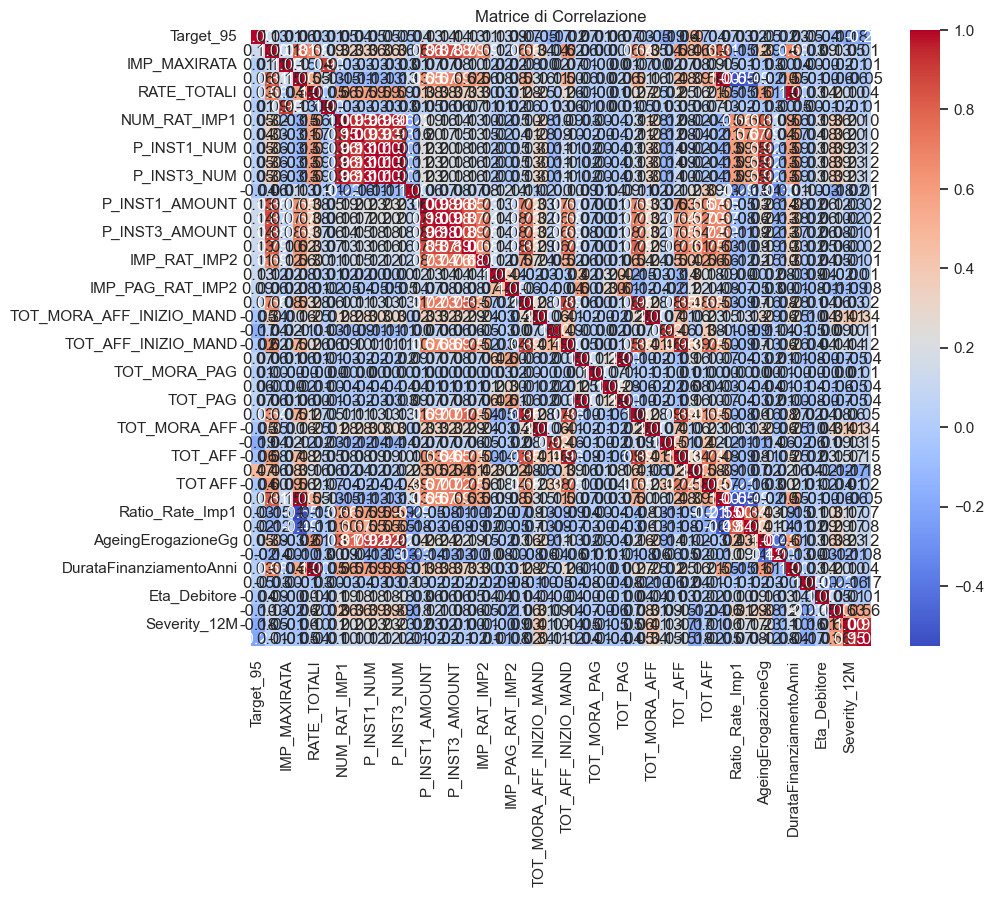

In [39]:
correlation_matrix = df_cluster.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

In [40]:
# Analisi grafica 
def func_analisi_grafica(df, numeric_var):
    ''' Definisco la funzione per distribution plot, boxplot e Q-Q plot delle variabili numeriche '''
    plt.figure(figsize=(16,8))
    
    # Distribution plot
    plt.subplot(1,3,1)
    sns.histplot(data=df, x=df[numeric_var], element="step", stat="density")
    plt.title("Distribution plot of "+numeric_var)
       
    # Box plot
    plt.subplot(1,3,2)
    sns.boxplot(x=df[numeric_var], data=df)
    plt.title("Box plot of "+numeric_var)
    
    # Box plot
    plt.subplot(1,3,3)
    df[numeric_var].fillna(0, inplace = True)
    stats.probplot(df[numeric_var], dist="norm", plot=plt)
    plt.title("Q-Q plot of "+numeric_var)
    
    plt.show()

In [41]:
#numerical_vars
numerical_vars = [f for f in df_variabili_numeriche.columns if f!='Target_95']

#categorical_vars
categorical_vars = [f for f in df_variabili_categoriche.columns if f!='Target_95']

<h5> Analisi grafica </h5>

In [42]:
# for variable in numerical_vars:
#     func_analisi_grafica(df_clienti, variable)
#     print("*"*110)

<h5> Aggiungo una colonna RATIO_ONERI_AFF_TOT_AFF (rapporto tra TOT_ONERI_AFF E TOT_AFF) </h5>

In [43]:
df_arricchito = df_cluster.copy()

In [44]:
df_arricchito['RATIO_ONERI_AFF_TOT_AFF'] = df_arricchito['TOT_ONERI_AFF'] / df_arricchito['TOT_AFF']

In [45]:
df_arricchito[df_arricchito['RATIO_ONERI_AFF_TOT_AFF'] > 1]

Empty DataFrame
Columns: [Target_Stopp, Target_95, Chiave, PRATICA, DELIN_HISTORY, MOD_PAGAM, MOD_PAG, TIPO_GARANTE, Denominazione Regione, CODICE_PHONIA, DES_PRODOTTO, DES_BENE, MACROAREA, DATA_AFFIDO, DATA_FINE_AFFIDO, DATA_FINANZIAM, DT_VAL_ULT_PAGAM, DATA_ESTINZ, DATA_AGGIORNAMENTO, P_INST1_DUE_DATE, P_INST2_DUE_DATE, P_INST3_DUE_DATE, DT_VAL_RAT_IMP1, DT_VAL_RAT_IMP2, P_INST1_VAL_DATE, P_INST3_VAL_DATE, SCAD_MAXIRATA, SCAD_RAT_IMP2, SCAD_RAT_IMP1, DATA AFFIDO, DATA FINE LAV, COD_FISC_INT, Codi_FISC_INT_2, IMP_FINANZIATO, IMP_MAXIRATA, CURRENT_BALANCE, P_INST1_AMOUNT_PAID, P_INST2_AMOUNT_PAID, P_INST3_AMOUNT_PAID, RATE_TOTALI, NUM_RATE_RIFI, NUM_RAT_IMP1, NUM_RAT_IMP2, P_INST1_NUM, P_INST2_NUM, P_INST3_NUM, NUMERO RATE, PROVINCIA, P_INST1_AMOUNT, P_INST2_AMOUNT, P_INST3_AMOUNT, IMP_RAT_IMP1, IMP_RAT_IMP2, IMP_PAG_RAT_IMP1, IMP_PAG_RAT_IMP2, TOT_RATE_AFF_INIZIO_MAND, TOT_MORA_AFF_INIZIO_MAND, TOT_ONERI_AFF_INIZIO_MAND, TOT_AFF_INIZIO_MAND, TOT_RATE_PAG, TOT_MORA_PAG, TOT_ONERI_PAG, TOT_PAG, TOT_RATE_AFF, TOT_MORA_AFF, TOT_ONERI_AFF, TOT_AFF, TOT REC, TOT AFF, Cash Balance, Flag_Riciclo_SDD, Flag_Rifinanziamento, Flag_Garante, Flag_Cointestazione, Metodo_pagamento, Ratio_Rate_Imp1, Ratio_Rate_Imp2, AgeingErogazioneGg, AgeingGestioneGg, DurataFinanziamentoAnni, DistanzaAffidoUltimoPagamento, Sesso, Eta_Debitore, Nazionalita, NOSTART12M, NOSTART6M, Flag_Galleggiamento_3M, Flag_Galleggiamento_6M, Flag_Gestione_Prec, Flag_InsolvenzaGrave_3M, Flag_InsolvenzaGrave_6M, Flag_Miglioramento_3M, Flag_Rate_piu_uno, Flag_rientrototale_6M, Flag_Scivolamento_3M, Flag_Scivolamento_6M, Numero_mesi_rec, Severity_12M, Severity_12M_pesata, Flag_InsolvenzaGrave_12M, ...]
Index: []

In [46]:
df_arricchito

Target_Stopp  Target_95                  Chiave         PRATICA  \
0                 0          0  00000192490301_08_2021  00000192490301   
1                 0          0  00000475601301_08_2021  00000475601301   
2                 0          0  00005101916200_08_2021  00005101916200   
3                 0          0  00001553388301_08_2021  00001553388301   
4                 0          0  00001780466301_08_2021  00001780466301   
...             ...        ...                     ...             ...   
122124            0          0  00003306259301_10_2023  00003306259301   
122125            0          0  00000315666301_10_2023  00000315666301   
122126            0          0  00003304946301_10_2023  00003304946301   
122127            1          0  00003387886301_10_2023  00003387886301   
122128            0          0  00000374303301_10_2023  00000374303301   

                                            DELIN_HISTORY MOD_PAGAM MOD_PAG  \
0       2322222223322222123232211111119899987665432111...         P      BP   
1          1000000000000000000000000000000000000000000000         P      BP   
2       3321111112222112212121111110111111111121111111...         M      BP   
3                                 43211111211000000000000         P      BP   
4                                     3321222221000000000         P      BP   
...                                                   ...       ...     ...   
122124                                                110         P      BP   
122125  1003210000017788888876543210000000000000000000...         P      BP   
122126                                               1000         R      BP   
122127                                                 11         P      BP   
122128  1001110101000011111111110000100000000000000000...         P      BP   

       TIPO_GARANTE  Denominazione Regione CODICE_PHONIA  \
0              None                Sicilia        AHPTEL   
1                 C                 Veneto        AHPTEL   
2                 C  Friuli-Venezia Giulia        AHPTEL   
3              None                  Lazio        AHPTEL   
4              None                Sicilia        AHPTEL   
...             ...                    ...           ...   
122124         None               Piemonte        AQPTEL   
122125         None              Lombardia        AQPTEL   
122126         None               Piemonte        AQPTEL   
122127         None               Campania        AQPTEL   
122128         None              Lombardia        AQPTEL   

                     DES_PRODOTTO                   DES_BENE    MACROAREA  \
0              PRESTITO PERSONALE                       None  Sud_e_Isole   
1        AUTOMOTIVE AZIENDE NUOVO                       None     Nord_Est   
2          CASA GRANDI INTERVENTI                 ALTRI BENI     Nord_Est   
3         CASA PICCOLI INTERVENTI                 DEPURATORE       Centro   
4                AUTOMOTIVE USATO    Tipo FJ451XH   del 2017  Sud_e_Isole   
...                           ...                        ...          ...   
122124           AUTOMOTIVE NUOVO  DACIA DUSTER JOURNEY UP G   Nord_Ovest   
122125     CASA GRANDI INTERVENTI             CONDIZIONATORI   Nord_Ovest   
122126            REPEAT BUSINESS                       None   Nord_Ovest   
122127                ARREDAMENTO                     CUCINA  Sud_e_Isole   
122128  CONSOLIDAMENTO DEL DEBITO                       None   Nord_Ovest   

       DATA_AFFIDO DATA_FINE_AFFIDO DATA_FINANZIAM DT_VAL_ULT_PAGAM  \
0       2021-08-02       2021-08-13     2017-03-17       2021-07-28   
1       2021-08-02       2021-08-13     2017-10-17       2020-03-16   
2       2021-08-02       2021-08-13     2012-12-17       2021-07-20   
3       2021-08-02       2021-08-13     2019-09-16       2021-07-29   
4       2021-08-02       2021-08-13     2020-01-17       2021-07-01   
...            ...              ...            ...              ...   
122124  2023-10-30       2

<h5> Rimuovo le colonne non necessarie </h5>

In [47]:
df_clienti_con_meno_colonne = df_arricchito.copy()

In [48]:
df_clienti_con_meno_colonne

Target_Stopp  Target_95                  Chiave         PRATICA  \
0                 0          0  00000192490301_08_2021  00000192490301   
1                 0          0  00000475601301_08_2021  00000475601301   
2                 0          0  00005101916200_08_2021  00005101916200   
3                 0          0  00001553388301_08_2021  00001553388301   
4                 0          0  00001780466301_08_2021  00001780466301   
...             ...        ...                     ...             ...   
122124            0          0  00003306259301_10_2023  00003306259301   
122125            0          0  00000315666301_10_2023  00000315666301   
122126            0          0  00003304946301_10_2023  00003304946301   
122127            1          0  00003387886301_10_2023  00003387886301   
122128            0          0  00000374303301_10_2023  00000374303301   

                                            DELIN_HISTORY MOD_PAGAM MOD_PAG  \
0       2322222223322222123232211111119899987665432111...         P      BP   
1          1000000000000000000000000000000000000000000000         P      BP   
2       3321111112222112212121111110111111111121111111...         M      BP   
3                                 43211111211000000000000         P      BP   
4                                     3321222221000000000         P      BP   
...                                                   ...       ...     ...   
122124                                                110         P      BP   
122125  1003210000017788888876543210000000000000000000...         P      BP   
122126                                               1000         R      BP   
122127                                                 11         P      BP   
122128  1001110101000011111111110000100000000000000000...         P      BP   

       TIPO_GARANTE  Denominazione Regione CODICE_PHONIA  \
0              None                Sicilia        AHPTEL   
1                 C                 Veneto        AHPTEL   
2                 C  Friuli-Venezia Giulia        AHPTEL   
3              None                  Lazio        AHPTEL   
4              None                Sicilia        AHPTEL   
...             ...                    ...           ...   
122124         None               Piemonte        AQPTEL   
122125         None              Lombardia        AQPTEL   
122126         None               Piemonte        AQPTEL   
122127         None               Campania        AQPTEL   
122128         None              Lombardia        AQPTEL   

                     DES_PRODOTTO                   DES_BENE    MACROAREA  \
0              PRESTITO PERSONALE                       None  Sud_e_Isole   
1        AUTOMOTIVE AZIENDE NUOVO                       None     Nord_Est   
2          CASA GRANDI INTERVENTI                 ALTRI BENI     Nord_Est   
3         CASA PICCOLI INTERVENTI                 DEPURATORE       Centro   
4                AUTOMOTIVE USATO    Tipo FJ451XH   del 2017  Sud_e_Isole   
...                           ...                        ...          ...   
122124           AUTOMOTIVE NUOVO  DACIA DUSTER JOURNEY UP G   Nord_Ovest   
122125     CASA GRANDI INTERVENTI             CONDIZIONATORI   Nord_Ovest   
122126            REPEAT BUSINESS                       None   Nord_Ovest   
122127                ARREDAMENTO                     CUCINA  Sud_e_Isole   
122128  CONSOLIDAMENTO DEL DEBITO                       None   Nord_Ovest   

       DATA_AFFIDO DATA_FINE_AFFIDO DATA_FINANZIAM DT_VAL_ULT_PAGAM  \
0       2021-08-02       2021-08-13     2017-03-17       2021-07-28   
1       2021-08-02       2021-08-13     2017-10-17       2020-03-16   
2       2021-08-02       2021-08-13     2012-12-17       2021-07-20   
3       2021-08-02       2021-08-13     2019-09-16       2021-07-29   
4       2021-08-02       2021-08-13     2020-01-17       2021-07-01   
...            ...              ...            ...              ...   
122124  2023-10-30       2

In [49]:
sorted(df_clienti_con_meno_colonne.columns)

['AgeingErogazioneGg',
 'AgeingGestioneGg',
 'CODICE_PHONIA',
 'COD_FISC_INT',
 'CURRENT_BALANCE',
 'Cash Balance',
 'Chiave',
 'Codi_FISC_INT_2',
 'DATA AFFIDO',
 'DATA FINE LAV',
 'DATA_AFFIDO',
 'DATA_AGGIORNAMENTO',
 'DATA_ESTINZ',
 'DATA_FINANZIAM',
 'DATA_FINE_AFFIDO',
 'DELIN_HISTORY',
 'DESCRIZIONE PRODOTTO',
 'DES_BENE',
 'DES_PRODOTTO',
 'DT_VAL_RAT_IMP1',
 'DT_VAL_RAT_IMP2',
 'DT_VAL_ULT_PAGAM',
 'Denominazione Regione',
 'DistanzaAffidoUltimoPagamento',
 'DurataFinanziamentoAnni',
 'Eta_Debitore',
 'FlagRecOver100',
 'Flag_Cointestazione',
 'Flag_Galleggiamento_3M',
 'Flag_Galleggiamento_6M',
 'Flag_Garante',
 'Flag_Gestione_Prec',
 'Flag_InsolvenzaGrave_12M',
 'Flag_InsolvenzaGrave_3M',
 'Flag_InsolvenzaGrave_6M',
 'Flag_Miglioramento_3M',
 'Flag_Rate_piu_uno',
 'Flag_Riciclo_SDD',
 'Flag_Rifinanziamento',
 'Flag_Scivolamento_3M',
 'Flag_Scivolamento_6M',
 'Flag_rientrototale_6M',
 'IMP_FINANZIATO',
 'IMP_MAXIRATA',
 'IMP_PAG_RAT_IMP1',
 'IMP_PAG_RAT_IMP2',
 'IMP_RAT_IMP1'

In [50]:
df_clienti_con_meno_colonne['Metodo_pagamento'].value_counts()

BP    98761
RI    20839
TS       73
PS        2
Name: Metodo_pagamento, dtype: int64

<h6> Clustering su Metodo_pagamento </h6>

In [51]:
# Se un valore TS o PS, pongo quel valore pari a BP
df_clienti_con_meno_colonne['Metodo_pagamento'] = df_clienti_con_meno_colonne['Metodo_pagamento'].apply(lambda x: 'BP' if x in ['TS', 'PS'] else x)

In [52]:
df_clienti_con_meno_colonne['Metodo_pagamento'].value_counts()

BP    98836
RI    20839
Name: Metodo_pagamento, dtype: int64

<h6> Definizione short_list da usare </h6>

In [53]:
sorted(df_clienti_con_meno_colonne.columns.to_list())

['AgeingErogazioneGg',
 'AgeingGestioneGg',
 'CODICE_PHONIA',
 'COD_FISC_INT',
 'CURRENT_BALANCE',
 'Cash Balance',
 'Chiave',
 'Codi_FISC_INT_2',
 'DATA AFFIDO',
 'DATA FINE LAV',
 'DATA_AFFIDO',
 'DATA_AGGIORNAMENTO',
 'DATA_ESTINZ',
 'DATA_FINANZIAM',
 'DATA_FINE_AFFIDO',
 'DELIN_HISTORY',
 'DESCRIZIONE PRODOTTO',
 'DES_BENE',
 'DES_PRODOTTO',
 'DT_VAL_RAT_IMP1',
 'DT_VAL_RAT_IMP2',
 'DT_VAL_ULT_PAGAM',
 'Denominazione Regione',
 'DistanzaAffidoUltimoPagamento',
 'DurataFinanziamentoAnni',
 'Eta_Debitore',
 'FlagRecOver100',
 'Flag_Cointestazione',
 'Flag_Galleggiamento_3M',
 'Flag_Galleggiamento_6M',
 'Flag_Garante',
 'Flag_Gestione_Prec',
 'Flag_InsolvenzaGrave_12M',
 'Flag_InsolvenzaGrave_3M',
 'Flag_InsolvenzaGrave_6M',
 'Flag_Miglioramento_3M',
 'Flag_Rate_piu_uno',
 'Flag_Riciclo_SDD',
 'Flag_Rifinanziamento',
 'Flag_Scivolamento_3M',
 'Flag_Scivolamento_6M',
 'Flag_rientrototale_6M',
 'IMP_FINANZIATO',
 'IMP_MAXIRATA',
 'IMP_PAG_RAT_IMP1',
 'IMP_PAG_RAT_IMP2',
 'IMP_RAT_IMP1'

In [54]:
colonne_da_usare = ['Target_95', 'RATIO_ONERI_AFF_TOT_AFF', 'Denominazione Regione', 'IMP_FINANZIATO', 'TOT_AFF', 'Cash Balance', 'Ratio_Rate_Imp1', 'AgeingErogazioneGg', 'AgeingGestioneGg', 'DurataFinanziamentoAnni', 'DistanzaAffidoUltimoPagamento', 'Sesso', 'Nazionalita', 'NOSTART12M', 'Flag_Galleggiamento_3M', 'Flag_Galleggiamento_6M', 'Flag_Gestione_Prec', 'Flag_Rate_piu_uno', 'Flag_rientrototale_6M', 'Numero_mesi_rec', 'Severity_12M', 'Severity_12M_pesata', 'Flag_InsolvenzaGrave_12M', 'DESCRIZIONE PRODOTTO', 'Eta_Debitore']

In [56]:
df_clienti_con_meno_colonne = df_clienti_con_meno_colonne[colonne_da_usare]

In [57]:
df_clienti_con_meno_colonne

Target_95  RATIO_ONERI_AFF_TOT_AFF  Denominazione Regione  \
0               0                     0.04                Sicilia   
1               0                     0.02                 Veneto   
2               0                     0.08  Friuli-Venezia Giulia   
3               0                     0.13                  Lazio   
4               0                     0.05                Sicilia   
...           ...                      ...                    ...   
122124          0                     0.00               Piemonte   
122125          0                     0.00              Lombardia   
122126          0                     0.00               Piemonte   
122127          0                     0.00               Campania   
122128          0                     0.03              Lombardia   

        IMP_FINANZIATO  TOT_AFF  Cash Balance  Ratio_Rate_Imp1  \
0             8,750.70   291.42      1,689.63             0.87   
1            23,615.00   524.98     13,422.33             0.41   
2            12,680.82   152.87      5,600.14             0.68   
3             4,200.00    94.85      3,190.71             0.31   
4            12,900.00   218.36     11,686.78             0.03   
...                ...      ...           ...              ...   
122124       27,679.44   378.07     27,391.05             0.03   
122125        3,150.00    23.66        468.63             0.89   
122126        5,350.00   108.66      5,249.14             0.06   
122127        1,500.00    93.81      1,435.51             0.11   
122128       27,540.00   360.51     10,363.07             0.69   

        AgeingErogazioneGg  AgeingGestioneGg  DurataFinanziamentoAnni  \
0                 1,582.00             17.00                     5.00   
1                 2,282.00           -999.00                     6.17   
2                 3,133.00             17.00                    12.00   
3                   669.00             17.00                     6.00   
4                 2,707.00           -999.00                     7.33   
...                    ...               ...                      ...   
122124               91.00             17.00                     8.00   
122125            2,313.00             17.00                     7.00   
122126              122.00             17.00                     6.00   
122127               60.00             17.00                     1.50   
122128            2,282.00             17.00                     9.00   

        DistanzaAffidoUltimoPagamento  Sesso Nazionalita NOSTART12M  \
0                                0.00   None        None         NO   
1                               17.00   None        None         NO   
2                                0.00  Donna    Italiano         NO   
3                                0.00   Uomo    Italiano         NO   
4                                1.00   None        None         SI   
...                               ...    ...         ...        ...   
122124                           1.00   Uomo    Italiano         SI   
122125                           4.00  Donna    Italiano         NO   
122126                           2.00   None        None         SI   
122127                           1.00   None        None         SI   
122128                           2.00   Uomo    Italiano         NO   

       Flag_Galleggiamento_3M Flag_Galleggiamento_6M Flag_Gestione_Prec  \
0                          NO                     NO                 NO   
1                          NO                     NO                 NO   
2                          NO                     NO                 NO   
3                          NO                     NO                 NO   
4                          NO                     NO                 NO   
...                       ...                    ...                ...   
122124                     NO                     NO                 NO   
122125                     NO                     NO    

<h6> Rimuovo le colonne che hanno più del 50% di valori missing </h6>

In [58]:
percentuale_mancanti = (df_clienti_con_meno_colonne.isna().sum() / len(df_clienti_con_meno_colonne)).sort_values(ascending=False)
colonne_da_mantenere = percentuale_mancanti[percentuale_mancanti <= 0.5].index

In [59]:
percentuale_mancanti[percentuale_mancanti>0.5]

Series([], dtype: float64)

In [60]:
def rimuovi_colonne_con_valori_mancanti(df, soglia=0.5):
    # Calcolo la percentuale di valori mancanti per ciascuna colonna
    percentuale_mancanti = (df.isna().sum() / len(df)).sort_values(ascending=False)
    
    # Seleziono le colonne con al massimo il 50% di valori mancanti
    colonne_da_mantenere = percentuale_mancanti[percentuale_mancanti <= soglia].index
    
    # Creo un nuovo DataFrame con solo le colonne da mantenere
    df_senza_colonne_mancanti = df[colonne_da_mantenere]
    
    return df_senza_colonne_mancanti

In [61]:
df_clienti_con_meno_colonne = rimuovi_colonne_con_valori_mancanti(df_clienti_con_meno_colonne)

In [62]:
df_clienti_con_meno_colonne.shape

(119675, 25)

<h6> Rimuovo le colonne con 1 solo valore unico </h6>

In [63]:
# Check colonne con valori univoci
df_unique = df_clienti_con_meno_colonne.loc[:,df_clienti_con_meno_colonne.nunique()<2]
df_unique.columns
# Queste colonne sono da eliminare dal dataset

Index([], dtype='object')

In [64]:
# Elimino le colonne che hanno 1 solo valore unico

df_clienti_con_meno_colonne = df_clienti_con_meno_colonne.drop(columns= df_unique.columns, axis=1)

In [65]:
df_clienti_con_meno_colonne.shape

(119675, 25)

In [66]:
df_clienti_con_meno_colonne

Nazionalita  Sesso  Eta_Debitore  Severity_12M_pesata  Severity_12M  \
0             None   None           NaN                 1.19          2.25   
1             None   None           NaN                 0.08          0.08   
2         Italiano  Donna         56.00                 0.97          1.67   
3         Italiano   Uomo         57.00                 1.03          1.50   
4             None   None           NaN                 1.12          1.67   
...            ...    ...           ...                  ...           ...   
122124    Italiano   Uomo         38.00                 0.64          0.67   
122125    Italiano  Donna         69.00                 0.44          0.67   
122126        None   None           NaN                 0.25          0.25   
122127        None   None           NaN                 0.96          1.00   
122128    Italiano   Uomo         56.00                 0.31          0.50   

        RATIO_ONERI_AFF_TOT_AFF  Denominazione Regione  IMP_FINANZIATO  \
0                          0.04                Sicilia        8,750.70   
1                          0.02                 Veneto       23,615.00   
2                          0.08  Friuli-Venezia Giulia       12,680.82   
3                          0.13                  Lazio        4,200.00   
4                          0.05                Sicilia       12,900.00   
...                         ...                    ...             ...   
122124                     0.00               Piemonte       27,679.44   
122125                     0.00              Lombardia        3,150.00   
122126                     0.00               Piemonte        5,350.00   
122127                     0.00               Campania        1,500.00   
122128                     0.03              Lombardia       27,540.00   

       Flag_Galleggiamento_6M   DESCRIZIONE PRODOTTO Flag_InsolvenzaGrave_12M  \
0                          NO     PRESTITO PERSONALE                       SI   
1                          NO       AUTOMOTIVE NUOVO                       NO   
2                          NO        INTERVENTI CASA                       SI   
3                          NO        INTERVENTI CASA                       SI   
4                          NO       AUTOMOTIVE USATO                       SI   
...                       ...                    ...                      ...   
122124                     NO       AUTOMOTIVE NUOVO                       NO   
122125                     NO        INTERVENTI CASA                       SI   
122126                     NO  FINANZIAMENTI AZIENDE                       NO   
122127                     NO            ARREDAMENTO                       NO   
122128                     NO   ALTRI BENI E SERVIZI                       NO   

        Numero_mesi_rec Flag_rientrototale_6M Flag_Rate_piu_uno  \
0                 12.00                    NO                SI   
1                  1.00                    SI                NO   
2                 12.00                    NO                SI   
3                 11.00                    NO                SI   
4                 10.00                    NO                SI   
...                 ...                   ...               ...   
122124             2.00                    SI                NO   
122125             1.00                    SI                SI   
122126             1.00                    SI                NO   
122127             2.00                    SI                NO   
122128             1.00                    SI                NO   

       Flag_Gestione_Prec Flag_Galleggiamento_3M  TOT_AFF NOSTART12M  \
0                      NO                     NO   291.42         NO   
1                      NO                     NO   524.98         NO   
2                      NO                     NO   152.87         NO   
3                      NO                     NO    94.85         NO   
4                      NO                  

<h5> Trattamento outliers </h5>

In [67]:
df_clienti_senza_outliers = df_clienti_con_meno_colonne.copy()

In [68]:
df_clienti_senza_outliers

Nazionalita  Sesso  Eta_Debitore  Severity_12M_pesata  Severity_12M  \
0             None   None           NaN                 1.19          2.25   
1             None   None           NaN                 0.08          0.08   
2         Italiano  Donna         56.00                 0.97          1.67   
3         Italiano   Uomo         57.00                 1.03          1.50   
4             None   None           NaN                 1.12          1.67   
...            ...    ...           ...                  ...           ...   
122124    Italiano   Uomo         38.00                 0.64          0.67   
122125    Italiano  Donna         69.00                 0.44          0.67   
122126        None   None           NaN                 0.25          0.25   
122127        None   None           NaN                 0.96          1.00   
122128    Italiano   Uomo         56.00                 0.31          0.50   

        RATIO_ONERI_AFF_TOT_AFF  Denominazione Regione  IMP_FINANZIATO  \
0                          0.04                Sicilia        8,750.70   
1                          0.02                 Veneto       23,615.00   
2                          0.08  Friuli-Venezia Giulia       12,680.82   
3                          0.13                  Lazio        4,200.00   
4                          0.05                Sicilia       12,900.00   
...                         ...                    ...             ...   
122124                     0.00               Piemonte       27,679.44   
122125                     0.00              Lombardia        3,150.00   
122126                     0.00               Piemonte        5,350.00   
122127                     0.00               Campania        1,500.00   
122128                     0.03              Lombardia       27,540.00   

       Flag_Galleggiamento_6M   DESCRIZIONE PRODOTTO Flag_InsolvenzaGrave_12M  \
0                          NO     PRESTITO PERSONALE                       SI   
1                          NO       AUTOMOTIVE NUOVO                       NO   
2                          NO        INTERVENTI CASA                       SI   
3                          NO        INTERVENTI CASA                       SI   
4                          NO       AUTOMOTIVE USATO                       SI   
...                       ...                    ...                      ...   
122124                     NO       AUTOMOTIVE NUOVO                       NO   
122125                     NO        INTERVENTI CASA                       SI   
122126                     NO  FINANZIAMENTI AZIENDE                       NO   
122127                     NO            ARREDAMENTO                       NO   
122128                     NO   ALTRI BENI E SERVIZI                       NO   

        Numero_mesi_rec Flag_rientrototale_6M Flag_Rate_piu_uno  \
0                 12.00                    NO                SI   
1                  1.00                    SI                NO   
2                 12.00                    NO                SI   
3                 11.00                    NO                SI   
4                 10.00                    NO                SI   
...                 ...                   ...               ...   
122124             2.00                    SI                NO   
122125             1.00                    SI                SI   
122126             1.00                    SI                NO   
122127             2.00                    SI                NO   
122128             1.00                    SI                NO   

       Flag_Gestione_Prec Flag_Galleggiamento_3M  TOT_AFF NOSTART12M  \
0                      NO                     NO   291.42         NO   
1                      NO                     NO   524.98         NO   
2                      NO                     NO   152.87         NO   
3                      NO                     NO    94.85         NO   
4                      NO                  

In [69]:
# mi assicuro che la colonna "Target_95" sia numerica perchè altrimenti il codice dopo mi dà errore
df_clienti_senza_outliers['Target_95'] = pd.to_numeric(df_clienti_senza_outliers['Target_95'], errors = 'coerce') # Quando viene utilizzato il valore 'coerce', la funzione tenterà di convertire i dati in numeri, ma se la conversione non è possibile imposterà il valore sulla rappresentazione numerica NaN (Not-a-Number). Questo significa che se ci sono dati non numerici, la funzione li "ignorerà" assegnando loro NaN anziché generare un errore; l'altro valore possibile per "errors" è "raise", che dà errore nel caso non riesca a convertire qualcosa

In [70]:
# Spostiamo il Target_95 sulla prima colonna
move_column_inplace(df_clienti_senza_outliers,'Target_95', 0)

In [71]:
df_eccezioni = pd.read_excel('Eccezioni outliers.xlsx')

# Cerco la riga che contiene "eccezioni" nella prima cella
riga_eccezioni = None
for index, row in df_eccezioni.iterrows():
    if row.iloc[0] == 'eccezioni':
        riga_eccezioni = row
        break

# Creo una lista vuota per memorizzare i nomi delle colonne con "exception"
colonne_eccezione = []

# Itero sulle colonne del DataFrame
for colonna in df_eccezioni.columns:
    # Verifica se il valore nella cella corrispondente alla riga "eccezioni" è "exception"
    if riga_eccezioni[colonna] == 'exception':
        colonne_eccezione.append(colonna)

print("Colonne con 'exception':", colonne_eccezione)

Colonne con 'exception': ['IMP_MAXIRATA', 'P_INST1_AMOUNT_PAID', 'P_INST2_AMOUNT_PAID', 'P_INST3_AMOUNT_PAID', 'RATE_TOTALI', 'NUM_RATE_RIFI', 'NUM_RAT_IMP1', 'NUM_RAT_IMP2', 'P_INST1_NUM', 'P_INST2_NUM', 'P_INST3_NUM', 'P_INST1_AMOUNT', 'P_INST2_AMOUNT', 'P_INST3_AMOUNT', 'IMP_RAT_IMP1', 'IMP_RAT_IMP2', 'IMP_PAG_RAT_IMP1', 'IMP_PAG_RAT_IMP2', 'TOT_MORA_AFF', 'TOT REC', 'Ratio_Rate_Imp1', 'Ratio_Rate_Imp2', 'Ageing_Erogazione_mesi', 'DistanzaAffidoUltimoPagamento', 'Eta_Debitore', 'DurataFinanziamento', 'Numero_mesi_rec', 'Severity_12M', 'Severity_12M_pesata']


In [72]:
def rimuovi_outliers_oltre_x_deviazioni_standard_dalla_media(df, x, eccezioni=[]):
    # Copia il DataFrame originale
    df_copia = df.copy()

    # Escludo le colonne presenti in eccezioni
    colonne_da_escludere = [col for col in df_copia.columns if col in eccezioni]
    df_copia = df_copia.drop(columns=colonne_da_escludere)

    # Seleziono solo le colonne numeriche (escludendo 'Target_95' e le colonne in eccezioni)
    colonne_numeriche = df_copia.select_dtypes(include=[np.number])

    # Calcolo lo z-score per ciascuna colonna nel DataFrame
    z_scores = zscore(colonne_numeriche)
    print('z_scores:')
    print(z_scores)
    
    outlier_indices = (np.abs(z_scores) > x).any(axis=1)
    print('outlier_indices:')
    print(outlier_indices)

    df_senza_outliers = df[~outlier_indices] # ho scoperto che la tilde "~" serve a negare la maschera booleana in questione, quindi in df_senza_outliers finiscono tutte le righe che NON fanno parte di outlier_indices
    return df_senza_outliers

In [73]:
colonne_eccezione.append('AgeingGestioneGg')

In [74]:
# rimuovo gli outliers (solo per le colonne numeriche ovviamente)
df_clienti_senza_outliers = rimuovi_outliers_oltre_x_deviazioni_standard_dalla_media(df_clienti_senza_outliers, 3, colonne_eccezione)

z_scores:
        Target_95  RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  TOT_AFF  \
0           -0.80                      NaN           -0.31     0.22   
1           -0.80                      NaN            1.40     1.35   
2           -0.80                      NaN            0.14    -0.45   
3           -0.80                      NaN           -0.83    -0.74   
4           -0.80                      NaN            0.17    -0.14   
...           ...                      ...             ...      ...   
122124      -0.80                      NaN            1.87     0.64   
122125      -0.80                      NaN           -0.96    -1.08   
122126      -0.80                      NaN           -0.70    -0.67   
122127      -0.80                      NaN           -1.15    -0.74   
122128      -0.80                      NaN            1.85     0.55   

        DurataFinanziamentoAnni  AgeingErogazioneGg  Cash Balance  
0                         -0.22                0.50         -0.70  
1

In [75]:
df_clienti_senza_outliers.shape

(113621, 25)

In [76]:
df_clienti_senza_outliers

Target_95 Nazionalita  Sesso  Eta_Debitore  Severity_12M_pesata  \
0               0        None   None           NaN                 1.19   
1               0        None   None           NaN                 0.08   
2               0    Italiano  Donna         56.00                 0.97   
3               0    Italiano   Uomo         57.00                 1.03   
4               0        None   None           NaN                 1.12   
...           ...         ...    ...           ...                  ...   
122123          1    Italiano   Uomo         65.00                 0.37   
122125          0    Italiano  Donna         69.00                 0.44   
122126          0        None   None           NaN                 0.25   
122127          0        None   None           NaN                 0.96   
122128          0    Italiano   Uomo         56.00                 0.31   

        Severity_12M  RATIO_ONERI_AFF_TOT_AFF  Denominazione Regione  \
0               2.25                     0.04                Sicilia   
1               0.08                     0.02                 Veneto   
2               1.67                     0.08  Friuli-Venezia Giulia   
3               1.50                     0.13                  Lazio   
4               1.67                     0.05                Sicilia   
...              ...                      ...                    ...   
122123          0.83                     0.00                Abruzzo   
122125          0.67                     0.00              Lombardia   
122126          0.25                     0.00               Piemonte   
122127          1.00                     0.00               Campania   
122128          0.50                     0.03              Lombardia   

        IMP_FINANZIATO Flag_Galleggiamento_6M   DESCRIZIONE PRODOTTO  \
0             8,750.70                     NO     PRESTITO PERSONALE   
1            23,615.00                     NO       AUTOMOTIVE NUOVO   
2            12,680.82                     NO        INTERVENTI CASA   
3             4,200.00                     NO        INTERVENTI CASA   
4            12,900.00                     NO       AUTOMOTIVE USATO   
...                ...                    ...                    ...   
122123        2,050.00                     NO            ARREDAMENTO   
122125        3,150.00                     NO        INTERVENTI CASA   
122126        5,350.00                     NO  FINANZIAMENTI AZIENDE   
122127        1,500.00                     NO            ARREDAMENTO   
122128       27,540.00                     NO   ALTRI BENI E SERVIZI   

       Flag_InsolvenzaGrave_12M  Numero_mesi_rec Flag_rientrototale_6M  \
0                            SI            12.00                    NO   
1                            NO             1.00                    SI   
2                            SI            12.00                    NO   
3                            SI            11.00                    NO   
4                            SI            10.00                    NO   
...                         ...              ...                   ...   
122123                       NO             2.00                    SI   
122125                       SI             1.00                    SI   
122126                       NO             1.00                    SI   
122127                       NO             2.00                    SI   
122128                       NO             1.00                    SI   

       Flag_Rate_piu_uno Flag_Gestione_Prec Flag_Galleggiamento_3M  TOT_AFF  \
0                     SI                 NO                     NO   291.42   
1                     NO                 NO                     NO   524.98   
2                     SI                 NO                     NO   152.87   
3                     SI                 NO                     NO    94.85   
4                     SI                 NO                     NO   218.36   
...           

In [77]:
df_clienti_senza_outliers['AgeingGestioneGg']

0          17.00
1        -999.00
2          17.00
3          17.00
4        -999.00
           ...  
122123     17.00
122125     17.00
122126     17.00
122127     17.00
122128     17.00
Name: AgeingGestioneGg, Length: 113621, dtype: float64

In [78]:
describex(df_clienti_senza_outliers)

C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\736779343.py:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = data.skew()
C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\736779343.py:5: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = data.kurtosis()
C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\736779343.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' 

Target_95 Eta_Debitore Severity_12M_pesata Severity_12M  \
count               113,621.00    86,576.00          112,958.00   112,958.00   
mean                      0.39        50.19                0.58         0.98   
std                       0.49        14.02                0.36         0.68   
min                       0.00        19.00                0.00         0.00   
1%                        0.00        23.00                0.00         0.00   
25%                       0.00        40.00                0.39         0.55   
50%                       0.00        50.00                0.54         1.00   
75%                       1.00        60.00                0.71         1.17   
90%                       1.00        70.00                1.00         1.67   
95%                       1.00        74.00                1.17         2.00   
99%                       1.00        81.00                1.78         3.42   
max                       1.00        93.00                4.88         9.00   
kurtosis                 -1.79        -0.58               13.77        15.14   
skewness                  0.46         0.16                2.24         2.45   
mediane                   0.00        50.00                0.54         1.00   
valori missing               0        27045                 663          663   
percentuale missing       0.0%        23.8%               0.58%        0.58%   
valori_unici                 2           74                2149          205   

                    RATIO_ONERI_AFF_TOT_AFF IMP_FINANZIATO Numero_mesi_rec  \
count                            113,510.00     113,621.00      113,621.00   
mean                                   0.10      10,563.96            7.35   
std                                    0.16       7,513.65            4.64   
min                                    0.00         198.00            0.00   
1%                                     0.00         600.00            0.00   
25%                                    0.00       4,116.00            2.00   
50%                                    0.04       9,620.00            8.00   
75%                                    0.09      15,592.50           12.00   
90%                                    0.29      21,440.92           12.00   
95%                                    0.50      24,790.40           12.00   
99%                                    0.79      31,589.20           12.00   
max                                    1.00      37,506.24           12.00   
kurtosis                               8.26          -0.07           -1.66   
skewness                               2.82           0.73           -0.25   
mediane                                0.04       9,620.00            8.00   
valori missing                          111              0               0   
percentuale missing                    0.1%           0.0%            0.0%   
valori_unici                          51966          15615              13   

                       TOT_AFF DistanzaAffidoUltimoPagamento  \
count               113,621.00                    113,621.00   
mean                    228.12                          1.25   
std                     151.03                          1.70   
min                       0.00                          0.00   
1%                        2.45                          0.00   
25%                     116.38                          1.00   
50%                     206.32                          1.00   
75%                     309.49                          1.00   
90%                     419.69                          2.00   
95%                     514.67                          2.00   
99%                     722.54                          7.00   
max                     864.49                         71.00   
kurtosis                  1.42                        238.87   
skewness                  1.04                         12.24   
mediane                 206.32                          1

<h5> Mi salvo in un file le righe contenenti gli outliers che ho rimosso </h5>

In [79]:
removed_rows = df_clienti_con_meno_colonne[~df_clienti_con_meno_colonne.index.isin(df_clienti_senza_outliers.index)]

# removed_rows.to_excel('df_con_righe_rimosse_standard+.xlsx', index=False)

In [80]:
removed_rows

Nazionalita Sesso  Eta_Debitore  Severity_12M_pesata  Severity_12M  \
9         Italiano  Uomo         68.00                 1.34          1.75   
114           None  None           NaN                 0.35          0.42   
115           None  None           NaN                 0.58          1.25   
157           None  None           NaN                 0.16          0.17   
185       Italiano  Uomo         51.00                 0.52          0.75   
...            ...   ...           ...                  ...           ...   
122079        None  None           NaN                 0.54          1.00   
122080    Italiano  Uomo         69.00                 0.28          0.50   
122092    Italiano  Uomo         63.00                 0.33          0.42   
122102        None  None           NaN                 0.08          0.08   
122124    Italiano  Uomo         38.00                 0.64          0.67   

        RATIO_ONERI_AFF_TOT_AFF Denominazione Regione  IMP_FINANZIATO  \
9                          0.04        Emilia-Romagna       23,684.00   
114                        0.02                 Lazio       50,000.00   
115                        0.02             Lombardia       31,300.00   
157                        0.03              Piemonte       32,724.00   
185                        0.02        Emilia-Romagna       50,300.00   
...                         ...                   ...             ...   
122079                     0.01               Toscana       55,600.56   
122080                     0.09                Marche       11,350.00   
122092                     0.05              Campania       19,119.00   
122102                     0.00              Piemonte       29,150.00   
122124                     0.00              Piemonte       27,679.44   

       Flag_Galleggiamento_6M   DESCRIZIONE PRODOTTO Flag_InsolvenzaGrave_12M  \
9                          NO  FINANZIAMENTI AZIENDE                       SI   
114                        NO     PRESTITO PERSONALE                       NO   
115                        NO       AUTOMOTIVE NUOVO                       SI   
157                        NO   ALTRI BENI E SERVIZI                       NO   
185                        NO       AUTOMOTIVE USATO                       SI   
...                       ...                    ...                      ...   
122079                     SI  FINANZIAMENTI AZIENDE                       NO   
122080                     NO        INTERVENTI CASA                       NO   
122092                     NO        INTERVENTI CASA                       NO   
122102                     NO       AUTOMOTIVE NUOVO                       NO   
122124                     NO       AUTOMOTIVE NUOVO                       NO   

        Numero_mesi_rec Flag_rientrototale_6M Flag_Rate_piu_uno  \
9                  8.00                    NO                SI   
114                5.00                    SI                NO   
115                1.00                    SI                SI   
157                2.00                    SI                NO   
185                1.00                    SI                SI   
...                 ...                   ...               ...   
122079            12.00                    NO                NO   
122080             3.00                    SI                NO   
122092             3.00                    SI                NO   
122102             1.00                    SI                NO   
122124             2.00                    SI                NO   

       Flag_Gestione_Prec Flag_Galleggiamento_3M  TOT_AFF NOSTART12M  \
9                      NO                     NO   325.90         SI   
114                    NO                     SI   717.48         NO   
115                    SI                     NO   498.13         SI   
157                    NO                     NO   427.80         NO   
185                    SI                     NO   723.41         N

<h5> Rimuovo di nuovo le colonne con 1 solo valore unico perchè dopo la rimozione degli outliers alcune potrebbero avere di nuovo 1 solo valore unico </h5>

In [81]:
# Check colonne con valori univoci
df_unique = df_clienti_senza_outliers.loc[:,df_clienti_senza_outliers.nunique()<2]
df_unique.columns
# Queste colonne sono da eliminare dal dataset

Index([], dtype='object')

In [82]:
# Elimino le colonne che hanno 1 solo valore unico

df_clienti_con_meno_colonne_2 = df_clienti_senza_outliers.drop(columns= df_unique.columns, axis=1)

In [83]:
df_clienti_con_meno_colonne_2.shape

(113621, 25)

In [84]:
df_clienti_con_meno_colonne_2

Target_95 Nazionalita  Sesso  Eta_Debitore  Severity_12M_pesata  \
0               0        None   None           NaN                 1.19   
1               0        None   None           NaN                 0.08   
2               0    Italiano  Donna         56.00                 0.97   
3               0    Italiano   Uomo         57.00                 1.03   
4               0        None   None           NaN                 1.12   
...           ...         ...    ...           ...                  ...   
122123          1    Italiano   Uomo         65.00                 0.37   
122125          0    Italiano  Donna         69.00                 0.44   
122126          0        None   None           NaN                 0.25   
122127          0        None   None           NaN                 0.96   
122128          0    Italiano   Uomo         56.00                 0.31   

        Severity_12M  RATIO_ONERI_AFF_TOT_AFF  Denominazione Regione  \
0               2.25                     0.04                Sicilia   
1               0.08                     0.02                 Veneto   
2               1.67                     0.08  Friuli-Venezia Giulia   
3               1.50                     0.13                  Lazio   
4               1.67                     0.05                Sicilia   
...              ...                      ...                    ...   
122123          0.83                     0.00                Abruzzo   
122125          0.67                     0.00              Lombardia   
122126          0.25                     0.00               Piemonte   
122127          1.00                     0.00               Campania   
122128          0.50                     0.03              Lombardia   

        IMP_FINANZIATO Flag_Galleggiamento_6M   DESCRIZIONE PRODOTTO  \
0             8,750.70                     NO     PRESTITO PERSONALE   
1            23,615.00                     NO       AUTOMOTIVE NUOVO   
2            12,680.82                     NO        INTERVENTI CASA   
3             4,200.00                     NO        INTERVENTI CASA   
4            12,900.00                     NO       AUTOMOTIVE USATO   
...                ...                    ...                    ...   
122123        2,050.00                     NO            ARREDAMENTO   
122125        3,150.00                     NO        INTERVENTI CASA   
122126        5,350.00                     NO  FINANZIAMENTI AZIENDE   
122127        1,500.00                     NO            ARREDAMENTO   
122128       27,540.00                     NO   ALTRI BENI E SERVIZI   

       Flag_InsolvenzaGrave_12M  Numero_mesi_rec Flag_rientrototale_6M  \
0                            SI            12.00                    NO   
1                            NO             1.00                    SI   
2                            SI            12.00                    NO   
3                            SI            11.00                    NO   
4                            SI            10.00                    NO   
...                         ...              ...                   ...   
122123                       NO             2.00                    SI   
122125                       SI             1.00                    SI   
122126                       NO             1.00                    SI   
122127                       NO             2.00                    SI   
122128                       NO             1.00                    SI   

       Flag_Rate_piu_uno Flag_Gestione_Prec Flag_Galleggiamento_3M  TOT_AFF  \
0                     SI                 NO                     NO   291.42   
1                     NO                 NO                     NO   524.98   
2                     SI                 NO                     NO   152.87   
3                     SI                 NO                     NO    94.85   
4                     SI                 NO                     NO   218.36   
...           

<h5> Riempio eventuali colonne con valori missing </h5>

In [85]:
df_clienti_con_meno_colonne_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113621 entries, 0 to 122128
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Target_95                      113621 non-null  int32  
 1   Nazionalita                    86576 non-null   object 
 2   Sesso                          86576 non-null   object 
 3   Eta_Debitore                   86576 non-null   float64
 4   Severity_12M_pesata            112958 non-null  float64
 5   Severity_12M                   112958 non-null  float64
 6   RATIO_ONERI_AFF_TOT_AFF        113510 non-null  float64
 7   Denominazione Regione          113614 non-null  object 
 8   IMP_FINANZIATO                 113621 non-null  float64
 9   Flag_Galleggiamento_6M         113621 non-null  object 
 10  DESCRIZIONE PRODOTTO           113621 non-null  object 
 11  Flag_InsolvenzaGrave_12M       113621 non-null  object 
 12  Numero_mesi_rec               

In [86]:
# conto quanti nan ci sono in ogni colonna
df_clienti_con_meno_colonne_2.isna().sum()

Target_95                            0
Nazionalita                      27045
Sesso                            27045
Eta_Debitore                     27045
Severity_12M_pesata                663
Severity_12M                       663
RATIO_ONERI_AFF_TOT_AFF            111
Denominazione Regione                7
IMP_FINANZIATO                       0
Flag_Galleggiamento_6M               0
DESCRIZIONE PRODOTTO                 0
Flag_InsolvenzaGrave_12M             0
Numero_mesi_rec                      0
Flag_rientrototale_6M                0
Flag_Rate_piu_uno                    0
Flag_Gestione_Prec                   0
Flag_Galleggiamento_3M               0
TOT_AFF                              0
NOSTART12M                           0
DistanzaAffidoUltimoPagamento        0
DurataFinanziamentoAnni              0
AgeingGestioneGg                     0
AgeingErogazioneGg                   0
Ratio_Rate_Imp1                      0
Cash Balance                         0
dtype: int64

In [87]:
# conto quanti nan ci sono in totale
df_clienti_con_meno_colonne_2.isna().sum().sum()

82579

In [88]:
def riempi_nan_con_media_e_missing(df):
    # Creo una copia del DataFrame originale perchè altrimenti mi modifica anche il dataframe originale mi pare
    df_copia = df.copy()
    
    for colonna in df_copia.columns:
        tipo_colonna = pd.api.types.infer_dtype(df_copia[colonna])
        # print(f'Tipo colonna {colonna}: {tipo_colonna}')
        if tipo_colonna in ['integer', 'floating']:
            # Per le colonne numeriche (e non bool o complex), calcolo la mediana e riempio i NaN con la mediana
            mediana_colonna = df_copia[colonna].median()
            df_copia[colonna] = df_copia[colonna].fillna(mediana_colonna)
        else:
            # Per le colonne non numeriche (inclusi però bool e complex, che qui non ci sono), riempio i NaN con "Missing"
            df_copia[colonna] = df_copia[colonna].fillna("Non Valutabile")
    return df_copia

In [89]:
df_senza_valori_nan = riempi_nan_con_media_e_missing(df_clienti_con_meno_colonne_2)

In [90]:
df_senza_valori_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113621 entries, 0 to 122128
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Target_95                      113621 non-null  int32  
 1   Nazionalita                    113621 non-null  object 
 2   Sesso                          113621 non-null  object 
 3   Eta_Debitore                   113621 non-null  float64
 4   Severity_12M_pesata            113621 non-null  float64
 5   Severity_12M                   113621 non-null  float64
 6   RATIO_ONERI_AFF_TOT_AFF        113621 non-null  float64
 7   Denominazione Regione          113621 non-null  object 
 8   IMP_FINANZIATO                 113621 non-null  float64
 9   Flag_Galleggiamento_6M         113621 non-null  object 
 10  DESCRIZIONE PRODOTTO           113621 non-null  object 
 11  Flag_InsolvenzaGrave_12M       113621 non-null  object 
 12  Numero_mesi_rec               

In [91]:
df_senza_valori_nan.isna().sum().sum()

0

In [92]:
describex(df_senza_valori_nan)

C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\736779343.py:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = data.skew()
C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\736779343.py:5: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = data.kurtosis()
C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_15476\736779343.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' 

Target_95 Eta_Debitore Severity_12M_pesata Severity_12M  \
count               113,621.00   113,621.00          113,621.00   113,621.00   
mean                      0.39        50.14                0.58         0.98   
std                       0.49        12.24                0.36         0.68   
min                       0.00        19.00                0.00         0.00   
1%                        0.00        24.00                0.00         0.00   
25%                       0.00        43.00                0.39         0.56   
50%                       0.00        50.00                0.54         1.00   
75%                       1.00        56.00                0.71         1.17   
90%                       1.00        67.00                0.99         1.67   
95%                       1.00        73.00                1.17         2.00   
99%                       1.00        79.00                1.78         3.42   
max                       1.00        93.00                4.88         9.00   
kurtosis                 -1.79         0.18               13.87        15.24   
skewness                  0.46         0.19                2.25         2.46   
mediane                   0.00        50.00                0.54         1.00   
valori missing               0            0                   0            0   
percentuale missing       0.0%         0.0%                0.0%         0.0%   
valori_unici                 2           74                2149          205   

                    RATIO_ONERI_AFF_TOT_AFF IMP_FINANZIATO Numero_mesi_rec  \
count                            113,621.00     113,621.00      113,621.00   
mean                                   0.10      10,563.96            7.35   
std                                    0.16       7,513.65            4.64   
min                                    0.00         198.00            0.00   
1%                                     0.00         600.00            0.00   
25%                                    0.00       4,116.00            2.00   
50%                                    0.04       9,620.00            8.00   
75%                                    0.09      15,592.50           12.00   
90%                                    0.29      21,440.92           12.00   
95%                                    0.50      24,790.40           12.00   
99%                                    0.79      31,589.20           12.00   
max                                    1.00      37,506.24           12.00   
kurtosis                               8.27          -0.07           -1.66   
skewness                               2.82           0.73           -0.25   
mediane                                0.04       9,620.00            8.00   
valori missing                            0              0               0   
percentuale missing                    0.0%           0.0%            0.0%   
valori_unici                          51966          15615              13   

                       TOT_AFF DistanzaAffidoUltimoPagamento  \
count               113,621.00                    113,621.00   
mean                    228.12                          1.25   
std                     151.03                          1.70   
min                       0.00                          0.00   
1%                        2.45                          0.00   
25%                     116.38                          1.00   
50%                     206.32                          1.00   
75%                     309.49                          1.00   
90%                     419.69                          2.00   
95%                     514.67                          2.00   
99%                     722.54                          7.00   
max                     864.49                         71.00   
kurtosis                  1.42                        238.87   
skewness                  1.04                         12.24   
mediane                 206.32                          1

In [93]:
df_senza_valori_nan

Target_95     Nazionalita           Sesso  Eta_Debitore  \
0               0  Non Valutabile  Non Valutabile         50.00   
1               0  Non Valutabile  Non Valutabile         50.00   
2               0        Italiano           Donna         56.00   
3               0        Italiano            Uomo         57.00   
4               0  Non Valutabile  Non Valutabile         50.00   
...           ...             ...             ...           ...   
122123          1        Italiano            Uomo         65.00   
122125          0        Italiano           Donna         69.00   
122126          0  Non Valutabile  Non Valutabile         50.00   
122127          0  Non Valutabile  Non Valutabile         50.00   
122128          0        Italiano            Uomo         56.00   

        Severity_12M_pesata  Severity_12M  RATIO_ONERI_AFF_TOT_AFF  \
0                      1.19          2.25                     0.04   
1                      0.08          0.08                     0.02   
2                      0.97          1.67                     0.08   
3                      1.03          1.50                     0.13   
4                      1.12          1.67                     0.05   
...                     ...           ...                      ...   
122123                 0.37          0.83                     0.00   
122125                 0.44          0.67                     0.00   
122126                 0.25          0.25                     0.00   
122127                 0.96          1.00                     0.00   
122128                 0.31          0.50                     0.03   

        Denominazione Regione  IMP_FINANZIATO Flag_Galleggiamento_6M  \
0                     Sicilia        8,750.70                     NO   
1                      Veneto       23,615.00                     NO   
2       Friuli-Venezia Giulia       12,680.82                     NO   
3                       Lazio        4,200.00                     NO   
4                     Sicilia       12,900.00                     NO   
...                       ...             ...                    ...   
122123                Abruzzo        2,050.00                     NO   
122125              Lombardia        3,150.00                     NO   
122126               Piemonte        5,350.00                     NO   
122127               Campania        1,500.00                     NO   
122128              Lombardia       27,540.00                     NO   

         DESCRIZIONE PRODOTTO Flag_InsolvenzaGrave_12M  Numero_mesi_rec  \
0          PRESTITO PERSONALE                       SI            12.00   
1            AUTOMOTIVE NUOVO                       NO             1.00   
2             INTERVENTI CASA                       SI            12.00   
3             INTERVENTI CASA                       SI            11.00   
4            AUTOMOTIVE USATO                       SI            10.00   
...                       ...                      ...              ...   
122123            ARREDAMENTO                       NO             2.00   
122125        INTERVENTI CASA                       SI             1.00   
122126  FINANZIAMENTI AZIENDE                       NO             1.00   
122127            ARREDAMENTO                       NO             2.00   
122128   ALTRI BENI E SERVIZI                       NO             1.00   

       Flag_rientrototale_6M Flag_Rate_piu_uno Flag_Gestione_Prec  \
0                         NO                SI                 NO   
1                         SI                NO                 NO   
2                         NO                SI                 NO   
3                         NO                SI                 NO   
4                         NO                SI                 NO   
...                      ...               ...                ...   
122123                    SI                SI                 SI   
122125                    SI                

In [94]:
df_senza_valori_nan['Nazionalita'].value_counts()

Italiano          72585
Non Valutabile    27045
Estero            13991
Name: Nazionalita, dtype: int64

### Random forest (features in colonne_da_usare usando df_senza_valori_nan)

In [95]:
# guardo quali sono i valori unici di ogni variabile categorica del dataset per controllare che non ce ne siano troppi per la RAM
categorical_columns = df_senza_valori_nan.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    unique_values = df_senza_valori_nan[col].unique()
    print(f"Valori unici in {col}: {unique_values}")

Valori unici in Nazionalita: ['Non Valutabile' 'Italiano' 'Estero']
Valori unici in Sesso: ['Non Valutabile' 'Donna' 'Uomo']
Valori unici in Denominazione Regione: ['Sicilia' 'Veneto' 'Friuli-Venezia Giulia' 'Lazio' 'Puglia' 'Lombardia'
 'Molise' 'Emilia-Romagna' 'Liguria' 'Toscana' 'Basilicata' 'Piemonte'
 'Calabria' 'Abruzzo' 'Umbria' 'Campania' 'Sardegna' 'Marche'
 'Non Valutabile' "Valle d'Aosta/Vallée d'Aoste"
 'Trentino-Alto Adige/Südtirol']
Valori unici in Flag_Galleggiamento_6M: ['NO' 'SI']
Valori unici in DESCRIZIONE PRODOTTO: ['PRESTITO PERSONALE' 'AUTOMOTIVE NUOVO' 'INTERVENTI CASA'
 'AUTOMOTIVE USATO' 'SPESE MEDICHE' 'FINANZIAMENTI AZIENDE'
 'PRESTITI CON TRATTENUTA' 'TEMPO LIBERO' 'ALTRI BENI E SERVIZI'
 'MOTO E CICLOMOTORI' 'ARREDAMENTO' 'ELETTRONICA & ELETTRODOME']
Valori unici in Flag_InsolvenzaGrave_12M: ['SI' 'NO']
Valori unici in Flag_rientrototale_6M: ['NO' 'SI']
Valori unici in Flag_Rate_piu_uno: ['SI' 'NO']
Valori unici in Flag_Gestione_Prec: ['NO' 'SI']
Valori un

<h6> Converto i dati categorici in numerici con la codifica one-hot </h6>

In [96]:
df_senza_valori_nan['DESCRIZIONE PRODOTTO'].value_counts()

PRESTITO PERSONALE           16838
AUTOMOTIVE USATO             16232
FINANZIAMENTI AZIENDE        14326
SPESE MEDICHE                13715
AUTOMOTIVE NUOVO             13521
INTERVENTI CASA               9866
ALTRI BENI E SERVIZI          8302
ARREDAMENTO                   7928
PRESTITI CON TRATTENUTA       5645
TEMPO LIBERO                  4879
MOTO E CICLOMOTORI            1580
ELETTRONICA & ELETTRODOME      789
Name: DESCRIZIONE PRODOTTO, dtype: int64

In [97]:
# Gli alberi decisionali e le random forest possono lavorare con i dati categorici in generale, ma non è gestita da sklearn questa cosa, quindi devo farlo io
dummies = pd.get_dummies(df_senza_valori_nan, drop_first=True)

In [98]:
dummies

Target_95  Eta_Debitore  Severity_12M_pesata  Severity_12M  \
0               0         50.00                 1.19          2.25   
1               0         50.00                 0.08          0.08   
2               0         56.00                 0.97          1.67   
3               0         57.00                 1.03          1.50   
4               0         50.00                 1.12          1.67   
...           ...           ...                  ...           ...   
122123          1         65.00                 0.37          0.83   
122125          0         69.00                 0.44          0.67   
122126          0         50.00                 0.25          0.25   
122127          0         50.00                 0.96          1.00   
122128          0         56.00                 0.31          0.50   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
0                          0.04        8,750.70            12.00   291.42   
1                          0.02       23,615.00             1.00   524.98   
2                          0.08       12,680.82            12.00   152.87   
3                          0.13        4,200.00            11.00    94.85   
4                          0.05       12,900.00            10.00   218.36   
...                         ...             ...              ...      ...   
122123                     0.00        2,050.00             2.00    69.40   
122125                     0.00        3,150.00             1.00    23.66   
122126                     0.00        5,350.00             1.00   108.66   
122127                     0.00        1,500.00             2.00    93.81   
122128                     0.03       27,540.00             1.00   360.51   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
0                                0.00                     5.00   
1                               17.00                     6.17   
2                                0.00                    12.00   
3                                0.00                     6.00   
4                                1.00                     7.33   
...                               ...                      ...   
122123                           2.00                     3.00   
122125                           4.00                     7.00   
122126                           2.00                     6.00   
122127                           1.00                     1.50   
122128                           2.00                     9.00   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
0                  17.00            1,582.00             0.87      1,689.63   
1                -999.00            2,282.00             0.41     13,422.33   
2                  17.00            3,133.00             0.68      5,600.14   
3                  17.00              669.00             0.31      3,190.71   
4                -999.00            2,707.00             0.03     11,686.78   
...                  ...                 ...              ...           ...   
122123             17.00              974.00             0.83        458.29   
122125             17.00            2,313.00             0.89        468.63   
122126             17.00              122.00             0.06      5,249.14   
122127             17.00               60.00             0.11      1,435.51   
122128             17.00            2,282.00             0.69     10,363.07   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
0                          0                           1   
1                          0                           1   
2                          1                           0   
3                          1                           0   
4                          0                           1   
...                      ...                         ...   
122123                     1                           0   
122125              

In [99]:
dummies.columns.to_list()

['Target_95',
 'Eta_Debitore',
 'Severity_12M_pesata',
 'Severity_12M',
 'RATIO_ONERI_AFF_TOT_AFF',
 'IMP_FINANZIATO',
 'Numero_mesi_rec',
 'TOT_AFF',
 'DistanzaAffidoUltimoPagamento',
 'DurataFinanziamentoAnni',
 'AgeingGestioneGg',
 'AgeingErogazioneGg',
 'Ratio_Rate_Imp1',
 'Cash Balance',
 'Nazionalita_Italiano',
 'Nazionalita_Non Valutabile',
 'Sesso_Non Valutabile',
 'Sesso_Uomo',
 'Denominazione Regione_Basilicata',
 'Denominazione Regione_Calabria',
 'Denominazione Regione_Campania',
 'Denominazione Regione_Emilia-Romagna',
 'Denominazione Regione_Friuli-Venezia Giulia',
 'Denominazione Regione_Lazio',
 'Denominazione Regione_Liguria',
 'Denominazione Regione_Lombardia',
 'Denominazione Regione_Marche',
 'Denominazione Regione_Molise',
 'Denominazione Regione_Non Valutabile',
 'Denominazione Regione_Piemonte',
 'Denominazione Regione_Puglia',
 'Denominazione Regione_Sardegna',
 'Denominazione Regione_Sicilia',
 'Denominazione Regione_Toscana',
 'Denominazione Regione_Trentino-A

In [100]:
X = dummies.drop("Target_95", axis=1)
y = dummies.Target_95

In [101]:
X

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
0              50.00                 1.19          2.25   
1              50.00                 0.08          0.08   
2              56.00                 0.97          1.67   
3              57.00                 1.03          1.50   
4              50.00                 1.12          1.67   
...              ...                  ...           ...   
122123         65.00                 0.37          0.83   
122125         69.00                 0.44          0.67   
122126         50.00                 0.25          0.25   
122127         50.00                 0.96          1.00   
122128         56.00                 0.31          0.50   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
0                          0.04        8,750.70            12.00   291.42   
1                          0.02       23,615.00             1.00   524.98   
2                          0.08       12,680.82            12.00   152.87   
3                          0.13        4,200.00            11.00    94.85   
4                          0.05       12,900.00            10.00   218.36   
...                         ...             ...              ...      ...   
122123                     0.00        2,050.00             2.00    69.40   
122125                     0.00        3,150.00             1.00    23.66   
122126                     0.00        5,350.00             1.00   108.66   
122127                     0.00        1,500.00             2.00    93.81   
122128                     0.03       27,540.00             1.00   360.51   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
0                                0.00                     5.00   
1                               17.00                     6.17   
2                                0.00                    12.00   
3                                0.00                     6.00   
4                                1.00                     7.33   
...                               ...                      ...   
122123                           2.00                     3.00   
122125                           4.00                     7.00   
122126                           2.00                     6.00   
122127                           1.00                     1.50   
122128                           2.00                     9.00   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
0                  17.00            1,582.00             0.87      1,689.63   
1                -999.00            2,282.00             0.41     13,422.33   
2                  17.00            3,133.00             0.68      5,600.14   
3                  17.00              669.00             0.31      3,190.71   
4                -999.00            2,707.00             0.03     11,686.78   
...                  ...                 ...              ...           ...   
122123             17.00              974.00             0.83        458.29   
122125             17.00            2,313.00             0.89        468.63   
122126             17.00              122.00             0.06      5,249.14   
122127             17.00               60.00             0.11      1,435.51   
122128             17.00            2,282.00             0.69     10,363.07   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
0                          0                           1   
1                          0                           1   
2                          1                           0   
3                          1                           0   
4                          0                           1   
...                      ...                         ...   
122123                     1                           0   
122125                     1                           0   
122126                     0                           1   
122127                     0    

In [102]:
y

0         0
1         0
2         0
3         0
4         0
         ..
122123    1
122125    0
122126    0
122127    0
122128    0
Name: Target_95, Length: 113621, dtype: int32

<h6> Split del dataset in train, validation e test </h6>

In [103]:
seed_value_train_test_split = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed_value_train_test_split) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed_value_train_test_split)
# quindi alla fine il train è l'81%, il validation 9% e il test 10%

In [104]:
X_train

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
36698         52.00                 1.52          2.25   
90092         50.00                 0.62          1.17   
156           24.00                 1.35          1.57   
37624         52.00                 0.70          1.17   
69227         41.00                 0.54          1.00   
...             ...                  ...           ...   
95098         69.00                 0.54          1.00   
51548         65.00                 0.64          0.67   
94536         69.00                 0.37          0.83   
18829         74.00                 1.01          1.83   
35624         50.00                 0.67          1.25   

       RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
36698                     0.04        5,000.00            12.00   276.25   
90092                     0.00       19,586.00            12.00   263.24   
156                       0.20        1,500.00             6.00    90.06   
37624                     0.04       16,439.90            12.00   310.22   
69227                     0.00       14,224.00            12.00   252.07   
...                        ...             ...              ...      ...   
95098                     0.04       13,856.00            12.00   304.31   
51548                     0.17       10,550.00             2.00   173.88   
94536                     0.00        1,350.00             1.00    50.97   
18829                     0.03       21,879.00            12.00   411.33   
35624                     0.05       10,000.00            12.00   234.91   

       DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
36698                           0.00                     4.00   
90092                           1.00                     3.08   
156                             1.00                     2.00   
37624                           0.00                     7.00   
69227                           1.00                     8.00   
...                              ...                      ...   
95098                           1.00                     6.00   
51548                          -0.00                    10.00   
94536                           2.00                     2.50   
18829                           1.00                     7.00   
35624                           1.00                     6.00   

       AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
36698            999.00            1,126.00             0.77      1,407.77   
90092             14.00              456.00             0.41     17,528.03   
156               16.00              183.00             0.25      1,218.74   
37624             28.00            2,434.00             0.95      1,266.79   
69227             15.00            1,743.00             0.59      7,217.58   
...                 ...                 ...              ...           ...   
95098             15.00            1,279.00             0.58      6,929.29   
51548             18.00               30.00             0.01     10,641.79   
94536             15.00              853.00             0.93        149.46   
18829             26.00            1,856.00             0.73      7,419.36   
35624             26.00            1,126.00             0.51      5,638.17   

       Nazionalita_Italiano  Nazionalita_Non Valutabile  Sesso_Non Valutabile  \
36698                     1                           0                     0   
90092                     0                           1                     1   
156                       1                           0                     0   
37624                     0                           0                     0   
69227                     1                           0                     0   
...                     ...                         ...                   ...   
95098                     1                           0                     0   
51548                     1    

In [105]:
y_train

36698    0
90092    1
156      0
37624    0
69227    1
        ..
95098    1
51548    0
94536    1
18829    0
35624    0
Name: Target_95, Length: 92032, dtype: int32

In [106]:
X_val

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
27376          77.00                 1.08          2.00   
70180          59.00                 0.23          0.25   
102601         64.00                 0.40          0.50   
4278           50.00                 1.15          2.00   
23396          71.00                 0.54          1.00   
...              ...                  ...           ...   
75767          54.00                 0.54          1.00   
10039          41.00                 0.69          1.50   
70593          50.00                 0.17          0.25   
108115         50.00                 0.37          0.58   
73080          50.00                 0.31          0.58   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
27376                      0.05        7,140.00            12.00   243.23   
70180                      0.00       32,528.00             3.00   143.64   
102601                     0.14        1,500.00             6.00    85.87   
4278                       0.57       17,062.50            12.00   651.52   
23396                      0.04       20,750.00            12.00   308.75   
...                         ...             ...              ...      ...   
75767                      0.02       30,000.00            12.00   505.08   
10039                      0.03       20,000.00            12.00   355.63   
70593                      0.00       17,102.88             1.00   327.87   
108115                     0.03       17,141.60             4.00   348.36   
73080                      0.06        5,550.00             3.00   189.74   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
27376                            0.00                     4.00   
70180                            2.00                    10.00   
102601                           1.00                     2.00   
4278                             1.00                     7.00   
23396                            2.00                    10.00   
...                               ...                      ...   
75767                            1.00                     7.00   
10039                            1.00                     6.25   
70593                            2.00                     5.00   
108115                           1.00                     5.00   
73080                            1.00                     3.00   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
27376              27.00            1,370.00             0.94        712.58   
70180            -999.00            3,683.00             0.05      9,779.22   
102601             15.00              639.00             0.88        275.73   
4278                5.00              729.00             0.29     13,216.90   
23396              29.00              579.00             0.16     19,065.64   
...                  ...                 ...              ...           ...   
75767              15.00            2,040.00             0.80      8,062.48   
10039            -999.00            2,311.00             0.37      5,784.30   
70593              15.00            1,064.00             0.58      7,921.39   
108115             15.00            1,006.00             0.55      8,628.99   
73080              16.00              914.00             0.83      1,195.97   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
27376                      1                           0   
70180                      1                           0   
102601                     1                           0   
4278                       0                           1   
23396                      1                           0   
...                      ...                         ...   
75767                      1                           0   
10039                      1                           0   
70593                      0                           1   
108115                     0    

In [107]:
y_val

27376     0
70180     0
102601    1
4278      0
23396     1
         ..
75767     1
10039     1
70593     1
108115    0
73080     0
Name: Target_95, Length: 10226, dtype: int32

In [108]:
X_test

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
113617         37.00                 0.22          0.33   
117577         50.00                 0.15          0.25   
15761          48.00                 0.94          1.17   
95673          30.00                 0.56          1.17   
97878          50.00                 0.54          1.00   
...              ...                  ...           ...   
84799          42.00                 0.49          0.92   
23810          57.00                 0.57          0.80   
23132          30.00                 0.71          1.25   
83040          60.00                 0.54          1.00   
41883          45.00                 0.80          1.33   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
113617                     0.00        1,900.00             1.00    41.75   
117577                     0.00       10,800.00             1.00   238.82   
15761                      0.19        4,202.00             6.00   108.31   
95673                      0.00        1,922.11            12.00    74.97   
97878                      0.04       20,050.00            12.00   311.64   
...                         ...             ...              ...      ...   
84799                      0.00        2,528.75             5.00    49.27   
23810                      0.44        2,000.00             8.00   299.75   
23132                      0.05        2,450.00            12.00   243.51   
83040                      0.10        5,577.00            12.00   124.38   
41883                      0.05       16,125.00            12.00   241.82   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
113617                           2.00                     5.00   
117577                           3.00                     3.00   
15761                            1.00                     5.00   
95673                            1.00                     2.50   
97878                            1.00                     7.00   
...                               ...                      ...   
84799                            1.00                     3.00   
23810                            2.00                     1.00   
23132                            2.00                     2.00   
83040                            1.00                     6.00   
41883                            1.00                    10.00   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
113617             15.00            1,218.00             0.67        771.67   
117577             16.00            1,003.00             0.92      1,234.34   
15761               5.00              183.00             0.10      3,929.79   
95673              17.00              760.00             0.83        408.05   
97878              15.00              896.00             0.35     14,351.37   
...                  ...                 ...              ...           ...   
84799              15.00              668.00             0.61      1,032.67   
23810              29.00              272.00             0.75        668.14   
23132              31.00              670.00             0.92        337.78   
83040              17.00            1,673.00             0.76      1,732.09   
41883              28.00            3,530.00             0.97      1,037.86   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
113617                     1                           0   
117577                     0                           1   
15761                      1                           0   
95673                      1                           0   
97878                      0                           1   
...                      ...                         ...   
84799                      1                           0   
23810                      1                           0   
23132                      1                           0   
83040                      1    

In [109]:
y_test

113617    0
117577    1
15761     1
95673     1
97878     1
         ..
84799     1
23810     0
23132     1
83040     0
41883     0
Name: Target_95, Length: 11363, dtype: int32

<h6> Tecnica SMOTE </h6>

In [110]:
X_train.shape

(92032, 55)

In [111]:
y_train.value_counts()

0    56350
1    35682
Name: Target_95, dtype: int64

In [112]:
# Da usare solo per popolare la classe minoritaria (se sampling_strategy='minority') fino alla dimensione della classe maggioritaria

seed_value_smote = 42
k_neighbors = 5
sm = SMOTE(sampling_strategy='minority', k_neighbors=k_neighbors, random_state=seed_value_smote)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [113]:
# # Da usare solo per popolare entrambe le classi fino a una quantità desiderata target_size

# # Scelgo la quantità di campioni che voglio in ogni classe
# target_size = 500000

# # Calcolo quanti campioni in più sono necessari per ciascuna classe
# class_counts = Counter(y_train)
# desired_counts = {cls: target_size for cls in class_counts.keys()}

# # Applico SMOTE per raggiungere la quantità desiderata
# sm = SMOTE(sampling_strategy=desired_counts, k_neighbors=5, random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)

In [114]:
# # Da usare solo per popolare entrambe le classi fino a una quantità desiderata target_size

# # Scelgo la quantità di campioni che voglio in ogni classe
# target_size = 2*y_train.value_counts()[1]

# # Calcolo quanti campioni in più sono necessari per ciascuna classe
# class_counts = Counter(y_train)
# desired_counts = {cls: target_size for cls in class_counts.keys()}

# # Applico SMOTE per raggiungere la quantità desiderata
# sm = SMOTE(sampling_strategy=desired_counts, k_neighbors=5, random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)

In [115]:
X_res.shape

(112700, 55)

In [116]:
X_res

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
0              52.00                 1.52          2.25   
1              50.00                 0.62          1.17   
2              24.00                 1.35          1.57   
3              52.00                 0.70          1.17   
4              41.00                 0.54          1.00   
...              ...                  ...           ...   
112695         50.00                 0.54          0.99   
112696         50.64                 0.24          0.24   
112697         48.88                 0.62          0.69   
112698         49.25                 0.53          0.92   
112699         50.00                 0.31          0.50   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
0                          0.04        5,000.00            12.00   276.25   
1                          0.00       19,586.00            12.00   263.24   
2                          0.20        1,500.00             6.00    90.06   
3                          0.04       16,439.90            12.00   310.22   
4                          0.00       14,224.00            12.00   252.07   
...                         ...             ...              ...      ...   
112695                     0.05       15,341.00            11.39   249.43   
112696                     0.00        7,107.50             1.00   174.55   
112697                     0.28        3,021.72             3.43   214.96   
112698                     0.02       32,397.71             9.82   679.57   
112699                     0.01       30,556.68             5.27   408.72   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
0                                0.00                     4.00   
1                                1.00                     3.08   
2                                1.00                     2.00   
3                                0.00                     7.00   
4                                1.00                     8.00   
...                               ...                      ...   
112695                           1.00                     7.00   
112696                           2.00                     4.11   
112697                           1.00                     1.78   
112698                           1.22                     9.35   
112699                          11.40                     9.22   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
0                 999.00            1,126.00             0.77      1,407.77   
1                  14.00              456.00             0.41     17,528.03   
2                  16.00              183.00             0.25      1,218.74   
3                  28.00            2,434.00             0.95      1,266.79   
4                  15.00            1,743.00             0.59      7,217.58   
...                  ...                 ...              ...           ...   
112695             15.07            1,525.17             0.60      7,222.32   
112696             16.00              124.07             0.08      6,772.39   
112697              5.57              198.84             0.31      2,255.96   
112698             27.95            1,652.18             0.48     19,489.14   
112699             16.22              902.74             0.27     24,738.43   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
0                          1                           0   
1                          0                           1   
2                          1                           0   
3                          0                           0   
4                          1                           0   
...                      ...                         ...   
112695                     0                           1   
112696                     0                           0   
112697                     0                           0   
112698                     1    

In [117]:
X_train

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
36698         52.00                 1.52          2.25   
90092         50.00                 0.62          1.17   
156           24.00                 1.35          1.57   
37624         52.00                 0.70          1.17   
69227         41.00                 0.54          1.00   
...             ...                  ...           ...   
95098         69.00                 0.54          1.00   
51548         65.00                 0.64          0.67   
94536         69.00                 0.37          0.83   
18829         74.00                 1.01          1.83   
35624         50.00                 0.67          1.25   

       RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
36698                     0.04        5,000.00            12.00   276.25   
90092                     0.00       19,586.00            12.00   263.24   
156                       0.20        1,500.00             6.00    90.06   
37624                     0.04       16,439.90            12.00   310.22   
69227                     0.00       14,224.00            12.00   252.07   
...                        ...             ...              ...      ...   
95098                     0.04       13,856.00            12.00   304.31   
51548                     0.17       10,550.00             2.00   173.88   
94536                     0.00        1,350.00             1.00    50.97   
18829                     0.03       21,879.00            12.00   411.33   
35624                     0.05       10,000.00            12.00   234.91   

       DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
36698                           0.00                     4.00   
90092                           1.00                     3.08   
156                             1.00                     2.00   
37624                           0.00                     7.00   
69227                           1.00                     8.00   
...                              ...                      ...   
95098                           1.00                     6.00   
51548                          -0.00                    10.00   
94536                           2.00                     2.50   
18829                           1.00                     7.00   
35624                           1.00                     6.00   

       AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
36698            999.00            1,126.00             0.77      1,407.77   
90092             14.00              456.00             0.41     17,528.03   
156               16.00              183.00             0.25      1,218.74   
37624             28.00            2,434.00             0.95      1,266.79   
69227             15.00            1,743.00             0.59      7,217.58   
...                 ...                 ...              ...           ...   
95098             15.00            1,279.00             0.58      6,929.29   
51548             18.00               30.00             0.01     10,641.79   
94536             15.00              853.00             0.93        149.46   
18829             26.00            1,856.00             0.73      7,419.36   
35624             26.00            1,126.00             0.51      5,638.17   

       Nazionalita_Italiano  Nazionalita_Non Valutabile  Sesso_Non Valutabile  \
36698                     1                           0                     0   
90092                     0                           1                     1   
156                       1                           0                     0   
37624                     0                           0                     0   
69227                     1                           0                     0   
...                     ...                         ...                   ...   
95098                     1                           0                     0   
51548                     1    

In [118]:
# Stampo solo il dataframe contenente i dati sintetici generati
X_res[len(X_train):]

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
92032          46.98                 0.16          0.29   
92033          46.80                 0.47          0.81   
92034          52.54                 0.48          0.79   
92035          50.00                 0.17          0.25   
92036          42.19                 0.14          0.14   
...              ...                  ...           ...   
112695         50.00                 0.54          0.99   
112696         50.64                 0.24          0.24   
112697         48.88                 0.62          0.69   
112698         49.25                 0.53          0.92   
112699         50.00                 0.31          0.50   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
92032                      0.58       14,326.39             3.46    66.19   
92033                      0.00        1,329.09             6.93    49.78   
92034                      0.00        2,663.66             7.29   106.09   
92035                      0.00        6,060.91             1.00   147.04   
92036                      0.00        7,285.51             1.00   131.76   
...                         ...             ...              ...      ...   
112695                     0.05       15,341.00            11.39   249.43   
112696                     0.00        7,107.50             1.00   174.55   
112697                     0.28        3,021.72             3.43   214.96   
112698                     0.02       32,397.71             9.82   679.57   
112699                     0.01       30,556.68             5.27   408.72   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
92032                            0.29                    10.00   
92033                            5.65                     2.50   
92034                            1.30                     2.35   
92035                            5.00                     4.00   
92036                            2.00                     5.81   
...                               ...                      ...   
112695                           1.00                     7.00   
112696                           2.00                     4.11   
112697                           1.00                     1.78   
112698                           1.22                     9.35   
112699                          11.40                     9.22   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
92032              17.71            1,460.16             0.39      9,939.44   
92033              15.00              364.42             0.40        866.90   
92034              15.60              367.60             0.43      1,674.82   
92035              16.00            1,003.00             0.69      2,203.78   
92036              16.00              191.99             0.09      6,872.17   
...                  ...                 ...              ...           ...   
112695             15.07            1,525.17             0.60      7,222.32   
112696             16.00              124.07             0.08      6,772.39   
112697              5.57              198.84             0.31      2,255.96   
112698             27.95            1,652.18             0.48     19,489.14   
112699             16.22              902.74             0.27     24,738.43   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
92032                      0                           0   
92033                      1                           0   
92034                      1                           0   
92035                      0                           0   
92036                      0                           0   
...                      ...                         ...   
112695                     0                           1   
112696                     0                           0   
112697                     0                           0   
112698                     1    

In [119]:
y_res.value_counts()

0    56350
1    56350
Name: Target_95, dtype: int64

In [120]:
describex(X_train)

Eta_Debitore Severity_12M_pesata Severity_12M  \
count                  92,032.00           92,032.00    92,032.00   
mean                       50.14                0.58         0.98   
std                        12.24                0.36         0.68   
min                        19.00                0.00         0.00   
1%                         24.00                0.00         0.00   
25%                        43.00                0.39         0.56   
50%                        50.00                0.54         1.00   
75%                        56.00                0.71         1.17   
90%                        67.00                0.99         1.67   
95%                        73.00                1.17         2.00   
99%                        79.00                1.78         3.42   
max                        93.00                4.88         9.00   
kurtosis                    0.18               14.25        15.76   
skewness                    0.20                2.28         2.50   
mediane                    50.00                0.54         1.00   
valori missing                 0                   0            0   
percentuale missing         0.0%                0.0%         0.0%   
valori_unici                  74                2038          202   

                    RATIO_ONERI_AFF_TOT_AFF IMP_FINANZIATO Numero_mesi_rec  \
count                             92,032.00      92,032.00       92,032.00   
mean                                   0.10      10,575.45            7.36   
std                                    0.16       7,518.10            4.64   
min                                    0.00         198.00            0.00   
1%                                     0.00         600.00            0.00   
25%                                    0.00       4,120.11            2.00   
50%                                    0.04       9,670.90            8.00   
75%                                    0.09      15,596.00           12.00   
90%                                    0.28      21,434.95           12.00   
95%                                    0.50      24,850.00           12.00   
99%                                    0.79      31,657.50           12.00   
max                                    1.00      37,506.24           12.00   
kurtosis                               8.38          -0.06           -1.66   
skewness                               2.84           0.73           -0.25   
mediane                                0.04       9,670.90            8.00   
valori missing                            0              0               0   
percentuale missing                    0.0%           0.0%            0.0%   
valori_unici                          44917          14267              13   

                      TOT_AFF DistanzaAffidoUltimoPagamento  \
count               92,032.00                     92,032.00   
mean                   228.32                          1.25   
std                    151.08                          1.70   
min                      0.00                         -0.00   
1%                       2.40                          0.00   
25%                    116.53                          1.00   
50%                    206.67                          1.00   
75%                    309.71                          1.00   
90%                    419.68                          2.00   
95%                    515.36                          2.00   
99%                    722.03                          7.00   
max                    864.49                         71.00   
kurtosis                 1.41                        254.56   
skewness                 1.04                         12.54   
mediane                206.67                          1.00   
valori missing              0                             0   
percentuale missing      0.0%                          0.0%   
valori_unici            42540                            54   

                    DurataF

In [121]:
describex(X_res[len(X_train):])

Eta_Debitore Severity_12M_pesata Severity_12M  \
count                  20,668.00           20,668.00    20,668.00   
mean                       49.24                0.49         0.83   
std                         9.71                0.24         0.48   
min                        19.44                0.00         0.00   
1%                         26.06                0.06         0.08   
25%                        43.72                0.33         0.48   
50%                        50.00                0.51         0.86   
75%                        54.22                0.59         1.05   
90%                        61.70                0.75         1.32   
95%                        66.32                0.88         1.55   
99%                        73.58                1.23         2.34   
max                        86.00                3.98         7.89   
kurtosis                    0.45               10.40        11.15   
skewness                    0.04                1.56         1.72   
mediane                    50.00                0.51         0.86   
valori missing                 0                   0            0   
percentuale missing         0.0%                0.0%         0.0%   
valori_unici               17787               18972        18228   

                    RATIO_ONERI_AFF_TOT_AFF IMP_FINANZIATO Numero_mesi_rec  \
count                             20,668.00      20,668.00       20,668.00   
mean                                   0.05      11,833.86            6.82   
std                                    0.07       8,153.73            4.18   
min                                    0.00         241.32            0.00   
1%                                     0.00         586.05            0.31   
25%                                    0.00       4,416.45            2.62   
50%                                    0.03      11,060.53            6.84   
75%                                    0.05      17,305.43           11.51   
90%                                    0.10      22,685.89           12.00   
95%                                    0.16      26,726.78           12.00   
99%                                    0.37      32,521.15           12.00   
max                                    0.97      36,985.27           12.00   
kurtosis                              34.26          -0.54           -1.56   
skewness                               4.82           0.49           -0.05   
mediane                                0.03      11,060.53            6.84   
valori missing                            0              0               0   
percentuale missing                    0.0%           0.0%            0.0%   
valori_unici                          15224          18950           14581   

                      TOT_AFF DistanzaAffidoUltimoPagamento  \
count               20,668.00                     20,668.00   
mean                   219.03                          1.39   
std                    134.92                          1.74   
min                      0.00                          0.00   
1%                       6.46                          0.00   
25%                    104.44                          1.00   
50%                    213.35                          1.00   
75%                    311.87                          1.50   
90%                    393.31                          2.00   
95%                    447.78                          2.59   
99%                    571.46                          8.47   
max                    810.62                         59.33   
kurtosis                -0.15                        251.01   
skewness                 0.47                         12.15   
mediane                213.35                          1.00   
valori missing              0                             0   
percentuale missing      0.0%                          0.0%   
valori_unici            20663                          9485   

                    DurataF

<h6> Random forest con 1 sola combinazione scelta da me </h6>

In [122]:
# Inizializzo il modello come un classificatore random forest
clf = RandomForestClassifier(
    n_estimators=100,  # Numero di alberi nella foresta
    max_depth=10,  # Profondità massima degli alberi
    min_samples_split=2,  # Numero minimo di campioni richiesti per dividere un nodo interno
    min_samples_leaf=1,  # Numero minimo di campioni richiesti in una foglia
    max_features='sqrt',  # Numero di caratteristiche da considerare in ogni divisione ('sqrt' significa che viene usata la radice del numero di features)
    random_state=42,  # Seme casuale per la riproducibilità
    criterion='gini',  # Imposta il criterio (di default è 'gini' per problemi di classificazione)
    bootstrap=True,  # Abilita il campionamento con sostituzione (di default è True)
    verbose = 1
)

In [123]:
# Alleno il modello
clf.fit(X_res, y_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.2s finished


RandomForestClassifier(max_depth=10, random_state=42, verbose=1)

In [124]:
y_pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [125]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7282407814837631

In [126]:
recall = recall_score(y_test, y_pred)
recall

0.6564541563415184

In [127]:
# # Cerco il seme seed_value_train_test_split del modello 30_405 che mi aveva generato 38756 sintetici
# for ind in range(1000, 3000):
#     seed_value_train_test_split = ind
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed_value_train_test_split) 
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed_value_train_test_split)
#     # quindi alla fine il train è l'81%, il validation 9% e il test 10%

#     # Da usare solo per popolare la classe minoritaria (se sampling_strategy='minority') fino alla dimensione della classe maggioritaria
#     seed_value_smote = 42
#     k_neighbors = 20
#     sm = SMOTE(sampling_strategy='minority', k_neighbors=k_neighbors, random_state=seed_value_smote)
#     X_res, y_res = sm.fit_resample(X_train, y_train)

#     class_counts = Counter(y_res)
#     counter_sin = {cls: Counter(y_res)[cls] - Counter(y_train)[cls] for cls in class_counts.keys()}

#     if counter_sin[0] == 38756:
#         print(seed_value_train_test_split)

In [128]:
class_counts = Counter(y_res)
class_counts

Counter({0: 56350, 1: 56350})

In [129]:
counter_sin = {cls: Counter(y_res)[cls] - Counter(y_train)[cls] for cls in class_counts.keys()}
counter_sin

{0: 0, 1: 20668}

<h6> Grid search con tecnica SMOTE (X_res e y_res anzichè X_train e y_train) e zoom automatizzato </h6>

In [130]:
# # Parametri della griglia
# param_grid = {
#     'n_estimators': [300, 500, 700],
#     'criterion': ['gini'],
#     'max_depth': [35, 50, 70],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1],
#     'min_weight_fraction_leaf':[0.0],
#     'max_features': [0.25, 0.5, 0.75],
#     'max_leaf_nodes': [None],
#     'min_impurity_decrease': [0.0],
#     'bootstrap': [True, False],
#     'oob_score': [False],
#     'n_jobs': [None],
#     'random_state': [0, 8],
#     'verbose': [0],
#     'warm_start': [False],
#     'class_weight': [None],
#     'ccp_alpha': [0.0],
#     'max_samples': [None],
# }

# metrica_scelta = 'media pesata delle metriche' # deve fare parte dell'elenco ['Accuracy', 'Recall', 'F1', 'Balanced accuracy', 'Precision', 'AUC', 'Media', 'Media pesata']

# soglia_metrica = 0.01 # Di quanto deve migliorare come minimo la metrica_scelta affinchè lo zoom continui, altrimenti si ferma

# # Mi creo una lista di pesi per la media pesata, quindi un peso per ogni metrica
# pesi_media_pesata = {
#     'accuracy': 1,
#     'recall': 5,
#     'f1': 1,
#     'balanced_accuracy': 3,
#     'precision': 1,
#     'AUC': 2
# }

# seed_value_train_test_split = 42
# test_size_train_test_split = 0.1
# validation_size_train_test_split = 0.09
# # Split in train, validation e test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_train_test_split, random_state = seed_value_train_test_split) 
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = validation_size_train_test_split / (1 - test_size_train_test_split), random_state = seed_value_train_test_split)


# seed_value_smote = 42
# k_neighbors = 5
# # Da usare solo per popolare la classe minoritaria (se sampling_strategy='minority') fino alla dimensione della classe maggioritaria
# sm = SMOTE(sampling_strategy='minority', k_neighbors=k_neighbors, random_state=seed_value_smote)
# X_res, y_res = sm.fit_resample(X_train, y_train)

# class_counts = Counter(y_res)
# counter_sin = {cls: Counter(y_res)[cls] - Counter(y_train)[cls] for cls in class_counts.keys()}

# # Aggiorna il tuo codice principale per chiamare la nuova funzione
# perform_grid_search_and_zoom(X_res, y_res, param_grid, metrica_scelta, soglia_metrica, pesi_media_pesata, counter_sin)

In [131]:
# # Aggiungi questa funzione al tuo codice
# def perform_grid_search_and_zoom(X, y, param_grid, metrica_scelta, soglia_metrica, pesi_media_pesata, counter_sin):
#     # ... il tuo codice esistente ...

#     # Parametri di eccezione
#     eccezioni = ['random_state']

#     # Inizializza le variabili
#     best_metric_value = 0
#     best_params = None
#     zooming = True

#     while zooming:
#         for key, values in param_grid.items():
#             # Trova il miglior valore per il parametro corrente
#             best_value = find_best_value(X, y, key, values, metrica_scelta)

#             # Aggiorna il parametro nella griglia
#             if key not in eccezioni:
#                 param_grid[key] = generate_new_values(best_value, values)

#         # Esegui la grid search
#         result = run_grid_search(X, y, param_grid, pesi_media_pesata, counter_sin)

#         # Calcola la metrica scelta
#         current_metric_value = result[metrica_scelta]

#         # Confronta con il miglior valore precedente
#         if current_metric_value > best_metric_value:
#             best_metric_value = current_metric_value
#             best_params = result['params']
#         else:
#             zooming = False

#             # Visualizza i risultati della grid search
#             print(f"Risultati della grid search per '{metrica_scelta}': {best_metric_value}")
#             print(f"Parametri ottimali: {best_params}")

#     # ... continua con il tuo codice esistente ...

In [132]:
# # Aggiungi questa funzione al tuo codice
# def find_best_value(X, y, key, values, metrica_scelta):
#     best_value = None
#     best_metric_value = 0

#     for value in values:
#         # Genera nuovi parametri con il valore corrente
#         param_grid[key] = [value]
#         result = run_grid_search(X, y, param_grid, pesi_media_pesata)
#         current_metric_value = result[metrica_scelta]

#         # Aggiorna se la metrica è migliore
#         if current_metric_value > best_metric_value:
#             best_metric_value = current_metric_value
#             best_value = value

#     return best_value

In [133]:
# # Aggiungi questa funzione al tuo codice
# def generate_new_values(best_value, values):
#     if len(values) == 1 or len(values) == 2:
#         return values
#     elif best_value == max(values):
#         return [np.mean(values[1:2]), max(values), max(values) + np.mean(values[1:2])]
#     elif best_value == min(values):
#         new_value = best_value - np.mean(values[1:2])
#         return [new_value if new_value >= 0 else 1 if isinstance(new_value, int) else np.mean(values)/2] + values[1:2] + [np.mean(values[1:2]) + best_value]
#     else:
#         return [np.mean([best_value, values[values.index(best_value) - 1]]), best_value, np.mean([best_value, values[values.index(best_value) + 1]])]

In [134]:
# def run_grid_search(X, y, param_grid, pesi_media_pesata, counter_sin):
#     # Creo una nuova cartella per salvare i modelli, con un nuovo nome se la cartella esiste già
#     current_time = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
#     model_dir = 'Modelli'
#     counter = 1

#     # Elenco di tutte le directory nella directory corrente
#     existing_dirs = os.listdir()

#     while any(name.startswith(f"{counter} - Modelli") for name in existing_dirs):
#         counter += 1

#     # In realtà qui mi serve counter_sin che definisco successivamente, ma non potendolo spostare sotto lascio che venga usato il valore preso dalle celle precedenti (qui, affinchè il titolo della cartella sia corretto, devo assicurarmi che il seed_value_train_test_split usato nelle celle precedenti sia lo stesso messo nella grid search, perchè quello determina poi il numero di dati sintetici generati, che si vede in counter_sin)
#     new_dir = f'{counter} - {model_dir} {current_time} (standard+_SMOTE_sin{counter_sin[0] + counter_sin[1]}_Target_Stopp)'

#     os.makedirs(new_dir)

#     # Creo un txt in cui salvare le stampe a video (in questo caso ne creo uno vuoto)
#     txt_output = os.path.join(new_dir, f'prints {counter}.txt')
#     with open(txt_output, 'w'):
#         pass

#     print(f'Grid search numero {counter}\n')
#     # Salvo la stessa stampa nel txt di output
#     with open(txt_output, 'a', encoding='utf-8') as file:
#         print(f'Grid search numero {counter}\n', file=file)

#     print(f'Short list usata:\n{colonne_da_usare}\n')
#     # Salvo la stessa stampa nel txt di output
#     with open(txt_output, 'a', encoding='utf-8') as file:
#         print(f'Short list usata:\n{colonne_da_usare}\n', file=file)

#     print(f'Grid search usata:\n{param_grid}\n')
#     # Salvo la stessa stampa nel txt di output
#     with open(txt_output, 'a', encoding='utf-8') as file:
#         print(f'Grid search usata:\n{param_grid}\n', file=file)

#     print(f'Pesi scelti per la media pesata:\n{pesi_media_pesata}\n')
#     # Salvo la stessa stampa nel txt di output
#     with open(txt_output, 'a', encoding='utf-8') as file:
#         print(f'Pesi scelti per la media pesata:\n{pesi_media_pesata}\n', file=file)


#     # Creo nella cartella appena creata una nuova cartella per ogni metrica che voglio monitorare
#     dir_accuracy = os.path.join(new_dir, 'Accuracy')
#     dir_recall = os.path.join(new_dir, 'Recall')
#     dir_f1 = os.path.join(new_dir, 'F1')
#     dir_balanced_accuracy = os.path.join(new_dir, 'Balanced accuracy')
#     dir_precision = os.path.join(new_dir, 'Precision')
#     dir_AUC = os.path.join(new_dir, 'AUC')
#     dir_media = os.path.join(new_dir, 'Media')
#     dir_media_pesata = os.path.join(new_dir, 'Media pesata')

#     dirs_monitoraggio = [dir_accuracy, dir_recall, dir_f1, dir_balanced_accuracy, dir_precision, dir_AUC, dir_media, dir_media_pesata]

#     for dir in dirs_monitoraggio:
#         os.makedirs(dir)


#     # Mi creo delle variabili fittizie solo perchè altrimenti nella lista successiva non sa cosa siano queste variabili (lo 0 può essere in realtà qualunque valore, tanto vengono sovrascritti subito dopo il primo fit)
#     accuracy_val = 0
#     recall_val = 0
#     f1_val = 0
#     bas_val = 0
#     precision_val = 0
#     AUC_val = 0
#     media_val = 0
#     media_pesata_val = 0

#     # Inizializzo a 0 i valori massimi di ogni variabile che voglio monitorare
#     variabili_da_monitorare_val = [accuracy_val, recall_val, f1_val, bas_val, precision_val, AUC_val, media_val, media_pesata_val]
#     max_variabili_da_monitorare_val = [0]*len(variabili_da_monitorare_val)
#     modelli_migliori = ['']*len(variabili_da_monitorare_val)
#     nomi_variabili = ['accuracy', 'recall', 'f1', 'balanced accuracy', 'precision', 'AUC', 'media delle metriche', 'media pesata delle metriche']

#     # Itera su tutte le combinazioni dei parametri
#     all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
#     # all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())][::-1]

#     # for i in range(1464 - 1, -1, -1):
#     #     params = all_params[len(all_params) - i - 1]
#     for i, params in enumerate(all_params):
#         # if i+1 >= 119:

#             n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, bootstrap, oob_score, n_jobs, random_state, verbose, warm_start, class_weight, ccp_alpha, max_samples, seed_value_train_test_split, seed_value_smote, k_neighbors = params.values()

#             print(f'Semi usati per la riproducibilità:\nseed_value_train_test_split: {seed_value_train_test_split}\nseed_value_smote: {seed_value_smote}\nrandom_state usato nella grid search: {random_state}\n')
#             # Salvo la stessa stampa nel txt di output
#             with open(txt_output, 'a', encoding='utf-8') as file:
#                 print(f'Semi usati per la riproducibilità:\nseed_value_train_test_split: {seed_value_train_test_split}\nseed_value_smote: {seed_value_smote}\nrandom_state usato nella grid search: {random_state}\n\n', file=file)

#             print(f'k_neighbors scelti per lo SMOTE: {k_neighbors}\n')
#             with open(txt_output, 'a', encoding='utf-8') as file:
#                 print(f'k_neighbors scelti per lo SMOTE: {k_neighbors}\n', file=file)

#             # Inizializzo il modello come un classificatore random forest
#             clf = RandomForestClassifier(
#             n_estimators=n_estimators,  # Numero di alberi nella foresta
#             criterion=criterion,  # Il criterio utilizzato per misurare la qualità delle divisioni
#             max_depth=max_depth,  # Profondità massima degli alberi
#             min_samples_split=min_samples_split,  # Numero minimo di campioni richiesti per dividere un nodo interno
#             min_samples_leaf=min_samples_leaf,  # Numero minimo di campioni richiesti in una foglia
#             min_weight_fraction_leaf=min_weight_fraction_leaf,  # La frazione minima dei campioni richiesti in una foglia
#             max_features=max_features,  # Numero massimo di caratteristiche da considerare in ogni divisione ('sqrt' significa che viene usata la radice quadrata del numero di caratteristiche)
#             max_leaf_nodes=max_leaf_nodes,  # Il numero massimo di nodi foglia
#             min_impurity_decrease=min_impurity_decrease,  # Il calo minimo nell'impurità richiesto per effettuare una divisione
#             bootstrap=bootstrap,  # Determina se il campionamento con sostituzione è abilitato
#             oob_score=oob_score,  # Abilita il calcolo dell'errore out-of-bag
#             n_jobs=n_jobs,  # Il numero di processori da utilizzare per il training parallelo
#             random_state=random_state,  # Seme casuale per la riproducibilità
#             verbose=verbose,  # Il livello di verbosità durante l'addestramento
#             warm_start=warm_start,  # Abilita l'addestramento incrementale
#             class_weight=class_weight,  # Pesi delle classi per il problema di classificazione
#             ccp_alpha=ccp_alpha,  # Parametro per la potatura basata sul costo complessivo dell'albero (Cost Complexity Pruning)
#             max_samples=max_samples  # Il numero massimo di campioni da utilizzare per addestrare ciascun albero
#         )
            
#             # Faccio direttamente qui lo split fra train, validation e test
#             X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed_value_train_test_split) 
#             X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed_value_train_test_split)
#             # quindi alla fine il train è l'81%, il validation 9% e il test 10%

#             # Faccio qui la SMOTE
#             # Da usare solo per popolare la classe minoritaria (se sampling_strategy='minority') fino alla dimensione della classe maggioritaria
#             sm = SMOTE(sampling_strategy='minority', k_neighbors=k_neighbors, random_state=seed_value_smote)
#             X_res, y_res = sm.fit_resample(X_train, y_train)

#             class_counts = Counter(y_res)
#             # Calcolo quanti dati sintetici sono stati generati e quanto diventa il dataset di training in totale di conseguenza
#             counter_sin = {cls: Counter(y_res)[cls] - Counter(y_train)[cls] for cls in class_counts.keys()}
#             counter_res = {cls: Counter(y_res)[cls] for cls in class_counts.keys()}

#             print(f'Distribuzione delle classi nei dati sintetici generati:\n{counter_sin}\n')
#             print(f'Distribuzione delle classi nel dataset di training totale:\n{counter_res}\n')
#             # Salvo la stessa stampa nel txt di output
#             with open(txt_output, 'a', encoding='utf-8') as file:
#                 print(f'Distribuzione delle classi nei dati sintetici generati:\n{counter_sin}\n', file=file)
#                 print(f'Distribuzione delle classi nel dataset di training totale:\n{counter_res}\n', file=file)

#             # Alleno il modello
#             clf.fit(X_res, y_res)

#             # Calcolo le performance sul validation
#             probabilità_val = clf.predict_proba(X_val)
#             # Estraggo le probabilità che voglio davvero (perchè le altre sono le complementari)
#             probabilità_val_classe_1 = probabilità_val[:, 1]
#             # Converto le probabilità in previsioni arrotondate (0 o 1)
#             predictions_val_rounded = np.round(probabilità_val_classe_1)

#             accuracy_val = accuracy_score(y_val, predictions_val_rounded)
#             recall_val = recall_score(y_val, predictions_val_rounded)
#             f1_val = f1_score(y_val, predictions_val_rounded)
#             bas_val = balanced_accuracy_score(y_val, predictions_val_rounded)
#             precision_val = precision_score(y_val, predictions_val_rounded)

#             AUC_val = roc_auc_score(y_val, probabilità_val_classe_1)

#             prime_6_metriche_val = [accuracy_val, recall_val, f1_val, bas_val, precision_val, AUC_val]
#             media_val = np.mean(prime_6_metriche_val)
#             media_pesata_val = sum(x * w for x, w in zip(prime_6_metriche_val, pesi_media_pesata.values())) / sum(pesi_media_pesata.values())

#             # Aggiorno la lista delle variabili da monitorare con i nuovi valori appena calcolati
#             variabili_da_monitorare_val = [accuracy_val, recall_val, f1_val, bas_val, precision_val, AUC_val, media_val, media_pesata_val]


#             print(f"Iterazione {i+1}/{len(all_params)} ({datetime.now().strftime('%d-%m-%Y_%H-%M-%S')})\nn_estimators: {n_estimators}\nmax_depth: {max_depth}\nmin_samples_split:{min_samples_split}\nmin_samples_leaf: {min_samples_leaf}\nmax_features: {max_features}\nbootstrap: {bootstrap}\nrandom_state: {random_state}\nccp_alpha: {ccp_alpha}\nmax_samples: {max_samples}\n")    
#             for j in range(len(variabili_da_monitorare_val)):
#                 print(f'La {nomi_variabili[j]} di questo modello sul validation set è: {round(variabili_da_monitorare_val[j]*100,2)}%')
#             # Salvo la stessa stampa nel txt di output
#             with open(txt_output, 'a', encoding='utf-8') as file:
#                 print(f"Iterazione {i+1}/{len(all_params)} ({datetime.now().strftime('%d-%m-%Y_%H-%M-%S')})\nn_estimators: {n_estimators}\nmax_depth: {max_depth}\nmin_samples_split:{min_samples_split}\nmin_samples_leaf: {min_samples_leaf}\nmax_features: {max_features}\nbootstrap: {bootstrap}\nrandom_state: {random_state}\nccp_alpha: {ccp_alpha}\nmax_samples: {max_samples}\n", file=file)    
#                 for j in range(len(variabili_da_monitorare_val)):
#                     print(f'La {nomi_variabili[j]} di questo modello sul validation set è: {round(variabili_da_monitorare_val[j]*100,2)}%', file=file)


#             predictions_val = clf.predict(X_val)
#             predictions_val_rounded = np.round(predictions_val) # in realtà coincide già con predictions
#             # Genero il classification report
#             report_val = classification_report(y_val, predictions_val_rounded, output_dict=True)
#             df_val = pd.DataFrame(report_val).transpose()

#             print(f'\nClassification report per questo modello sul validation set:\n{df_val}\n')
#             # Salvo la stessa stampa nel txt di output
#             with open(txt_output, 'a', encoding='utf-8') as file:
#                 print(f'\nClassification report per questo modello sul validation set:\n{df_val}\n', file=file)

#             # Calcolo la matrice di confusione 
#             confusion_val = confusion_matrix(y_val, predictions_val_rounded)
#             confusion_df_val = pd.DataFrame(confusion_val, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

#             print(f'Matrice di confusione sul validation set:\n{confusion_df_val}\n')
#             # Salvo la stessa stampa nel txt di output
#             with open(txt_output, 'a', encoding='utf-8') as file:
#                 print(f'Matrice di confusione sul validation set:\n{confusion_df_val}\n', file=file)



#             # Calcolo le performance sul test
#             probabilità_test = clf.predict_proba(X_test)
#             # Estraggo le probabilità che voglio davvero (perchè le altre sono le complementari)
#             probabilità_test_classe_1 = probabilità_test[:, 1]
#             # Converto le probabilità in previsioni arrotondate (0 o 1)
#             predictions_test_rounded = np.round(probabilità_test_classe_1)

#             accuracy_test = accuracy_score(y_test, predictions_test_rounded)
#             recall_test = recall_score(y_test, predictions_test_rounded)
#             f1_test = f1_score(y_test, predictions_test_rounded)
#             bas_test = balanced_accuracy_score(y_test, predictions_test_rounded)
#             precision_test = precision_score(y_test, predictions_test_rounded)

#             AUC_test = roc_auc_score(y_test, probabilità_test_classe_1)

#             prime_6_metriche_test = [accuracy_test, recall_test, f1_test, bas_test, precision_test, AUC_test]
#             media_test = np.mean(prime_6_metriche_test)
#             media_pesata_test = sum(x * w for x, w in zip(prime_6_metriche_test, pesi_media_pesata.values())) / sum(pesi_media_pesata.values())

#             # Aggiorno la lista delle variabili da monitorare con i nuovi valori appena calcolati
#             variabili_da_monitorare_test = [accuracy_test, recall_test, f1_test, bas_test, precision_test, AUC_test, media_test, media_pesata_test]


#             for j in range(len(variabili_da_monitorare_test)):
#                 print(f'La {nomi_variabili[j]} di questo modello sul test set è: {round(variabili_da_monitorare_test[j]*100,2)}%')
#             # Salvo la stessa stampa nel txt di output
#             with open(txt_output, 'a', encoding='utf-8') as file:
#                 for j in range(len(variabili_da_monitorare_test)):
#                     print(f'La {nomi_variabili[j]} di questo modello sul test set è: {round(variabili_da_monitorare_test[j]*100,2)}%', file=file)

#             predictions_test = clf.predict(X_test)
#             predictions_test_rounded = np.round(predictions_test) # in realtà coincide già con predictions
#             # Genero il classification report
#             report_test = classification_report(y_test, predictions_test_rounded, output_dict=True)
#             df_test = pd.DataFrame(report_test).transpose()

#             print(f'\nClassification report per questo modello sul test set:\n{df_test}\n')
#             # Salvo la stessa stampa nel txt di output
#             with open(txt_output, 'a', encoding='utf-8') as file:
#                 print(f'\nClassification report per questo modello sul test set:\n{df_test}\n', file=file)


#             # Calcolo la matrice di confusione
#             confusion_test = confusion_matrix(y_test, predictions_test_rounded)
#             confusion_df_test = pd.DataFrame(confusion_test, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

#             print(f'Matrice di confusione sul test set:\n{confusion_df_test}\n')
#             # Salvo la stessa stampa nel txt di output
#             with open(txt_output, 'a', encoding='utf-8') as file:
#                 print(f'Matrice di confusione sul test set:\n{confusion_df_test}\n', file=file)


#             # Mi salvo il tempo attuale come stringa
#             current_time = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
            
#             # Salvo solo i modelli che migliorano la metrica in questione rispetto ai precedenti modelli della stessa cartella
#             for k in range(len(variabili_da_monitorare_val)):
#                 if variabili_da_monitorare_val[k] > max_variabili_da_monitorare_val[k]:
#                     max_variabili_da_monitorare_val[k] = variabili_da_monitorare_val[k]

#                     # Do un nome al modello
#                     model_name = f"{i+1} - {nomi_variabili[k][0:2].upper()}{round(variabili_da_monitorare_val[k]*100,2)}%, NE{n_estimators}, MD{max_depth}, MSS{min_samples_split}, MSL{min_samples_leaf}, MF{max_features}, BS{bootstrap}, RS{random_state}, CCP{ccp_alpha}, MS{max_samples} ({current_time}).pkl"

#                     modelli_migliori[k] = model_name

#                     # Salvo il modello in un file
#                     model_path = os.path.join(dirs_monitoraggio[k], model_name)
#                     with open(model_path, 'wb') as file:
#                         pickle.dump(clf, file)
                

#                 print(f'La {nomi_variabili[k]} migliore sul validation set trovata finora è {round(max_variabili_da_monitorare_val[k]*100,2)}% con il modello:\n{modelli_migliori[k]}\n')
#                 # Salvo la stessa stampa nel txt di output
#                 with open(txt_output, 'a', encoding='utf-8') as file:
#                     print(f'La {nomi_variabili[k]} migliore sul validation set trovata è {round(max_variabili_da_monitorare_val[k]*100,2)}% con il modello:\n{modelli_migliori[k]}\n', file=file)

#             print('')
#             # Salvo la stessa stampa nel txt di output
#             with open(txt_output, 'a', encoding='utf-8') as file:
#                 print('', file=file)




#     # Restituisci i risultati della grid search come un dizionario
#     return {
#         'params': param_grid, #{key: values[0] for key, values in param_grid.items()},
#         'accuracy': accuracy_val,
#         'recall': recall_val,
#         'f1': f1_val,
#         'balanced accuracy': bas_val,
#         'precision': precision_val,
#         'AUC': AUC_val,
#         'media delle metriche': media_val,
#         'media pesata delle metriche': media_pesata_val
#     }

<h6> Function per sapere quanti '+' aggiungere nel nome della cartella </h6>

In [135]:
def leggi_variabili_da_file(path):
    with open(path, 'r') as file:
        contenuto = file.read()

        # Trova la sottostringa tra 'Short list usata:' e la fine del file
        match = re.search(r'Short list usata:\n(.*?)(?:(?:\w| |:)+\n|$)', contenuto, re.DOTALL)
        if match:
            short_list = match.group(1).replace("'", '"')  # Python richiede l'uso delle virgolette doppie
            short_list = re.sub(r'\s+', '', short_list)  # Rimuove eventuali spazi e newline
            short_list = re.findall(r'"(.*?)"', short_list)  # Estrae le variabili tra virgolette doppie
            return set(filter(lambda x: x not in ['Target_95', 'Target_Stopp'], short_list))
    return set()

def conta_insiemi_colonne_unici(percorso, parola):
    insiemi_colonne = set()

    for cartella, _, files in os.walk(percorso):
        if parola in cartella:
            for file in files:
                if 'prints' in file and file.endswith('.txt'):
                    path_file = os.path.join(cartella, file)
                    variabili = leggi_variabili_da_file(path_file)
                    insiemi_colonne.add(tuple(variabili))
    
    insiemi_colonne.remove(()) # Rimuovo eventuali tuple vuote che vengono da leggi_variabili_da_file
    
    colonne_da_usare_corretta = [w for w in colonne_da_usare if w not in ['Target_95', 'Target_Stopp']]
    # print('Colonne da usare corretta:', tuple(set(colonne_da_usare_corretta)))
    insiemi_colonne.add(tuple(set(colonne_da_usare_corretta))) # Aggiungo anche la short_list indicata in questo notebook, importante nel caso in cui venga cambiata rispetto a tutte le precedenti, altrimenti mi conterebbe un '+' in meno
    print(f'Elenco insiemi unici di colonne trovati per {parola}:\n{insiemi_colonne}')

    numero_insiemi_unici = len(insiemi_colonne)
    print(f'Numero di insiemi unici di colonne trovati per {parola}: {numero_insiemi_unici}')
    if numero_insiemi_unici == 1:
        return ''
    elif numero_insiemi_unici == 2:
        return '+'
    elif numero_insiemi_unici == 3:
        return '++'
    elif numero_insiemi_unici == 4:
        return '+++'
    elif numero_insiemi_unici > 4:
        return f'+x{numero_insiemi_unici-1}'
    else:
        return '_non_definito'

<h6> Grid search con tecnica SMOTE (X_res e y_res anzichè X_train e y_train) </h6>

In [196]:
# Parametri della griglia
param_grid = {
    'n_estimators': [50, 200, 500],
    'criterion': ['gini'],
    'max_depth': [5, 15, 30],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'min_weight_fraction_leaf':[0.0],
    'max_features': [3, 0.2, 0.5, None],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'bootstrap': [True, False],
    'oob_score': [False],
    'n_jobs': [None],
    'random_state': [0, 8],
    'verbose': [0],
    'warm_start': [False],
    'class_weight': [None],
    'ccp_alpha': [0.0],
    'max_samples': [None],
    'seed_value_train_test_split': [42],
    'seed_value_smote': [42],
    'k_neighbors': [5]
}


# Mi creo una lista di pesi per la media pesata, quindi un peso per ogni metrica
pesi_media_pesata = {
    'accuracy': 1,
    'recall': 5,
    'f1': 1,
    'balanced_accuracy': 3,
    'precision': 1,
    'AUC': 2
}


# Creo una nuova cartella per salvare i modelli, con un nuovo nome se la cartella esiste già
current_time = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
model_dir = 'Modelli'
counter = 1

# Elenco di tutte le directory nella directory corrente
existing_dirs = os.listdir()

while any(name.startswith(f"{counter} - Modelli") for name in existing_dirs):
    counter += 1

# Altri parametri per dare un nome alla cartella in cui salverò le metriche
custom_o_standard = 'custom' # Scegliere 'custom'/'standard'
percorso_cartelle = r"C:\Users\qj1aleimbria\Desktop\File VS Code\11 - 16 10 23 (ML su Prestitempo)" # Percorso in cui vengono create le cartelle con i modelli (una per ogni grid search lanciata)
colonne_uniche_diverse = conta_insiemi_colonne_unici(percorso_cartelle, custom_o_standard) # Serve a contare quanti insiemi di colonne uniche compaiono tra tutti i prints.txt delle cartelle nel percorso specificato corrispondenti alla parola indicata in custom_o_standard
sint = f'_SMOTE_sin{counter_sin[0] + counter_sin[1]}' # Scegliere '' se non sono stati usati dati sintetici o f'_SMOTE_sin{counter_sin[0] + counter_sin[1]}_' se sono stati usati
target = '_Target_Stopp' # Scegliere _Target_95/_Target_Stopp
zoom_cartella = 61
zoom_modello = 469
zoom = f'_zoom_{zoom_cartella}_{zoom_modello}' # Scegliere '' se non è uno zoom o f'_zoom_{zoom_cartella}_{zoom_modello}' se è uno zoom
numero_cartella = 56 # Numero della cartella da specificare se la variabile completamento è diversa da ''
completamento = '' # Se è un completamento di una grid search precedente non terminata, scegliere il numero della cartella che viene completata e scrivere f' (completamento {numero_cartella})', altrimenti mettere ''
bol_rid = '' # Scegliere tra '' se il dataset contiene un misto di bollettini e rid, ' (solo bollettini)' se ci sono solo bollettini e ' (solo rid)' se è solo rid
iterazione_di_partenza = 1 # 1 se la grid search deve partire dalla prima iterazione, altrimenti specificare da quale iterazione deve partire (utile per fare un completamento di grid search interrotte)
salva_modelli = False # Variabile booleana per decidere se salvare o meno i modelli nelle cartelle create (può essere utile evitare se c'è poco spazio sul pc)


# In realtà qui mi serve counter_sin che definisco successivamente, ma non potendolo spostare sotto lascio che venga usato il valore preso dalle celle precedenti (qui, affinchè il titolo della cartella sia corretto, devo assicurarmi che il seed_value_train_test_split usato nelle celle precedenti sia lo stesso messo nella grid search, perchè quello determina poi il numero di dati sintetici generati, che si vede in counter_sin)
new_dir = f'{counter} - {model_dir} {current_time} ({custom_o_standard}{colonne_uniche_diverse}{sint}{target}{zoom}{bol_rid}){completamento}'



os.makedirs(new_dir)

# Creo un txt in cui salvare le stampe a video (in questo caso ne creo uno vuoto)
txt_output = os.path.join(new_dir, f'prints {counter}.txt')
with open(txt_output, 'w'):
    pass

print(f'Grid search numero {counter}\n')
# Salvo la stessa stampa nel txt di output
with open(txt_output, 'a', encoding='utf-8') as file:
    print(f'Grid search numero {counter}\n', file=file)

print(f'Short list usata:\n{colonne_da_usare}\n')
# Salvo la stessa stampa nel txt di output
with open(txt_output, 'a', encoding='utf-8') as file:
    print(f'Short list usata:\n{colonne_da_usare}\n', file=file)

print(f'Grid search usata:\n{param_grid}\n')
# Salvo la stessa stampa nel txt di output
with open(txt_output, 'a', encoding='utf-8') as file:
    print(f'Grid search usata:\n{param_grid}\n', file=file)

print(f'Pesi scelti per la media pesata:\n{pesi_media_pesata}\n')
# Salvo la stessa stampa nel txt di output
with open(txt_output, 'a', encoding='utf-8') as file:
    print(f'Pesi scelti per la media pesata:\n{pesi_media_pesata}\n', file=file)


# Creo nella cartella appena creata una nuova cartella per ogni metrica che voglio monitorare
dir_accuracy = os.path.join(new_dir, 'Accuracy')
dir_recall = os.path.join(new_dir, 'Recall')
dir_f1 = os.path.join(new_dir, 'F1')
dir_balanced_accuracy = os.path.join(new_dir, 'Balanced accuracy')
dir_precision = os.path.join(new_dir, 'Precision')
dir_AUC = os.path.join(new_dir, 'AUC')
dir_media = os.path.join(new_dir, 'Media')
dir_media_pesata = os.path.join(new_dir, 'Media pesata')

dirs_monitoraggio = [dir_accuracy, dir_recall, dir_f1, dir_balanced_accuracy, dir_precision, dir_AUC, dir_media, dir_media_pesata]

for dir in dirs_monitoraggio:
    os.makedirs(dir)


# Mi creo delle variabili fittizie solo perchè altrimenti nella lista successiva non sa cosa siano queste variabili (lo 0 può essere in realtà qualunque valore, tanto vengono sovrascritti subito dopo il primo fit)
accuracy_val = 0
recall_val = 0
f1_val = 0
bas_val = 0
precision_val = 0
AUC_val = 0
media_val = 0
media_pesata_val = 0

# Inizializzo a 0 i valori massimi di ogni variabile che voglio monitorare
variabili_da_monitorare_val = [accuracy_val, recall_val, f1_val, bas_val, precision_val, AUC_val, media_val, media_pesata_val]
max_variabili_da_monitorare_val = [0]*len(variabili_da_monitorare_val)
modelli_migliori = ['']*len(variabili_da_monitorare_val)
nomi_variabili = ['accuracy', 'recall', 'f1', 'balanced accuracy', 'precision', 'AUC', 'media delle metriche', 'media pesata delle metriche']

# Itera su tutte le combinazioni dei parametri
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())][::-1]

# for i in range(1464 - 1, -1, -1):
#     params = all_params[len(all_params) - i - 1]
for i, params in enumerate(all_params):
    if i+1 >= 136:

        n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, bootstrap, oob_score, n_jobs, random_state, verbose, warm_start, class_weight, ccp_alpha, max_samples, seed_value_train_test_split, seed_value_smote, k_neighbors = params.values()

        print(f'Semi usati per la riproducibilità:\nseed_value_train_test_split: {seed_value_train_test_split}\nseed_value_smote: {seed_value_smote}\nrandom_state usato nella grid search: {random_state}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'Semi usati per la riproducibilità:\nseed_value_train_test_split: {seed_value_train_test_split}\nseed_value_smote: {seed_value_smote}\nrandom_state usato nella grid search: {random_state}\n\n', file=file)

        print(f'k_neighbors scelti per lo SMOTE: {k_neighbors}\n')
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'k_neighbors scelti per lo SMOTE: {k_neighbors}\n', file=file)

        # Inizializzo il modello come un classificatore random forest
        clf = RandomForestClassifier(
        n_estimators=n_estimators,  # Numero di alberi nella foresta
        criterion=criterion,  # Il criterio utilizzato per misurare la qualità delle divisioni
        max_depth=max_depth,  # Profondità massima degli alberi
        min_samples_split=min_samples_split,  # Numero minimo di campioni richiesti per dividere un nodo interno
        min_samples_leaf=min_samples_leaf,  # Numero minimo di campioni richiesti in una foglia
        min_weight_fraction_leaf=min_weight_fraction_leaf,  # La frazione minima dei campioni richiesti in una foglia
        max_features=max_features,  # Numero massimo di caratteristiche da considerare in ogni divisione ('sqrt' significa che viene usata la radice quadrata del numero di caratteristiche)
        max_leaf_nodes=max_leaf_nodes,  # Il numero massimo di nodi foglia
        min_impurity_decrease=min_impurity_decrease,  # Il calo minimo nell'impurità richiesto per effettuare una divisione
        bootstrap=bootstrap,  # Determina se il campionamento con sostituzione è abilitato
        oob_score=oob_score,  # Abilita il calcolo dell'errore out-of-bag
        n_jobs=n_jobs,  # Il numero di processori da utilizzare per il training parallelo
        random_state=random_state,  # Seme casuale per la riproducibilità
        verbose=verbose,  # Il livello di verbosità durante l'addestramento
        warm_start=warm_start,  # Abilita l'addestramento incrementale
        class_weight=class_weight,  # Pesi delle classi per il problema di classificazione
        ccp_alpha=ccp_alpha,  # Parametro per la potatura basata sul costo complessivo dell'albero (Cost Complexity Pruning)
        max_samples=max_samples  # Il numero massimo di campioni da utilizzare per addestrare ciascun albero
    )
        
        # Faccio direttamente qui lo split fra train, validation e test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed_value_train_test_split) 
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed_value_train_test_split)
        # quindi alla fine il train è l'81%, il validation 9% e il test 10%

        # Faccio qui la SMOTE
        # Da usare solo per popolare la classe minoritaria (se sampling_strategy='minority') fino alla dimensione della classe maggioritaria
        sm = SMOTE(sampling_strategy='minority', k_neighbors=k_neighbors, random_state=seed_value_smote)
        X_res, y_res = sm.fit_resample(X_train, y_train)

        class_counts = Counter(y_res)
        # Calcolo quanti dati sintetici sono stati generati e quanto diventa il dataset di training in totale di conseguenza
        counter_sin = {cls: Counter(y_res)[cls] - Counter(y_train)[cls] for cls in class_counts.keys()}
        counter_res = {cls: Counter(y_res)[cls] for cls in class_counts.keys()}

        print(f'Distribuzione delle classi nei dati sintetici generati:\n{counter_sin}\n')
        print(f'Distribuzione delle classi nel dataset di training totale:\n{counter_res}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'Distribuzione delle classi nei dati sintetici generati:\n{counter_sin}\n', file=file)
            print(f'Distribuzione delle classi nel dataset di training totale:\n{counter_res}\n', file=file)

        # Alleno il modello
        clf.fit(X_res, y_res)

        # Calcolo le performance sul validation
        probabilità_val = clf.predict_proba(X_val)
        # Estraggo le probabilità che voglio davvero (perchè le altre sono le complementari)
        probabilità_val_classe_1 = probabilità_val[:, 1]
        # Converto le probabilità in previsioni arrotondate (0 o 1)
        predictions_val_rounded = np.round(probabilità_val_classe_1)

        accuracy_val = accuracy_score(y_val, predictions_val_rounded)
        recall_val = recall_score(y_val, predictions_val_rounded)
        f1_val = f1_score(y_val, predictions_val_rounded)
        bas_val = balanced_accuracy_score(y_val, predictions_val_rounded)
        precision_val = precision_score(y_val, predictions_val_rounded)

        AUC_val = roc_auc_score(y_val, probabilità_val_classe_1)

        prime_6_metriche_val = [accuracy_val, recall_val, f1_val, bas_val, precision_val, AUC_val]
        media_val = np.mean(prime_6_metriche_val)
        media_pesata_val = sum(x * w for x, w in zip(prime_6_metriche_val, pesi_media_pesata.values())) / sum(pesi_media_pesata.values())

        # Aggiorno la lista delle variabili da monitorare con i nuovi valori appena calcolati
        variabili_da_monitorare_val = [accuracy_val, recall_val, f1_val, bas_val, precision_val, AUC_val, media_val, media_pesata_val]


        print(f"Iterazione {i+1}/{len(all_params)} ({datetime.now().strftime('%d-%m-%Y_%H-%M-%S')})\nn_estimators: {n_estimators}\nmax_depth: {max_depth}\nmin_samples_split:{min_samples_split}\nmin_samples_leaf: {min_samples_leaf}\nmax_features: {max_features}\nbootstrap: {bootstrap}\nrandom_state: {random_state}\nccp_alpha: {ccp_alpha}\nmax_samples: {max_samples}\n")    
        for j in range(len(variabili_da_monitorare_val)):
            print(f'La {nomi_variabili[j]} di questo modello sul validation set è: {round(variabili_da_monitorare_val[j]*100,2)}%')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f"Iterazione {i+1}/{len(all_params)} ({datetime.now().strftime('%d-%m-%Y_%H-%M-%S')})\nn_estimators: {n_estimators}\nmax_depth: {max_depth}\nmin_samples_split:{min_samples_split}\nmin_samples_leaf: {min_samples_leaf}\nmax_features: {max_features}\nbootstrap: {bootstrap}\nrandom_state: {random_state}\nccp_alpha: {ccp_alpha}\nmax_samples: {max_samples}\n", file=file)    
            for j in range(len(variabili_da_monitorare_val)):
                print(f'La {nomi_variabili[j]} di questo modello sul validation set è: {round(variabili_da_monitorare_val[j]*100,2)}%', file=file)


        predictions_val = clf.predict(X_val)
        predictions_val_rounded = np.round(predictions_val) # in realtà coincide già con predictions
        # Genero il classification report
        report_val = classification_report(y_val, predictions_val_rounded, output_dict=True)
        df_val = pd.DataFrame(report_val).transpose()

        print(f'\nClassification report per questo modello sul validation set:\n{df_val}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'\nClassification report per questo modello sul validation set:\n{df_val}\n', file=file)

        # Calcolo la matrice di confusione 
        confusion_val = confusion_matrix(y_val, predictions_val_rounded)
        confusion_df_val = pd.DataFrame(confusion_val, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

        print(f'Matrice di confusione sul validation set:\n{confusion_df_val}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'Matrice di confusione sul validation set:\n{confusion_df_val}\n', file=file)



        # Calcolo le performance sul test
        probabilità_test = clf.predict_proba(X_test)
        # Estraggo le probabilità che voglio davvero (perchè le altre sono le complementari)
        probabilità_test_classe_1 = probabilità_test[:, 1]
        # Converto le probabilità in previsioni arrotondate (0 o 1)
        predictions_test_rounded = np.round(probabilità_test_classe_1)

        accuracy_test = accuracy_score(y_test, predictions_test_rounded)
        recall_test = recall_score(y_test, predictions_test_rounded)
        f1_test = f1_score(y_test, predictions_test_rounded)
        bas_test = balanced_accuracy_score(y_test, predictions_test_rounded)
        precision_test = precision_score(y_test, predictions_test_rounded)

        AUC_test = roc_auc_score(y_test, probabilità_test_classe_1)

        prime_6_metriche_test = [accuracy_test, recall_test, f1_test, bas_test, precision_test, AUC_test]
        media_test = np.mean(prime_6_metriche_test)
        media_pesata_test = sum(x * w for x, w in zip(prime_6_metriche_test, pesi_media_pesata.values())) / sum(pesi_media_pesata.values())

        # Aggiorno la lista delle variabili da monitorare con i nuovi valori appena calcolati
        variabili_da_monitorare_test = [accuracy_test, recall_test, f1_test, bas_test, precision_test, AUC_test, media_test, media_pesata_test]


        for j in range(len(variabili_da_monitorare_test)):
            print(f'La {nomi_variabili[j]} di questo modello sul test set è: {round(variabili_da_monitorare_test[j]*100,2)}%')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            for j in range(len(variabili_da_monitorare_test)):
                print(f'La {nomi_variabili[j]} di questo modello sul test set è: {round(variabili_da_monitorare_test[j]*100,2)}%', file=file)

        predictions_test = clf.predict(X_test)
        predictions_test_rounded = np.round(predictions_test) # in realtà coincide già con predictions
        # Genero il classification report
        report_test = classification_report(y_test, predictions_test_rounded, output_dict=True)
        df_test = pd.DataFrame(report_test).transpose()

        print(f'\nClassification report per questo modello sul test set:\n{df_test}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'\nClassification report per questo modello sul test set:\n{df_test}\n', file=file)


        # Calcolo la matrice di confusione
        confusion_test = confusion_matrix(y_test, predictions_test_rounded)
        confusion_df_test = pd.DataFrame(confusion_test, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

        print(f'Matrice di confusione sul test set:\n{confusion_df_test}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'Matrice di confusione sul test set:\n{confusion_df_test}\n', file=file)


        # Mi salvo il tempo attuale come stringa
        current_time = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
        
        # Salvo solo i modelli che migliorano la metrica in questione rispetto ai precedenti modelli della stessa cartella
        for k in range(len(variabili_da_monitorare_val)):
            if variabili_da_monitorare_val[k] > max_variabili_da_monitorare_val[k]:
                max_variabili_da_monitorare_val[k] = variabili_da_monitorare_val[k]

                # Do un nome al modello
                model_name = f"{i+1} - {nomi_variabili[k][0:2].upper()}{round(variabili_da_monitorare_val[k]*100,2)}%, NE{n_estimators}, MD{max_depth}, MSS{min_samples_split}, MSL{min_samples_leaf}, MF{max_features}, BS{bootstrap}, RS{random_state}, CCP{ccp_alpha}, MS{max_samples} ({current_time}).pkl"

                modelli_migliori[k] = model_name

                # Salvo il modello in un file
                model_path = os.path.join(dirs_monitoraggio[k], model_name)
                if salva_modelli:
                    with open(model_path, 'wb') as file:
                        pickle.dump(clf, file)
            

            print(f'La {nomi_variabili[k]} migliore sul validation set trovata finora è {round(max_variabili_da_monitorare_val[k]*100,2)}% con il modello:\n{modelli_migliori[k]}\n')
            # Salvo la stessa stampa nel txt di output
            with open(txt_output, 'a', encoding='utf-8') as file:
                print(f'La {nomi_variabili[k]} migliore sul validation set trovata è {round(max_variabili_da_monitorare_val[k]*100,2)}% con il modello:\n{modelli_migliori[k]}\n', file=file)

        print('')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print('', file=file)

Grid search numero 55

Short list usata:
['Target_95', 'RATIO_ONERI_AFF_TOT_AFF', 'Denominazione Regione', 'IMP_FINANZIATO', 'TOT_AFF', 'Cash Balance', 'Ratio_Rate_Imp1', 'AgeingErogazioneGg', 'AgeingGestioneGg', 'DurataFinanziamentoAnni', 'DistanzaAffidoUltimoPagamento', 'Sesso', 'Nazionalita', 'NOSTART12M', 'Flag_Galleggiamento_3M', 'Flag_Galleggiamento_6M', 'Flag_Gestione_Prec', 'Flag_Rate_piu_uno', 'Flag_rientrototale_6M', 'Numero_mesi_rec', 'Severity_12M', 'Severity_12M_pesata', 'Flag_InsolvenzaGrave_12M', 'DESCRIZIONE PRODOTTO', 'Eta_Debitore']

Grid search usata:
{'n_estimators': [50, 200, 500], 'criterion': ['gini'], 'max_depth': [5, 15, 30], 'min_samples_split': [2], 'min_samples_leaf': [1], 'min_weight_fraction_leaf': [0.0], 'max_features': [3, 0.2, 0.5, None], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0], 'bootstrap': [True, False], 'oob_score': [False], 'n_jobs': [None], 'random_state': [0, 8], 'verbose': [0], 'warm_start': [False], 'class_weight': [None], 'ccp_

<h6> Grid search senza tecnica SMOTE (X_train e y_train anzichè X_res e y_res) </h6>

In [ ]:
# Parametri della griglia
param_grid = {
    'n_estimators': [10, 50, 100, 500, 700],
    'criterion': ['gini'],
    'max_depth': [3, 5, 10, 20, 30],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'min_weight_fraction_leaf':[0.0],
    'max_features': [1, 2, 3, 10, 0.5, 0.75, None],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'bootstrap': [True, False],
    'oob_score': [False],
    'n_jobs': [None],
    'random_state': [0],
    'verbose': [0],
    'warm_start': [False],
    'class_weight': [None],
    'ccp_alpha': [0.0],
    'max_samples': [None],
    'seed_value_train_test_split': [42]
}


# Mi creo una lista di pesi per la media pesata, quindi un peso per ogni metrica
pesi_media_pesata = {
    'accuracy': 1,
    'recall': 5,
    'f1': 1,
    'balanced_accuracy': 3,
    'precision': 1,
    'AUC': 2
}


# Creo una nuova cartella per salvare i modelli, con un nuovo nome se la cartella esiste già
current_time = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
model_dir = 'Modelli'
counter = 1

# Elenco di tutte le directory nella directory corrente
existing_dirs = os.listdir()

while any(name.startswith(f"{counter} - Modelli") for name in existing_dirs):
    counter += 1

# Altri parametri per dare un nome alla cartella in cui salverò le metriche
custom_o_standard = 'custom' # Scegliere 'custom'/'standard'
percorso_cartelle = r"C:\Users\qj1aleimbria\Desktop\File VS Code\11 - 16 10 23 (ML su Prestitempo)" # Percorso in cui vengono create le cartelle con i modelli (una per ogni grid search lanciata)
colonne_uniche_diverse = conta_insiemi_colonne_unici(percorso_cartelle, custom_o_standard) # Serve a contare quanti insiemi di colonne uniche compaiono tra tutti i prints.txt delle cartelle nel percorso specificato corrispondenti alla parola indicata in custom_o_standard
sint = f'' # Scegliere '' se non sono stati usati dati sintetici o f'_SMOTE_sin{counter_sin[0] + counter_sin[1]}_' se sono stati usati
target = '_Target_Stopp' # Scegliere _Target_95/_Target_Stopp
zoom_cartella = 61
zoom_modello = 469
zoom = f'_zoom_{zoom_cartella}_{zoom_modello}' # Scegliere '' se non è uno zoom o f'_zoom_{zoom_cartella}_{zoom_modello}' se è uno zoom
numero_cartella = 56 # Numero della cartella da specificare se la variabile completamento è diversa da '', altrimenti è indifferente
completamento = '' # Se è un completamento di una grid search precedente non terminata, scegliere il numero della cartella che viene completata e scrivere f' (completamento {numero_cartella})', altrimenti mettere ''
bol_rid = '' # Scegliere tra '' se il dataset contiene un misto di bollettini e rid, ' (solo bollettini)' se ci sono solo bollettini e ' (solo rid)' se è solo rid
iterazione_di_partenza = 1 # 1 se la grid search deve partire dalla prima iterazione, altrimenti specificare da quale iterazione deve partire (utile per fare un completamento di grid search interrotte)
salva_modelli = False # Variabile booleana per decidere se salvare o meno i modelli nelle cartelle create (può essere utile evitare se c'è poco spazio sul pc)


# In realtà qui mi serve counter_sin che definisco successivamente, ma non potendolo spostare sotto lascio che venga usato il valore preso dalle celle precedenti (qui, affinchè il titolo della cartella sia corretto, devo assicurarmi che il seed_value_train_test_split usato nelle celle precedenti sia lo stesso messo nella grid search, perchè quello determina poi il numero di dati sintetici generati, che si vede in counter_sin)
new_dir = f'{counter} - {model_dir} {current_time} ({custom_o_standard}{colonne_uniche_diverse}{sint}{target}{zoom}{bol_rid}){completamento}'



os.makedirs(new_dir)

# Creo un txt in cui salvare le stampe a video (in questo caso ne creo uno vuoto)
txt_output = os.path.join(new_dir, f'prints {counter}.txt')
with open(txt_output, 'w'):
    pass

print(f'Grid search numero {counter}\n')
# Salvo la stessa stampa nel txt di output
with open(txt_output, 'a', encoding='utf-8') as file:
    print(f'Grid search numero {counter}\n', file=file)

print(f'Short list usata:\n{colonne_da_usare}\n')
# Salvo la stessa stampa nel txt di output
with open(txt_output, 'a', encoding='utf-8') as file:
    print(f'Short list usata:\n{colonne_da_usare}\n', file=file)

print(f'Grid search usata:\n{param_grid}\n')
# Salvo la stessa stampa nel txt di output
with open(txt_output, 'a', encoding='utf-8') as file:
    print(f'Grid search usata:\n{param_grid}\n', file=file)

print(f'Pesi scelti per la media pesata:\n{pesi_media_pesata}\n')
# Salvo la stessa stampa nel txt di output
with open(txt_output, 'a', encoding='utf-8') as file:
    print(f'Pesi scelti per la media pesata:\n{pesi_media_pesata}\n', file=file)


# Creo nella cartella appena creata una nuova cartella per ogni metrica che voglio monitorare
dir_accuracy = os.path.join(new_dir, 'Accuracy')
dir_recall = os.path.join(new_dir, 'Recall')
dir_f1 = os.path.join(new_dir, 'F1')
dir_balanced_accuracy = os.path.join(new_dir, 'Balanced accuracy')
dir_precision = os.path.join(new_dir, 'Precision')
dir_AUC = os.path.join(new_dir, 'AUC')
dir_media = os.path.join(new_dir, 'Media')
dir_media_pesata = os.path.join(new_dir, 'Media pesata')

dirs_monitoraggio = [dir_accuracy, dir_recall, dir_f1, dir_balanced_accuracy, dir_precision, dir_AUC, dir_media, dir_media_pesata]

for dir in dirs_monitoraggio:
    os.makedirs(dir)


# Mi creo delle variabili fittizie solo perchè altrimenti nella lista successiva non sa cosa siano queste variabili (lo 0 può essere in realtà qualunque valore, tanto vengono sovrascritti subito dopo il primo fit)
accuracy_val = 0
recall_val = 0
f1_val = 0
bas_val = 0
precision_val = 0
AUC_val = 0
media_val = 0
media_pesata_val = 0

# Inizializzo a 0 i valori massimi di ogni variabile che voglio monitorare
variabili_da_monitorare_val = [accuracy_val, recall_val, f1_val, bas_val, precision_val, AUC_val, media_val, media_pesata_val]
max_variabili_da_monitorare_val = [0]*len(variabili_da_monitorare_val)
modelli_migliori = ['']*len(variabili_da_monitorare_val)
nomi_variabili = ['accuracy', 'recall', 'f1', 'balanced accuracy', 'precision', 'AUC', 'media delle metriche', 'media pesata delle metriche']

# Itera su tutte le combinazioni dei parametri
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())][::-1]

# for i in range(1464 - 1, -1, -1):
#     params = all_params[len(all_params) - i - 1]
for i, params in enumerate(all_params):
    if i+1 >= iterazione_di_partenza:

        n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, bootstrap, oob_score, n_jobs, random_state, verbose, warm_start, class_weight, ccp_alpha, max_samples, seed_value_train_test_split = params.values()


        print(f'Semi usati per la riproducibilità:\nseed_value_train_test_split: {seed_value_train_test_split}\nrandom_state usato nella grid search: {random_state}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'Semi usati per la riproducibilità:\nseed_value_train_test_split: {seed_value_train_test_split}\nrandom_state usato nella grid search: {random_state}\n', file=file)


        # Inizializzo il modello come un classificatore random forest
        clf = RandomForestClassifier(
        n_estimators=n_estimators,  # Numero di alberi nella foresta
        criterion=criterion,  # Il criterio utilizzato per misurare la qualità delle divisioni
        max_depth=max_depth,  # Profondità massima degli alberi
        min_samples_split=min_samples_split,  # Numero minimo di campioni richiesti per dividere un nodo interno
        min_samples_leaf=min_samples_leaf,  # Numero minimo di campioni richiesti in una foglia
        min_weight_fraction_leaf=min_weight_fraction_leaf,  # La frazione minima dei campioni richiesti in una foglia
        max_features=max_features,  # Numero massimo di caratteristiche da considerare in ogni divisione ('sqrt' significa che viene usata la radice quadrata del numero di caratteristiche)
        max_leaf_nodes=max_leaf_nodes,  # Il numero massimo di nodi foglia
        min_impurity_decrease=min_impurity_decrease,  # Il calo minimo nell'impurità richiesto per effettuare una divisione
        bootstrap=bootstrap,  # Determina se il campionamento con sostituzione è abilitato
        oob_score=oob_score,  # Abilita il calcolo dell'errore out-of-bag
        n_jobs=n_jobs,  # Il numero di processori da utilizzare per il training parallelo
        random_state=random_state,  # Seme casuale per la riproducibilità
        verbose=verbose,  # Il livello di verbosità durante l'addestramento
        warm_start=warm_start,  # Abilita l'addestramento incrementale
        class_weight=class_weight,  # Pesi delle classi per il problema di classificazione
        ccp_alpha=ccp_alpha,  # Parametro per la potatura basata sul costo complessivo dell'albero (Cost Complexity Pruning)
        max_samples=max_samples  # Il numero massimo di campioni da utilizzare per addestrare ciascun albero
    )
        
        # Faccio direttamente qui lo split fra train, validation e test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed_value_train_test_split) 
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed_value_train_test_split)
        # quindi alla fine il train è l'81%, il validation 9% e il test 10%


        class_counts = Counter(y_train)
        counter_train = {cls: Counter(y_train)[cls] for cls in class_counts.keys()}
        print(f'Distribuzione delle classi nel dataset di training totale:\n{counter_train}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            # print(f'Distribuzione delle classi nei dati sintetici generati:\n{counter_sin}\n', file=file)
            print(f'Distribuzione delle classi nel dataset di training totale:\n{counter_train}\n', file=file)

        # Alleno il modello
        clf.fit(X_train, y_train)

        # Calcolo le performance sul validation
        probabilità_val = clf.predict_proba(X_val)
        # Estraggo le probabilità che voglio davvero (perchè le altre sono le complementari)
        probabilità_val_classe_1 = probabilità_val[:, 1]
        # Converto le probabilità in previsioni arrotondate (0 o 1)
        predictions_val_rounded = np.round(probabilità_val_classe_1)

        accuracy_val = accuracy_score(y_val, predictions_val_rounded)
        recall_val = recall_score(y_val, predictions_val_rounded)
        f1_val = f1_score(y_val, predictions_val_rounded)
        bas_val = balanced_accuracy_score(y_val, predictions_val_rounded)
        precision_val = precision_score(y_val, predictions_val_rounded)

        AUC_val = roc_auc_score(y_val, probabilità_val_classe_1)

        prime_6_metriche_val = [accuracy_val, recall_val, f1_val, bas_val, precision_val, AUC_val]
        media_val = np.mean(prime_6_metriche_val)
        media_pesata_val = sum(x * w for x, w in zip(prime_6_metriche_val, pesi_media_pesata.values())) / sum(pesi_media_pesata.values())

        # Aggiorno la lista delle variabili da monitorare con i nuovi valori appena calcolati
        variabili_da_monitorare_val = [accuracy_val, recall_val, f1_val, bas_val, precision_val, AUC_val, media_val, media_pesata_val]


        print(f"Iterazione {i+1}/{len(all_params)} ({datetime.now().strftime('%d-%m-%Y_%H-%M-%S')})\nn_estimators: {n_estimators}\nmax_depth: {max_depth}\nmin_samples_split:{min_samples_split}\nmin_samples_leaf: {min_samples_leaf}\nmax_features: {max_features}\nbootstrap: {bootstrap}\nrandom_state: {random_state}\nccp_alpha: {ccp_alpha}\nmax_samples: {max_samples}\n")    
        for j in range(len(variabili_da_monitorare_val)):
            print(f'La {nomi_variabili[j]} di questo modello sul validation set è: {round(variabili_da_monitorare_val[j]*100,2)}%')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f"Iterazione {i+1}/{len(all_params)} ({datetime.now().strftime('%d-%m-%Y_%H-%M-%S')})\nn_estimators: {n_estimators}\nmax_depth: {max_depth}\nmin_samples_split:{min_samples_split}\nmin_samples_leaf: {min_samples_leaf}\nmax_features: {max_features}\nbootstrap: {bootstrap}\nrandom_state: {random_state}\nccp_alpha: {ccp_alpha}\nmax_samples: {max_samples}\n", file=file)    
            for j in range(len(variabili_da_monitorare_val)):
                print(f'La {nomi_variabili[j]} di questo modello sul validation set è: {round(variabili_da_monitorare_val[j]*100,2)}%', file=file)


        predictions_val = clf.predict(X_val)
        predictions_val_rounded = np.round(predictions_val) # in realtà coincide già con predictions
        # Genero il classification report
        report_val = classification_report(y_val, predictions_val_rounded, output_dict=True)
        df_val = pd.DataFrame(report_val).transpose()

        print(f'\nClassification report per questo modello sul validation set:\n{df_val}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'\nClassification report per questo modello sul validation set:\n{df_val}\n', file=file)

        # Calcolo la matrice di confusione 
        confusion_val = confusion_matrix(y_val, predictions_val_rounded)
        confusion_df_val = pd.DataFrame(confusion_val, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

        print(f'Matrice di confusione sul validation set:\n{confusion_df_val}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'Matrice di confusione sul validation set:\n{confusion_df_val}\n', file=file)



        # Calcolo le performance sul test
        probabilità_test = clf.predict_proba(X_test)
        # Estraggo le probabilità che voglio davvero (perchè le altre sono le complementari)
        probabilità_test_classe_1 = probabilità_test[:, 1]
        # Converto le probabilità in previsioni arrotondate (0 o 1)
        predictions_test_rounded = np.round(probabilità_test_classe_1)

        accuracy_test = accuracy_score(y_test, predictions_test_rounded)
        recall_test = recall_score(y_test, predictions_test_rounded)
        f1_test = f1_score(y_test, predictions_test_rounded)
        bas_test = balanced_accuracy_score(y_test, predictions_test_rounded)
        precision_test = precision_score(y_test, predictions_test_rounded)

        AUC_test = roc_auc_score(y_test, probabilità_test_classe_1)

        prime_6_metriche_test = [accuracy_test, recall_test, f1_test, bas_test, precision_test, AUC_test]
        media_test = np.mean(prime_6_metriche_test)
        media_pesata_test = sum(x * w for x, w in zip(prime_6_metriche_test, pesi_media_pesata.values())) / sum(pesi_media_pesata.values())

        # Aggiorno la lista delle variabili da monitorare con i nuovi valori appena calcolati
        variabili_da_monitorare_test = [accuracy_test, recall_test, f1_test, bas_test, precision_test, AUC_test, media_test, media_pesata_test]


        for j in range(len(variabili_da_monitorare_test)):
            print(f'La {nomi_variabili[j]} di questo modello sul test set è: {round(variabili_da_monitorare_test[j]*100,2)}%')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            for j in range(len(variabili_da_monitorare_test)):
                print(f'La {nomi_variabili[j]} di questo modello sul test set è: {round(variabili_da_monitorare_test[j]*100,2)}%', file=file)

        predictions_test = clf.predict(X_test)
        predictions_test_rounded = np.round(predictions_test) # in realtà coincide già con predictions
        # Genero il classification report
        report_test = classification_report(y_test, predictions_test_rounded, output_dict=True)
        df_test = pd.DataFrame(report_test).transpose()

        print(f'\nClassification report per questo modello sul test set:\n{df_test}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'\nClassification report per questo modello sul test set:\n{df_test}\n', file=file)


        # Calcolo la matrice di confusione
        confusion_test = confusion_matrix(y_test, predictions_test_rounded)
        confusion_df_test = pd.DataFrame(confusion_test, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

        print(f'Matrice di confusione sul test set:\n{confusion_df_test}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print(f'Matrice di confusione sul test set:\n{confusion_df_test}\n', file=file)


        # Mi salvo il tempo attuale come stringa
        current_time = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
        
        # Salvo solo i modelli che migliorano la metrica in questione rispetto ai precedenti modelli della stessa cartella
        for k in range(len(variabili_da_monitorare_val)):
            if variabili_da_monitorare_val[k] > max_variabili_da_monitorare_val[k]:
                max_variabili_da_monitorare_val[k] = variabili_da_monitorare_val[k]

                # Do un nome al modello
                model_name = f"{i+1} - {nomi_variabili[k][0:2].upper()}{round(variabili_da_monitorare_val[k]*100,2)}%, NE{n_estimators}, MD{max_depth}, MSS{min_samples_split}, MSL{min_samples_leaf}, MF{max_features}, BS{bootstrap}, RS{random_state}, CCP{ccp_alpha}, MS{max_samples} ({current_time}).pkl"

                modelli_migliori[k] = model_name

                # Salvo il modello in un file
                model_path = os.path.join(dirs_monitoraggio[k], model_name)
                if salva_modelli:
                    with open(model_path, 'wb') as file:
                        pickle.dump(clf, file)
            

            print(f'La {nomi_variabili[k]} migliore sul validation set trovata finora è {round(max_variabili_da_monitorare_val[k]*100,2)}% con il modello:\n{modelli_migliori[k]}\n')
            # Salvo la stessa stampa nel txt di output
            with open(txt_output, 'a', encoding='utf-8') as file:
                print(f'La {nomi_variabili[k]} migliore sul validation set trovata è {round(max_variabili_da_monitorare_val[k]*100,2)}% con il modello:\n{modelli_migliori[k]}\n', file=file)

        print('')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a', encoding='utf-8') as file:
            print('', file=file)

### Metriche di performance

In [129]:
# Carico il modello che voglio testare
percorso_modello = r"C:\Users\qj1aleimbria\Desktop\File VS Code\11 - 16 10 23 (ML su Prestitempo)\52 - Modelli 28-11-2023_10-35-31 (standard++_SMOTE_sin20668_Target_95)\Media pesata\85 - ME70.01%, NE200, MD30, MSS2, MSL1, MF0.2, BSTrue, RS0, CCP0.0, MSNone (28-11-2023_12-10-37).pkl"
with open(percorso_modello, 'rb') as file:
    modello_scelto = pickle.load(file)

In [ ]:
numero_cartella = percorso_modello.split('\\')[-3].split(' -')[0]
numero_cartella

'60'

In [ ]:
numero_modello = percorso_modello.split('\\')[-1].split(' -')[0]
numero_modello

'229'

In [ ]:
numero_sintetici = percorso_modello.split('\\')[-3].split('SMOTE_sin')[1].split('_')[0]
numero_sintetici

'11338'

In [131]:
modello_scelto.estimators_[0]

DecisionTreeClassifier(max_depth=30, max_features=0.2, random_state=209652396)

In [132]:
params = modello_scelto.get_params()

for param, value in params.items():
    print(f'{param}: {value}')

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 30
max_features: 0.2
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 200
n_jobs: None
oob_score: False
random_state: 0
verbose: 0
warm_start: False


In [133]:
modello_scelto.estimators_[0].get_depth()

30

In [134]:
help(plot_tree)

Help on function plot_tree in module sklearn.tree._export:

plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)
    Plot a decision tree.
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    The visualization is fit automatically to the size of the axis.
    Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
    the size of the rendering.
    
    Read more in the :ref:`User Guide <tree>`.
    
    .. versionadded:: 0.21
    
    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be plotted.
    
    max_depth : int, default=None
        The maximum depth of the representation. If None, the tree is fully
        generated.
    
    feature_names : list of str, default=None
        Names of

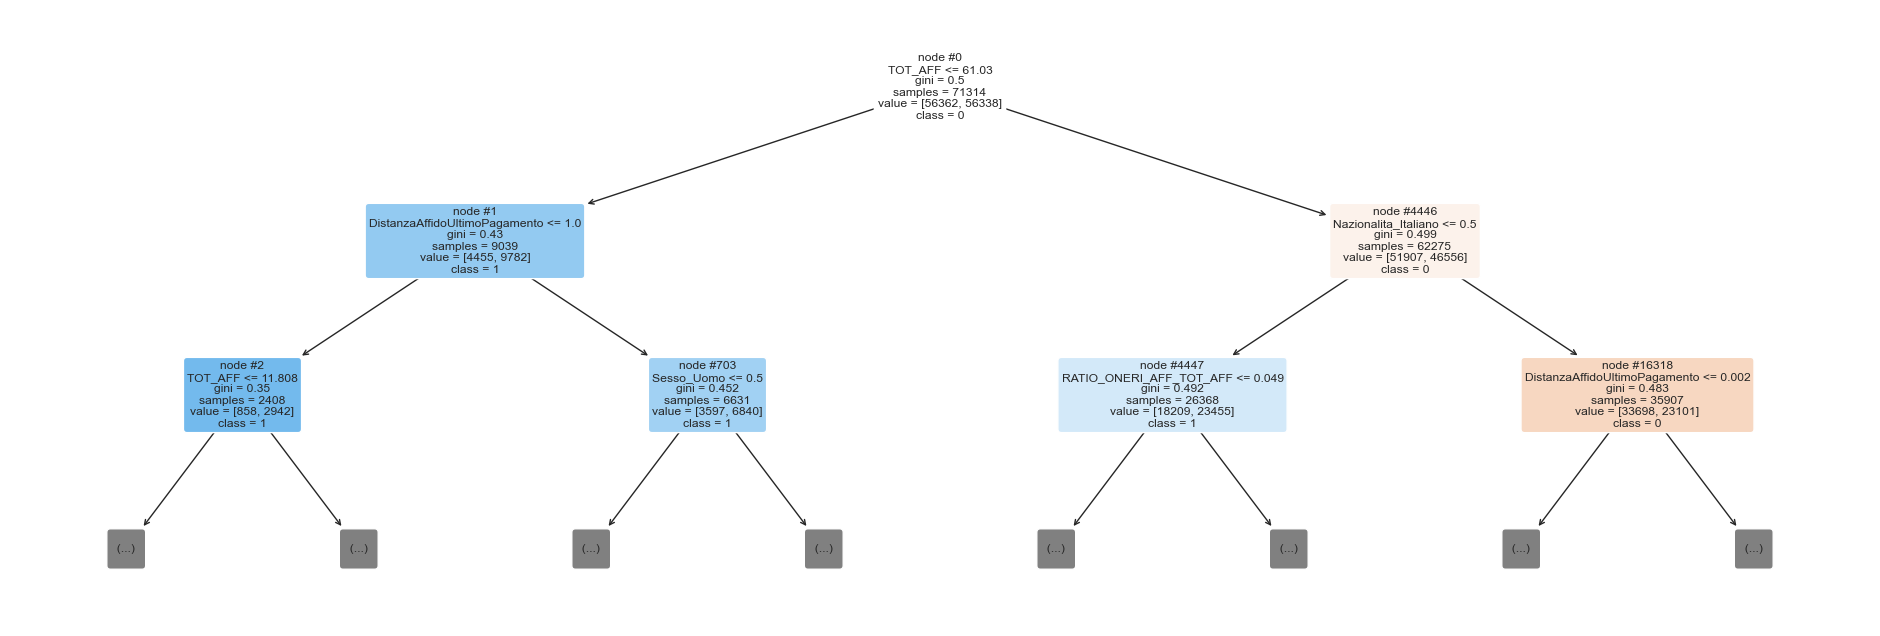

In [135]:
# Disegno l'albero con una profondità massima di 3 nodi
plt.figure(figsize=(24, 8))
plot_tree(modello_scelto.estimators_[0], filled=True, feature_names=X_train.columns, class_names=y_train.unique().astype(str), max_depth=2, node_ids = True, rounded = True)
plt.show()

In [136]:
quanti_alberi_vedere = 4
fn = X_train.columns
cn = y_train.unique().astype(str)
md = 2

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), dpi = 900)
for i in range(2):
    for j in range(2):
        index = i * 2 + j  # Calcolo l'indice dell'albero
        plt.sca(axes[i, j])  # Imposto l'asse corrente
        plot_tree(modello_scelto.estimators_[index], filled=True, feature_names=fn, class_names=cn, max_depth=md)

        axes[i, j].set_title('Albero ' + str(index+1), fontsize = 11)

# fig.savefig(f'Random forest custom + con {quanti_alberi_vedere} alberi.png')

<h6> Performance random forest </h6>

Performance sul training set:
              precision  recall  f1-score   support
0                  1.00    1.00      1.00 56,350.00
1                  1.00    1.00      1.00 35,682.00
accuracy           1.00    1.00      1.00      1.00
macro avg          1.00    1.00      1.00 92,032.00
weighted avg       1.00    1.00      1.00 92,032.00

Matrice di confusione:
          Predicted 0  Predicted 1
Actual 0        56212          138
Actual 1           19        35663

Accuracy score:
0.9982940716272601

Balanced Accuracy:
0.9985092695225055

Precision score:
0.9961453590681825

Recall score:
0.9994675186368477

F1-score:
0.9978036736007162

AUC score:
0.9999829910835669

Media:
0.9983671472565131

Media pesata:
0.9988518837088498


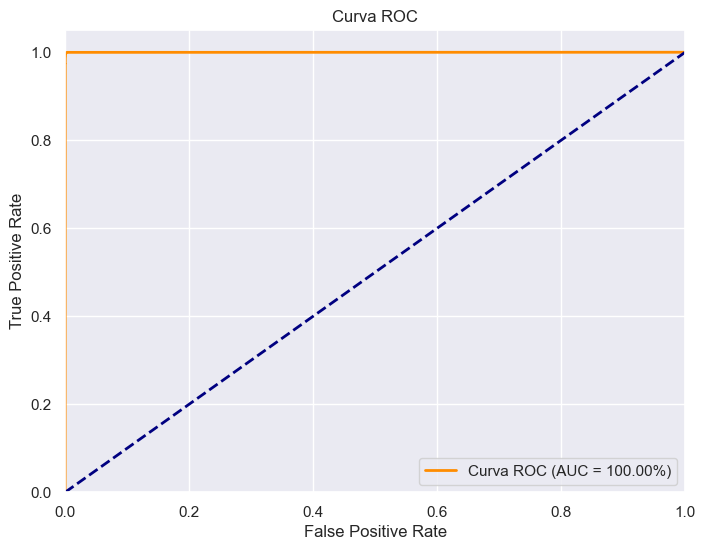

In [138]:
print('Performance sul training set:')
# Ottengo le probabilità previste
probabilità_train = modello_scelto.predict_proba(X_train)
# Estraggo le probabilità per la classe 1
probabilità_classe_1_train = probabilità_train[:, 1]

# Converto le probabilità in previsioni arrotondate (0 o 1)
predictions_rounded_train = np.round(probabilità_classe_1_train)

# Calcolo il report di classificazione
report_train = classification_report(y_train, predictions_rounded_train, output_dict=True)
df_train = pd.DataFrame(report_train).transpose()
print(df_train)

print('\nMatrice di confusione:')
# Calcolo la matrice di confusione
confusion_train = confusion_matrix(y_train, predictions_rounded_train)
confusion_df_train = pd.DataFrame(confusion_train, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print(confusion_df_train)

print('\nAccuracy score:')
accuracy_train = accuracy_score(y_train, predictions_rounded_train)
print(accuracy_train)

# Calcolo altre metriche
print('\nBalanced Accuracy:')
# Estraggo i valori dalla matrice di confusione
TN_train, FP_train, FN_train, TP_train = confusion_train.ravel()
# Calcolo il True Positive Rate (Recall)
recall_train = TP_train / (TP_train + FN_train)
# Calcolo il True Negative Rate (Specificity)
specificity_train = TN_train / (TN_train + FP_train)
# Calcolo la Balanced Accuracy (Accuracy Bilanciata)
balanced_accuracy_train = (recall_train + specificity_train) / 2
print(balanced_accuracy_train)

print('\nPrecision score:')
precision_train = precision_score(y_train, predictions_rounded_train)
print(precision_train)

print('\nRecall score:')
recall_train = recall_score(y_train, predictions_rounded_train)
print(recall_train)

print('\nF1-score:')
f1_train = f1_score(y_train, predictions_rounded_train)
print(f1_train)

print('\nAUC score:')
roc_auc_train = roc_auc_score(y_train, probabilità_classe_1_train)
print(roc_auc_train)


prime_6_metriche = [accuracy_train, recall_train, f1_train, balanced_accuracy_train, precision_train, roc_auc_train]

print('\nMedia:')
media_train = np.mean(prime_6_metriche)
print(media_train)

pesi_media_pesata = {'accuracy': 1, 'recall': 5, 'f1': 1, 'balanced_accuracy': 3, 'precision': 1, 'AUC': 2}

print('\nMedia pesata:')
media_pesata_train = sum(x * w for x, w in zip(prime_6_metriche, pesi_media_pesata.values())) / sum(pesi_media_pesata.values())
print(media_pesata_train)

# Calcolo la curva ROC
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probabilità_classe_1_train)

# Calcolo l'area sotto la curva ROC (AUC)
roc_auc_train = auc(fpr_train, tpr_train)
auc_percent_train = roc_auc_train * 100

# Creo il grafico della Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_percent_train:.2f}%)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
# plt.savefig(f'ROC_curve_custom_train_{counter}_{numero_modello}.png')
plt.show()

Performance sul resampled set:
              precision  recall  f1-score    support
0                  1.00    1.00      1.00  56,350.00
1                  1.00    1.00      1.00  56,350.00
accuracy           1.00    1.00      1.00       1.00
macro avg          1.00    1.00      1.00 112,700.00
weighted avg       1.00    1.00      1.00 112,700.00

Matrice di confusione:
          Predicted 0  Predicted 1
Actual 0        56212          138
Actual 1           19        56331

Accuracy score:
0.9986069210292813

Balanced Accuracy:
0.9986069210292813

Precision score:
0.9975561812675982

Recall score:
0.9996628216503993

F1-score:
0.9986083904306898

AUC score:
0.9999890400108965

Media:
0.9988383792363577

Media pesata:
0.9991449572376307


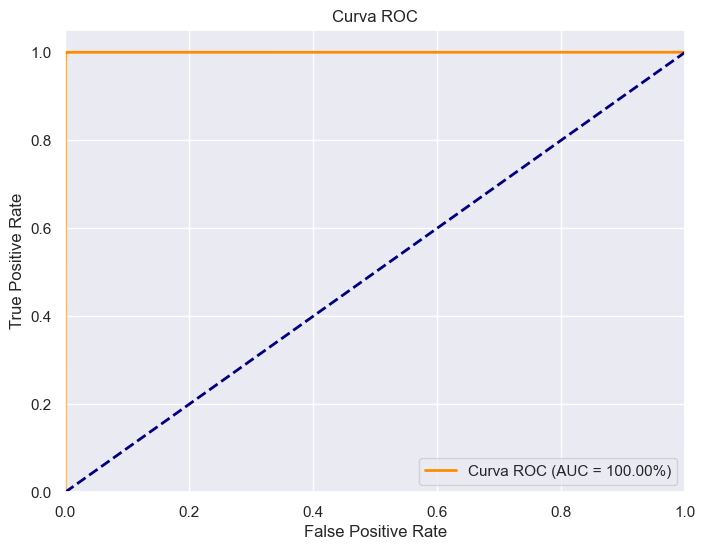

In [139]:
print('Performance sul resampled set:')
# Ottengo le probabilità previste
probabilità_res = modello_scelto.predict_proba(X_res)
# Estraggo le probabilità per la classe 1
probabilità_classe_1_res = probabilità_res[:, 1]

# Converto le probabilità in previsioni arrotondate (0 o 1)
predictions_rounded_res = np.round(probabilità_classe_1_res)

# Calcolo il report di classificazione
report_res = classification_report(y_res, predictions_rounded_res, output_dict=True)
df_res = pd.DataFrame(report_res).transpose()
print(df_res)

print('\nMatrice di confusione:')
# Calcolo la matrice di confusione
confusion_res = confusion_matrix(y_res, predictions_rounded_res)
confusion_df_res = pd.DataFrame(confusion_res, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print(confusion_df_res)

print('\nAccuracy score:')
accuracy_res = accuracy_score(y_res, predictions_rounded_res)
print(accuracy_res)

# Calcolo altre metriche
print('\nBalanced Accuracy:')
# Estraggo i valori dalla matrice di confusione
TN_res, FP_res, FN_res, TP_res = confusion_res.ravel()
# Calcolo il True Positive Rate (Recall)
recall_res = TP_res / (TP_res + FN_res)
# Calcolo il True Negative Rate (Specificity)
specificity_res = TN_res / (TN_res + FP_res)
# Calcolo la Balanced Accuracy (Accuracy Bilanciata)
balanced_accuracy_res = (recall_res + specificity_res) / 2
print(balanced_accuracy_res)

print('\nPrecision score:')
precision_res = precision_score(y_res, predictions_rounded_res)
print(precision_res)

print('\nRecall score:')
recall_res = recall_score(y_res, predictions_rounded_res)
print(recall_res)

print('\nF1-score:')
f1_res = f1_score(y_res, predictions_rounded_res)
print(f1_res)

print('\nAUC score:')
roc_auc_res = roc_auc_score(y_res, probabilità_classe_1_res)
print(roc_auc_res)


prime_6_metriche = [accuracy_res, recall_res, f1_res, balanced_accuracy_res, precision_res, roc_auc_res]

print('\nMedia:')
media_res = np.mean(prime_6_metriche)
print(media_res)

pesi_media_pesata = {'accuracy': 1, 'recall': 5, 'f1': 1, 'balanced_accuracy': 3, 'precision': 1, 'AUC': 2}

print('\nMedia pesata:')
media_pesata_res = sum(x * w for x, w in zip(prime_6_metriche, pesi_media_pesata.values())) / sum(pesi_media_pesata.values())
print(media_pesata_res)

# Calcolo la curva ROC
fpr_res, tpr_res, thresholds_res = roc_curve(y_res, probabilità_classe_1_res)

# Calcolo l'area sotto la curva ROC (AUC)
roc_auc_res = auc(fpr_res, tpr_res)
auc_percent_res = roc_auc_res * 100

# Creo il grafico della Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_res, tpr_res, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_percent_res:.2f}%)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
# plt.savefig(f'ROC_curve_custom_res_{counter}_{numero_modello}.png')
plt.show()

Performance sul test 1:
              precision  recall  f1-score   support
0                  0.78    0.82      0.80  6,186.00
1                  0.70    0.64      0.67  4,040.00
accuracy           0.75    0.75      0.75      0.75
macro avg          0.74    0.73      0.73 10,226.00
weighted avg       0.74    0.75      0.75 10,226.00

Matrice di confusione:
          Predicted 0  Predicted 1
Actual 0         5073         1113
Actual 1         1470         2570

Accuracy score:
0.7474085663993741

Balanced Accuracy:
0.7281081042148831

Precision score:
0.6978007059462394

Recall score:
0.6361386138613861

F1-score:
0.6655444775346367

AUC score:
0.812612678581146

Media:
0.714602191089611

Media pesata:
0.700076652999548


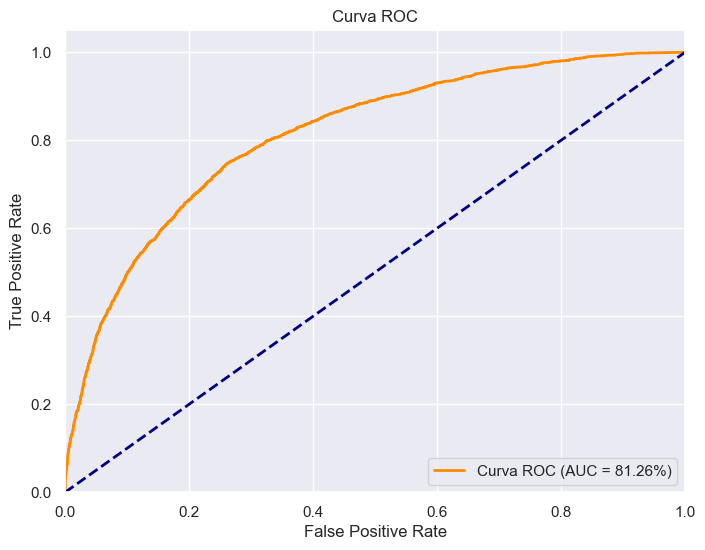

In [140]:
print('Performance sul test 1:')
# Ottengo le probabilità previste
probabilità_val = modello_scelto.predict_proba(X_val)
# Estraggo le probabilità per la classe 1
probabilità_classe_1_val = probabilità_val[:, 1]

# Converto le probabilità in previsioni arrotondate (0 o 1)
predictions_rounded_val = np.round(probabilità_classe_1_val)

# Calcolo il report di classificazione
report_val = classification_report(y_val, predictions_rounded_val, output_dict=True)
df_val = pd.DataFrame(report_val).transpose()
print(df_val)

print('\nMatrice di confusione:')
# Calcolo la matrice di confusione
confusion_val = confusion_matrix(y_val, predictions_rounded_val)
confusion_df_val = pd.DataFrame(confusion_val, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print(confusion_df_val)

print('\nAccuracy score:')
accuracy_val = accuracy_score(y_val, predictions_rounded_val)
print(accuracy_val)

# Calcolo altre metriche
print('\nBalanced Accuracy:')
# Estraggo i valori dalla matrice di confusione
TN_val, FP_val, FN_val, TP_val = confusion_val.ravel()
# Calcolo il True Positive Rate (Recall)
recall_val = TP_val / (TP_val + FN_val)
# Calcolo il True Negative Rate (Specificity)
specificity_val = TN_val / (TN_val + FP_val)
# Calcolo la Balanced Accuracy (Accuracy Bilanciata)
balanced_accuracy_val = (recall_val + specificity_val) / 2
print(balanced_accuracy_val)

print('\nPrecision score:')
precision_val = precision_score(y_val, predictions_rounded_val)
print(precision_val)

print('\nRecall score:')
recall_val = recall_score(y_val, predictions_rounded_val)
print(recall_val)

print('\nF1-score:')
f1_val = f1_score(y_val, predictions_rounded_val)
print(f1_val)

print('\nAUC score:')
roc_auc_val = roc_auc_score(y_val, probabilità_classe_1_val)
print(roc_auc_val)


prime_6_metriche = [accuracy_val, recall_val, f1_val, balanced_accuracy_val, precision_val, roc_auc_val]

print('\nMedia:')
media_val = np.mean(prime_6_metriche)
print(media_val)

pesi_media_pesata = {'accuracy': 1, 'recall': 5, 'f1': 1, 'balanced_accuracy': 3, 'precision': 1, 'AUC': 2}

print('\nMedia pesata:')
media_pesata_val = sum(x * w for x, w in zip(prime_6_metriche, pesi_media_pesata.values())) / sum(pesi_media_pesata.values())
print(media_pesata_val)

# Calcolo la curva ROC
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, probabilità_classe_1_val)

# Calcolo l'area sotto la curva ROC (AUC)
roc_auc_val = auc(fpr_val, tpr_val)
auc_percent_val = roc_auc_val * 100

# Creo il grafico della Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_percent_val:.2f}%)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
# plt.savefig(f'ROC_curve_custom_test_1_{counter}_{numero_modello}.png')
plt.show()

Performance sul test out-of-sample:
              precision  recall  f1-score   support
0                  0.78    0.83      0.81  6,924.00
1                  0.71    0.64      0.67  4,439.00
accuracy           0.76    0.76      0.76      0.76
macro avg          0.74    0.74      0.74 11,363.00
weighted avg       0.75    0.76      0.75 11,363.00

Matrice di confusione:
          Predicted 0  Predicted 1
Actual 0         5737         1187
Actual 1         1585         2854

Accuracy score:
0.7560503388189739

Balanced Accuracy:
0.7357524503478633

Precision score:
0.7062608265280871

Recall score:
0.6429375985582338

F1-score:
0.6731132075471697

AUC score:
0.8217257648418274

Media:
0.7226400311070259

Media pesata:
0.7077554804932803


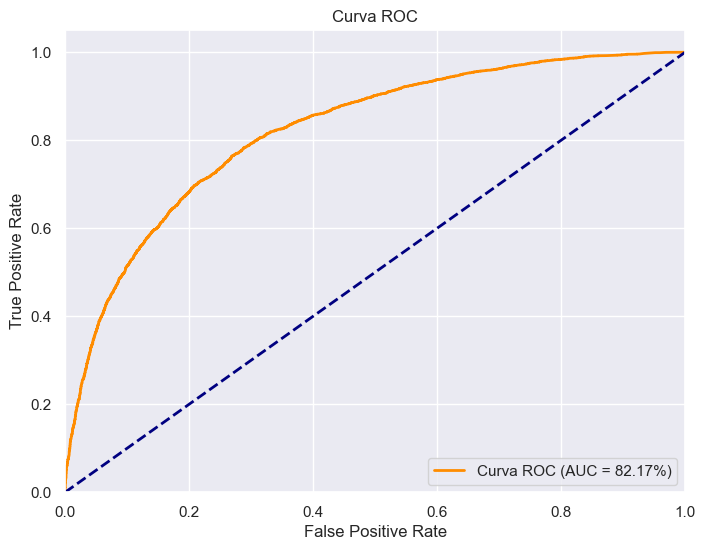

In [141]:
print('Performance sul test out-of-sample:')
# Ottengo le probabilità previste
probabilità_test = modello_scelto.predict_proba(X_test)
# Estraggo le probabilità per la classe 1
probabilità_classe_1_test = probabilità_test[:, 1]

# Converto le probabilità in previsioni arrotondate (0 o 1)
predictions_rounded_test = np.round(probabilità_classe_1_test)

# Calcolo il report di classificazione
report_test = classification_report(y_test, predictions_rounded_test, output_dict=True)
df_test = pd.DataFrame(report_test).transpose()
print(df_test)

print('\nMatrice di confusione:')
# Calcolo la matrice di confusione
confusion_test = confusion_matrix(y_test, predictions_rounded_test)
confusion_df_test = pd.DataFrame(confusion_test, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print(confusion_df_test)

print('\nAccuracy score:')
accuracy_test = accuracy_score(y_test, predictions_rounded_test)
print(accuracy_test)

# Calcolo altre metriche
print('\nBalanced Accuracy:')
# Estraggo i valori dalla matrice di confusione
TN_test, FP_test, FN_test, TP_test = confusion_test.ravel()
# Calcolo il True Positive Rate (Recall)
recall_test = TP_test / (TP_test + FN_test)
# Calcolo il True Negative Rate (Specificity)
specificity_test = TN_test / (TN_test + FP_test)
# Calcolo la Balanced Accuracy (Accuracy Bilanciata)
balanced_accuracy_test = (recall_test + specificity_test) / 2
print(balanced_accuracy_test)

print('\nPrecision score:')
precision_test = precision_score(y_test, predictions_rounded_test)
print(precision_test)

print('\nRecall score:')
recall_test = recall_score(y_test, predictions_rounded_test)
print(recall_test)

print('\nF1-score:')
f1_test = f1_score(y_test, predictions_rounded_test)
print(f1_test)

print('\nAUC score:')
roc_auc_test = roc_auc_score(y_test, probabilità_classe_1_test)
print(roc_auc_test)


prime_6_metriche = [accuracy_test, recall_test, f1_test, balanced_accuracy_test, precision_test, roc_auc_test]

print('\nMedia:')
media_test = np.mean(prime_6_metriche)
print(media_test)

pesi_media_pesata = {'accuracy': 1, 'recall': 5, 'f1': 1, 'balanced_accuracy': 3, 'precision': 1, 'AUC': 2}

print('\nMedia pesata:')
media_pesata_test = sum(x * w for x, w in zip(prime_6_metriche, pesi_media_pesata.values())) / sum(pesi_media_pesata.values())
print(media_pesata_test)

# Calcolo la curva ROC
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probabilità_classe_1_test)

# Calcolo l'area sotto la curva ROC (AUC)
roc_auc_test = auc(fpr_test, tpr_test)
auc_percent_test = roc_auc_test * 100

# Creo il grafico della Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_percent_test:.2f}%)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
# plt.savefig(f'ROC_curve_custom_test_out_of_sample_{counter}_{numero_modello}.png')
plt.show()

<h6> Feature importances con one-hot encoding </h6>

Importanza delle caratteristiche:
                                              Feature  Importance
3                             RATIO_ONERI_AFF_TOT_AFF      0.1297
6                                             TOT_AFF      0.0807
9                                    AgeingGestioneGg      0.0681
4                                      IMP_FINANZIATO      0.0676
10                                 AgeingErogazioneGg      0.0612
12                                       Cash Balance      0.0583
1                                 Severity_12M_pesata      0.0560
11                                    Ratio_Rate_Imp1      0.0533
51                               Flag_Rate_piu_uno_SI      0.0484
2                                        Severity_12M      0.0475
0                                        Eta_Debitore      0.0453
8                             DurataFinanziamentoAnni      0.0307
5                                     Numero_mesi_rec      0.0285
7                       DistanzaAffidoUlti

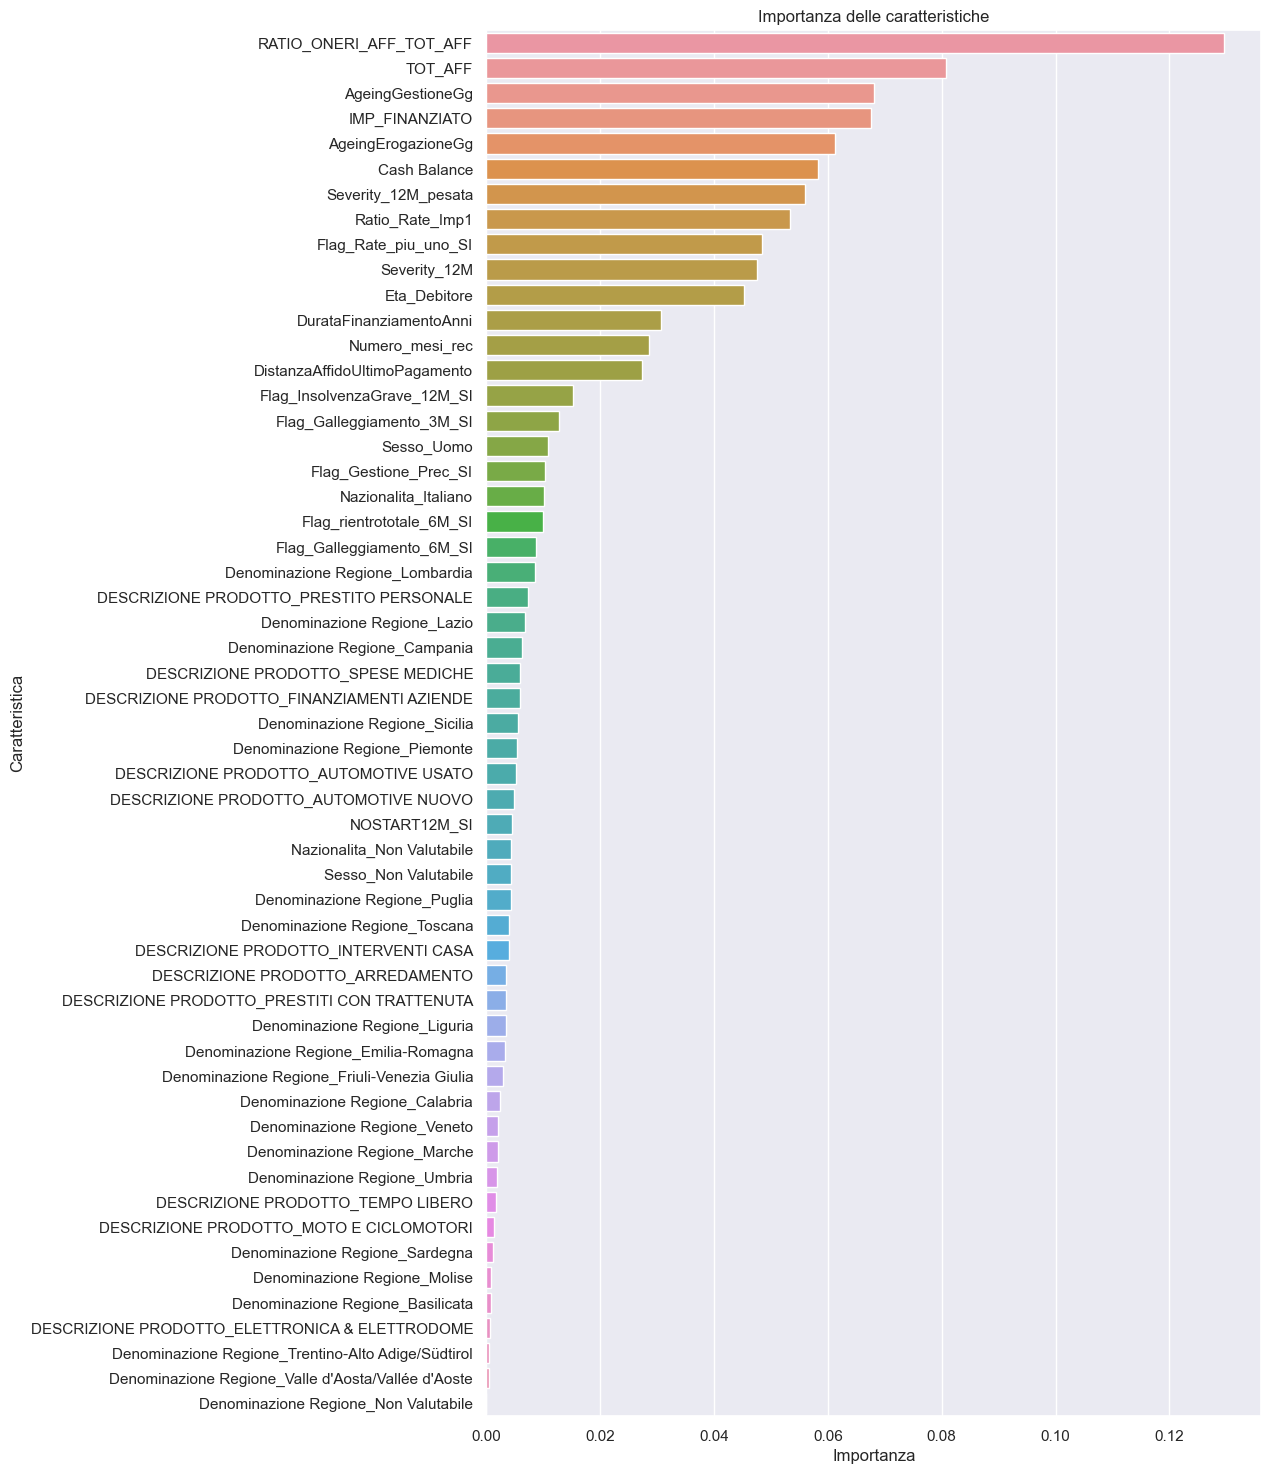

In [142]:
# Imposto il formato di stampa per le colonne decimali a 4 decimali
pd.set_option('display.float_format', '{:.4f}'.format)

# Estraggo l'importanza delle caratteristiche
feature_importance = modello_scelto.feature_importances_

# Prendo i nomi delle caratteristiche dal dataset
feature_names = X_train.columns

# Creo un DataFrame per la visualizzazione
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordino le caratteristiche per importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print('Importanza delle caratteristiche:')
# feature_df['Importance'] = str(feature_df['Importance']) + '%'
print(feature_df)

# Visualizzo l'importanza delle caratteristiche
plt.figure(figsize=(10, round(len(feature_names)/3)))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Importanza delle caratteristiche')
plt.xlabel('Importanza')
plt.ylabel('Caratteristica')
plt.show()

<h6> Feature importances senza one-hot encoding </h6>

Importanza delle caratteristiche:
                          Feature  Importance
16                        TOT_AFF      0.2103
5         RATIO_ONERI_AFF_TOT_AFF      0.1297
4                    Severity_12M      0.1035
20               AgeingGestioneGg      0.0681
7                  IMP_FINANZIATO      0.0676
6           Denominazione Regione      0.0623
21             AgeingErogazioneGg      0.0612
23                   Cash Balance      0.0583
3             Severity_12M_pesata      0.0560
22                Ratio_Rate_Imp1      0.0533
13              Flag_Rate_piu_uno      0.0484
2                    Eta_Debitore      0.0453
9            DESCRIZIONE PRODOTTO      0.0436
19        DurataFinanziamentoAnni      0.0307
11                Numero_mesi_rec      0.0285
18  DistanzaAffidoUltimoPagamento      0.0274
1                           Sesso      0.0153
10       Flag_InsolvenzaGrave_12M      0.0152
0                     Nazionalita      0.0145
15         Flag_Galleggiamento_3M      0.0127


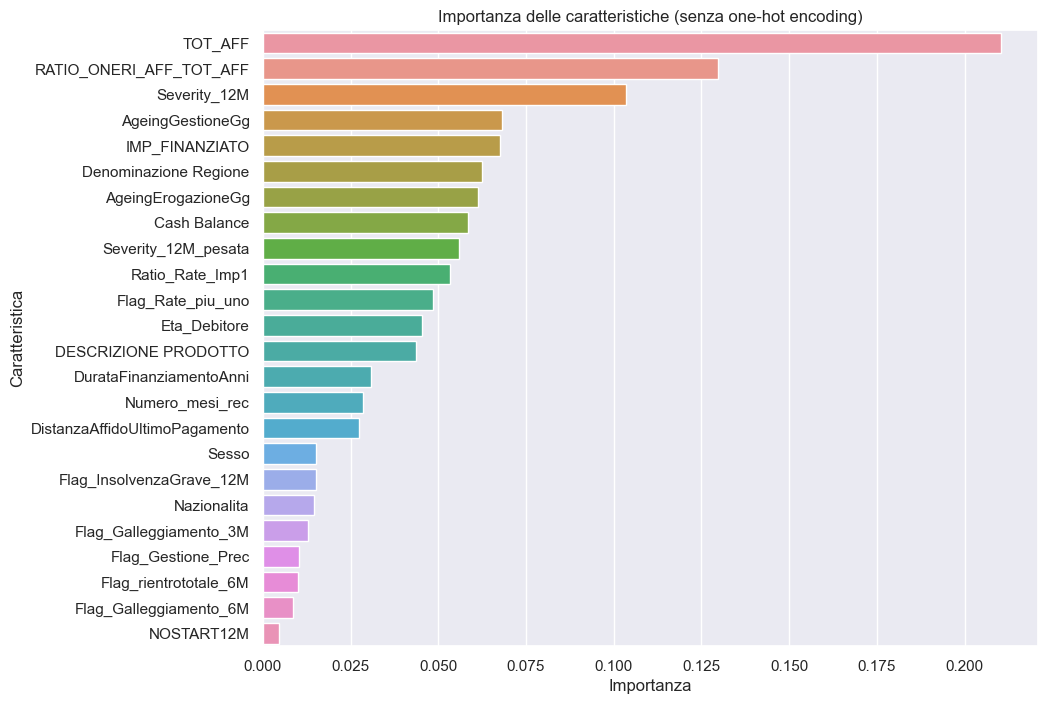

In [143]:
# Imposto il formato di stampa per le colonne decimali a 4 decimali
pd.set_option('display.float_format', '{:.4f}'.format)

# Estraggo l'importanza delle caratteristiche
feature_importance_tot = modello_scelto.feature_importances_

# Prendo i nomi delle caratteristiche dal dataset senza one-hot encoding
feature_names_no_one_hot = df_senza_valori_nan.drop('Target_95', axis=1).columns

# Mappo le colonne al loro corrispondente nel one-hot encoding
mapped_features = {}
for col_no_one_hot in feature_names_no_one_hot:
    matched_columns = [col_one_hot for col_one_hot in X_train.columns if col_no_one_hot in col_one_hot]
    if matched_columns:
        mapped_features[col_no_one_hot] = matched_columns

# Calcolo l'importanza aggregata per le caratteristiche originali
aggregated_importance = {}
for original_feature, one_hot_columns in mapped_features.items():
    indices = [X_train.columns.get_loc(col) for col in one_hot_columns]  # Trovo gli indici delle colonne nel DataFrame one-hot
    aggregated_importance[original_feature] = feature_importance_tot[indices].sum()

# Creo un DataFrame per la visualizzazione
aggregated_feature_df = pd.DataFrame({'Feature': list(aggregated_importance.keys()), 'Importance': list(aggregated_importance.values())})

# Ordino le caratteristiche per importanza
aggregated_feature_df = aggregated_feature_df.sort_values(by='Importance', ascending=False)
print('Importanza delle caratteristiche:')
print(aggregated_feature_df)

# Visualizzo l'importanza delle caratteristiche
plt.figure(figsize=(10, round(len(aggregated_importance)/3)))
sns.barplot(x='Importance', y='Feature', data=aggregated_feature_df)
plt.title('Importanza delle caratteristiche (senza one-hot encoding)')
plt.xlabel('Importanza')
plt.ylabel('Caratteristica')

percorso_immagine = r"C:\Users\qj1aleimbria\Desktop\File VS Code\11 - 16 10 23 (ML su Prestitempo)\Feature importances (immagini)"
nome_immagine = f'Feature_importance_{custom_o_standard}_senza_one_hot_{numero_cartella}_{numero_modello}.png'
percorso_completo_immagine = percorso_immagine + "\\" + nome_immagine

# Salva l'immagine nel percorso specificato
plt.savefig(percorso_completo_immagine)

plt.show()

In [144]:
df_senza_valori_nan.columns

Index(['Target_95', 'Nazionalita', 'Sesso', 'Eta_Debitore',
       'Severity_12M_pesata', 'Severity_12M', 'RATIO_ONERI_AFF_TOT_AFF',
       'Denominazione Regione', 'IMP_FINANZIATO', 'Flag_Galleggiamento_6M',
       'DESCRIZIONE PRODOTTO', 'Flag_InsolvenzaGrave_12M', 'Numero_mesi_rec',
       'Flag_rientrototale_6M', 'Flag_Rate_piu_uno', 'Flag_Gestione_Prec',
       'Flag_Galleggiamento_3M', 'TOT_AFF', 'NOSTART12M',
       'DistanzaAffidoUltimoPagamento', 'DurataFinanziamentoAnni',
       'AgeingGestioneGg', 'AgeingErogazioneGg', 'Ratio_Rate_Imp1',
       'Cash Balance'],
      dtype='object')

### Creo un nuovo dataframe con nuove colonne

In [145]:
# Concateno i DataFrame X_train, X_val e X_test verticalmente
X_concatenato = pd.concat([X_train, X_val, X_test], axis=0)

# Concateno le etichette target y_train, y_val e y_test verticalmente
y_concatenato = pd.concat([y_train, y_val, y_test], axis=0)

# Creo una colonna 'Origine' con i flag che indicano l'origine dei dati
origine_train = ['Train'] * len(X_train)
origine_val = ['Test_1'] * len(X_val)
origine_test = ['Test out-of-sample'] * len(X_test)

origine = origine_train + origine_val + origine_test

# Creo un nuovo DataFrame con tutte le colonne desiderate
df_completo = pd.DataFrame(data=X_concatenato)
df_completo['Target_95'] = y_concatenato
df_completo['Origine'] = origine

df_completo

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
36698       52.0000               1.5208        2.2500   
90092       50.0000               0.6181        1.1667   
156         24.0000               1.3452        1.5714   
37624       52.0000               0.7014        1.1667   
69227       41.0000               0.5417        1.0000   
...             ...                  ...           ...   
84799       42.0000               0.4931        0.9167   
23810       57.0000               0.5667        0.8000   
23132       30.0000               0.7083        1.2500   
83040       60.0000               0.5417        1.0000   
41883       45.0000               0.7986        1.3333   

       RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
36698                   0.0434       5000.0000          12.0000 276.2500   
90092                   0.0000      19586.0000          12.0000 263.2400   
156                     0.2015       1500.0000           6.0000  90.0600   
37624                   0.0387      16439.9000          12.0000 310.2200   
69227                   0.0000      14224.0000          12.0000 252.0700   
...                        ...             ...              ...      ...   
84799                   0.0000       2528.7500           5.0000  49.2700   
23810                   0.4366       2000.0000           8.0000 299.7500   
23132                   0.0493       2450.0000          12.0000 243.5100   
83040                   0.0965       5577.0000          12.0000 124.3800   
41883                   0.0496      16125.0000          12.0000 241.8200   

       DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
36698                         0.0000                   4.0000   
90092                         1.0000                   3.0833   
156                           1.0000                   2.0000   
37624                         0.0000                   7.0000   
69227                         1.0000                   8.0000   
...                              ...                      ...   
84799                         1.0000                   3.0000   
23810                         2.0000                   1.0000   
23132                         2.0000                   2.0000   
83040                         1.0000                   6.0000   
41883                         1.0000                  10.0000   

       AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
36698          999.0000           1126.0000           0.7708     1407.7700   
90092           14.0000            456.0000           0.4054    17528.0300   
156             16.0000            183.0000           0.2500     1218.7400   
37624           28.0000           2434.0000           0.9524     1266.7900   
69227           15.0000           1743.0000           0.5938     7217.5800   
...                 ...                 ...              ...           ...   
84799           15.0000            668.0000           0.6111     1032.6700   
23810           29.0000            272.0000           0.7500      668.1400   
23132           31.0000            670.0000           0.9167      337.7800   
83040           17.0000           1673.0000           0.7639     1732.0900   
41883           28.0000           3530.0000           0.9667     1037.8600   

       Nazionalita_Italiano  Nazionalita_Non Valutabile  Sesso_Non Valutabile  \
36698                     1                           0                     0   
90092                     0                           1                     1   
156                       1                           0                     0   
37624                     0                           0                     0   
69227                     1                           0                     0   
...                     ...                         ...                   ...   
84799                     1                           0                     0   
23810                     1    

In [146]:
ordine_colonne = dummies.columns
ordine_colonne

Index(['Target_95', 'Eta_Debitore', 'Severity_12M_pesata', 'Severity_12M',
       'RATIO_ONERI_AFF_TOT_AFF', 'IMP_FINANZIATO', 'Numero_mesi_rec',
       'TOT_AFF', 'DistanzaAffidoUltimoPagamento', 'DurataFinanziamentoAnni',
       'AgeingGestioneGg', 'AgeingErogazioneGg', 'Ratio_Rate_Imp1',
       'Cash Balance', 'Nazionalita_Italiano', 'Nazionalita_Non Valutabile',
       'Sesso_Non Valutabile', 'Sesso_Uomo',
       'Denominazione Regione_Basilicata', 'Denominazione Regione_Calabria',
       'Denominazione Regione_Campania',
       'Denominazione Regione_Emilia-Romagna',
       'Denominazione Regione_Friuli-Venezia Giulia',
       'Denominazione Regione_Lazio', 'Denominazione Regione_Liguria',
       'Denominazione Regione_Lombardia', 'Denominazione Regione_Marche',
       'Denominazione Regione_Molise', 'Denominazione Regione_Non Valutabile',
       'Denominazione Regione_Piemonte', 'Denominazione Regione_Puglia',
       'Denominazione Regione_Sardegna', 'Denominazione Regione_Sicili

In [147]:
# Calcolo le probabilità continue utilizzando il mio modello_scelto
features = ordine_colonne.drop('Target_95')

probabilità_continue = modello_scelto.predict_proba(df_completo[features])

# Estraggo le probabilità relative alla classe 1
probabilità_classe_1 = probabilità_continue[:, 1]

# Aggiungo una nuova colonna al DataFrame df_completo con le probabilità continue
df_completo['Probabilità_Target_95_predicted'] = probabilità_classe_1

df_completo

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
36698       52.0000               1.5208        2.2500   
90092       50.0000               0.6181        1.1667   
156         24.0000               1.3452        1.5714   
37624       52.0000               0.7014        1.1667   
69227       41.0000               0.5417        1.0000   
...             ...                  ...           ...   
84799       42.0000               0.4931        0.9167   
23810       57.0000               0.5667        0.8000   
23132       30.0000               0.7083        1.2500   
83040       60.0000               0.5417        1.0000   
41883       45.0000               0.7986        1.3333   

       RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
36698                   0.0434       5000.0000          12.0000 276.2500   
90092                   0.0000      19586.0000          12.0000 263.2400   
156                     0.2015       1500.0000           6.0000  90.0600   
37624                   0.0387      16439.9000          12.0000 310.2200   
69227                   0.0000      14224.0000          12.0000 252.0700   
...                        ...             ...              ...      ...   
84799                   0.0000       2528.7500           5.0000  49.2700   
23810                   0.4366       2000.0000           8.0000 299.7500   
23132                   0.0493       2450.0000          12.0000 243.5100   
83040                   0.0965       5577.0000          12.0000 124.3800   
41883                   0.0496      16125.0000          12.0000 241.8200   

       DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
36698                         0.0000                   4.0000   
90092                         1.0000                   3.0833   
156                           1.0000                   2.0000   
37624                         0.0000                   7.0000   
69227                         1.0000                   8.0000   
...                              ...                      ...   
84799                         1.0000                   3.0000   
23810                         2.0000                   1.0000   
23132                         2.0000                   2.0000   
83040                         1.0000                   6.0000   
41883                         1.0000                  10.0000   

       AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
36698          999.0000           1126.0000           0.7708     1407.7700   
90092           14.0000            456.0000           0.4054    17528.0300   
156             16.0000            183.0000           0.2500     1218.7400   
37624           28.0000           2434.0000           0.9524     1266.7900   
69227           15.0000           1743.0000           0.5938     7217.5800   
...                 ...                 ...              ...           ...   
84799           15.0000            668.0000           0.6111     1032.6700   
23810           29.0000            272.0000           0.7500      668.1400   
23132           31.0000            670.0000           0.9167      337.7800   
83040           17.0000           1673.0000           0.7639     1732.0900   
41883           28.0000           3530.0000           0.9667     1037.8600   

       Nazionalita_Italiano  Nazionalita_Non Valutabile  Sesso_Non Valutabile  \
36698                     1                           0                     0   
90092                     0                           1                     1   
156                       1                           0                     0   
37624                     0                           0                     0   
69227                     1                           0                     0   
...                     ...                         ...                   ...   
84799                     1                           0                     0   
23810                     1    

In [148]:
df_completo.index

Int64Index([ 36698,  90092,    156,  37624,  69227, 102293,  63860,  72023,
             90078,  78772,
            ...
              4750,  73475,  66619,  74954,  66272,  84799,  23810,  23132,
             83040,  41883],
           dtype='int64', length=113621)

In [149]:
# Controllo se in df_clienti c'erano certe colonne
lista_check = ['CODICE_PHONIA', 'TOT REC', 'PRATICA', 'Chiave', 'TOT AFF']

sono_presenti_tutti = all(colonna in df_clienti.columns for colonna in lista_check)
sono_presenti_tutti

True

In [150]:
sorted(df_clienti.columns)

['AgeingErogazioneGg',
 'AgeingGestioneGg',
 'CODICE_PHONIA',
 'COD_FISC_INT',
 'CURRENT_BALANCE',
 'Cash Balance',
 'Chiave',
 'Codi_FISC_INT_2',
 'DATA AFFIDO',
 'DATA FINE LAV',
 'DATA_AFFIDO',
 'DATA_AGGIORNAMENTO',
 'DATA_ESTINZ',
 'DATA_FINANZIAM',
 'DATA_FINE_AFFIDO',
 'DELIN_HISTORY',
 'DES_BENE',
 'DES_PRODOTTO',
 'DT_VAL_RAT_IMP1',
 'DT_VAL_RAT_IMP2',
 'DT_VAL_ULT_PAGAM',
 'Denominazione Regione',
 'DistanzaAffidoUltimoPagamento',
 'DurataFinanziamentoAnni',
 'Eta_Debitore',
 'FlagRecOver100',
 'Flag_Cointestazione',
 'Flag_Galleggiamento_3M',
 'Flag_Galleggiamento_6M',
 'Flag_Garante',
 'Flag_Gestione_Prec',
 'Flag_InsolvenzaGrave_12M',
 'Flag_InsolvenzaGrave_3M',
 'Flag_InsolvenzaGrave_6M',
 'Flag_Miglioramento_3M',
 'Flag_Rate_piu_uno',
 'Flag_Riciclo_SDD',
 'Flag_Rifinanziamento',
 'Flag_Scivolamento_3M',
 'Flag_Scivolamento_6M',
 'Flag_rientrototale_6M',
 'IMP_FINANZIATO',
 'IMP_MAXIRATA',
 'IMP_PAG_RAT_IMP1',
 'IMP_PAG_RAT_IMP2',
 'IMP_RAT_IMP1',
 'IMP_RAT_IMP2',
 'MACR

In [151]:
df_completo

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
36698       52.0000               1.5208        2.2500   
90092       50.0000               0.6181        1.1667   
156         24.0000               1.3452        1.5714   
37624       52.0000               0.7014        1.1667   
69227       41.0000               0.5417        1.0000   
...             ...                  ...           ...   
84799       42.0000               0.4931        0.9167   
23810       57.0000               0.5667        0.8000   
23132       30.0000               0.7083        1.2500   
83040       60.0000               0.5417        1.0000   
41883       45.0000               0.7986        1.3333   

       RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
36698                   0.0434       5000.0000          12.0000 276.2500   
90092                   0.0000      19586.0000          12.0000 263.2400   
156                     0.2015       1500.0000           6.0000  90.0600   
37624                   0.0387      16439.9000          12.0000 310.2200   
69227                   0.0000      14224.0000          12.0000 252.0700   
...                        ...             ...              ...      ...   
84799                   0.0000       2528.7500           5.0000  49.2700   
23810                   0.4366       2000.0000           8.0000 299.7500   
23132                   0.0493       2450.0000          12.0000 243.5100   
83040                   0.0965       5577.0000          12.0000 124.3800   
41883                   0.0496      16125.0000          12.0000 241.8200   

       DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
36698                         0.0000                   4.0000   
90092                         1.0000                   3.0833   
156                           1.0000                   2.0000   
37624                         0.0000                   7.0000   
69227                         1.0000                   8.0000   
...                              ...                      ...   
84799                         1.0000                   3.0000   
23810                         2.0000                   1.0000   
23132                         2.0000                   2.0000   
83040                         1.0000                   6.0000   
41883                         1.0000                  10.0000   

       AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
36698          999.0000           1126.0000           0.7708     1407.7700   
90092           14.0000            456.0000           0.4054    17528.0300   
156             16.0000            183.0000           0.2500     1218.7400   
37624           28.0000           2434.0000           0.9524     1266.7900   
69227           15.0000           1743.0000           0.5938     7217.5800   
...                 ...                 ...              ...           ...   
84799           15.0000            668.0000           0.6111     1032.6700   
23810           29.0000            272.0000           0.7500      668.1400   
23132           31.0000            670.0000           0.9167      337.7800   
83040           17.0000           1673.0000           0.7639     1732.0900   
41883           28.0000           3530.0000           0.9667     1037.8600   

       Nazionalita_Italiano  Nazionalita_Non Valutabile  Sesso_Non Valutabile  \
36698                     1                           0                     0   
90092                     0                           1                     1   
156                       1                           0                     0   
37624                     0                           0                     0   
69227                     1                           0                     0   
...                     ...                         ...                   ...   
84799                     1                           0                     0   
23810                     1    

In [152]:
# df_completo = df_completo.merge(df_clienti[lista_check], left_on=lista_colonne, right_on=lista_colonne, how='left')

In [153]:
# Faccio una left join per agganciarmi le colonne di lista_check
df_completo = df_completo.merge(df_clienti[lista_check], left_index=True, right_index=True, how='left')

In [154]:
df_completo

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
36698       52.0000               1.5208        2.2500   
90092       50.0000               0.6181        1.1667   
156         24.0000               1.3452        1.5714   
37624       52.0000               0.7014        1.1667   
69227       41.0000               0.5417        1.0000   
...             ...                  ...           ...   
84799       42.0000               0.4931        0.9167   
23810       57.0000               0.5667        0.8000   
23132       30.0000               0.7083        1.2500   
83040       60.0000               0.5417        1.0000   
41883       45.0000               0.7986        1.3333   

       RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
36698                   0.0434       5000.0000          12.0000 276.2500   
90092                   0.0000      19586.0000          12.0000 263.2400   
156                     0.2015       1500.0000           6.0000  90.0600   
37624                   0.0387      16439.9000          12.0000 310.2200   
69227                   0.0000      14224.0000          12.0000 252.0700   
...                        ...             ...              ...      ...   
84799                   0.0000       2528.7500           5.0000  49.2700   
23810                   0.4366       2000.0000           8.0000 299.7500   
23132                   0.0493       2450.0000          12.0000 243.5100   
83040                   0.0965       5577.0000          12.0000 124.3800   
41883                   0.0496      16125.0000          12.0000 241.8200   

       DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
36698                         0.0000                   4.0000   
90092                         1.0000                   3.0833   
156                           1.0000                   2.0000   
37624                         0.0000                   7.0000   
69227                         1.0000                   8.0000   
...                              ...                      ...   
84799                         1.0000                   3.0000   
23810                         2.0000                   1.0000   
23132                         2.0000                   2.0000   
83040                         1.0000                   6.0000   
41883                         1.0000                  10.0000   

       AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
36698          999.0000           1126.0000           0.7708     1407.7700   
90092           14.0000            456.0000           0.4054    17528.0300   
156             16.0000            183.0000           0.2500     1218.7400   
37624           28.0000           2434.0000           0.9524     1266.7900   
69227           15.0000           1743.0000           0.5938     7217.5800   
...                 ...                 ...              ...           ...   
84799           15.0000            668.0000           0.6111     1032.6700   
23810           29.0000            272.0000           0.7500      668.1400   
23132           31.0000            670.0000           0.9167      337.7800   
83040           17.0000           1673.0000           0.7639     1732.0900   
41883           28.0000           3530.0000           0.9667     1037.8600   

       Nazionalita_Italiano  Nazionalita_Non Valutabile  Sesso_Non Valutabile  \
36698                     1                           0                     0   
90092                     0                           1                     1   
156                       1                           0                     0   
37624                     0                           0                     0   
69227                     1                           0                     0   
...                     ...                         ...                   ...   
84799                     1                           0                     0   
23810                     1    

In [155]:
df_completo['Target_95_predicted'] = round(df_completo['Probabilità_Target_95_predicted'])

In [156]:
# df_completo.rename(columns={'Target_95_continuo': 'Probabilità_Target_95_predicted'}, inplace=True)

In [157]:
df_completo

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
36698       52.0000               1.5208        2.2500   
90092       50.0000               0.6181        1.1667   
156         24.0000               1.3452        1.5714   
37624       52.0000               0.7014        1.1667   
69227       41.0000               0.5417        1.0000   
...             ...                  ...           ...   
84799       42.0000               0.4931        0.9167   
23810       57.0000               0.5667        0.8000   
23132       30.0000               0.7083        1.2500   
83040       60.0000               0.5417        1.0000   
41883       45.0000               0.7986        1.3333   

       RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
36698                   0.0434       5000.0000          12.0000 276.2500   
90092                   0.0000      19586.0000          12.0000 263.2400   
156                     0.2015       1500.0000           6.0000  90.0600   
37624                   0.0387      16439.9000          12.0000 310.2200   
69227                   0.0000      14224.0000          12.0000 252.0700   
...                        ...             ...              ...      ...   
84799                   0.0000       2528.7500           5.0000  49.2700   
23810                   0.4366       2000.0000           8.0000 299.7500   
23132                   0.0493       2450.0000          12.0000 243.5100   
83040                   0.0965       5577.0000          12.0000 124.3800   
41883                   0.0496      16125.0000          12.0000 241.8200   

       DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
36698                         0.0000                   4.0000   
90092                         1.0000                   3.0833   
156                           1.0000                   2.0000   
37624                         0.0000                   7.0000   
69227                         1.0000                   8.0000   
...                              ...                      ...   
84799                         1.0000                   3.0000   
23810                         2.0000                   1.0000   
23132                         2.0000                   2.0000   
83040                         1.0000                   6.0000   
41883                         1.0000                  10.0000   

       AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
36698          999.0000           1126.0000           0.7708     1407.7700   
90092           14.0000            456.0000           0.4054    17528.0300   
156             16.0000            183.0000           0.2500     1218.7400   
37624           28.0000           2434.0000           0.9524     1266.7900   
69227           15.0000           1743.0000           0.5938     7217.5800   
...                 ...                 ...              ...           ...   
84799           15.0000            668.0000           0.6111     1032.6700   
23810           29.0000            272.0000           0.7500      668.1400   
23132           31.0000            670.0000           0.9167      337.7800   
83040           17.0000           1673.0000           0.7639     1732.0900   
41883           28.0000           3530.0000           0.9667     1037.8600   

       Nazionalita_Italiano  Nazionalita_Non Valutabile  Sesso_Non Valutabile  \
36698                     1                           0                     0   
90092                     0                           1                     1   
156                       1                           0                     0   
37624                     0                           0                     0   
69227                     1                           0                     0   
...                     ...                         ...                   ...   
84799                     1                           0                     0   
23810                     1    

<h6> Concateno i dati sintetici </h6>

In [158]:
X_sintetici = X_res[len(X_train):]

In [159]:
X_sintetici.shape

(20668, 55)

In [160]:
y_sintetici = y_res[len(y_train):]

In [161]:
y_sintetici.shape

(20668,)

In [162]:
set(df_completo.columns) - set(X_sintetici.columns)

{'CODICE_PHONIA',
 'Chiave',
 'Origine',
 'PRATICA',
 'Probabilità_Target_95_predicted',
 'TOT AFF',
 'TOT REC',
 'Target_95',
 'Target_95_predicted'}

In [163]:
set(X_sintetici.columns) - set(df_completo.columns)

set()

In [164]:
df_sintetici = pd.concat([X_sintetici, y_sintetici], axis=1)

In [165]:
df_sintetici

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
92032        46.9806               0.1563        0.2885   
92033        46.7984               0.4731        0.8061   
92034        52.5375               0.4815        0.7873   
92035        49.9968               0.1738        0.2504   
92036        42.1884               0.1377        0.1377   
...              ...                  ...           ...   
112695       50.0000               0.5375        0.9944   
112696       50.6360               0.2412        0.2412   
112697       48.8778               0.6160        0.6852   
112698       49.2543               0.5310        0.9197   
112699       50.0000               0.3125        0.5039   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
92032                    0.5846      14326.3909           3.4618  66.1899   
92033                    0.0000       1329.0872           6.9278  49.7829   
92034                    0.0000       2663.6558           7.2903 106.0876   
92035                    0.0000       6060.9129           1.0022 147.0398   
92036                    0.0000       7285.5071           1.0000 131.7592   
...                         ...             ...              ...      ...   
112695                   0.0481      15341.0034          11.3948 249.4304   
112696                   0.0000       7107.5050           1.0000 174.5472   
112697                   0.2842       3021.7196           3.4344 214.9577   
112698                   0.0180      32397.7088           9.8179 679.5678   
112699                   0.0096      30556.6789           5.2700 408.7246   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
92032                          0.2885                  10.0000   
92033                          5.6540                   2.5000   
92034                          1.3011                   2.3495   
92035                          4.9978                   4.0000   
92036                          2.0000                   5.8068   
...                               ...                      ...   
112695                         1.0000                   7.0000   
112696                         2.0000                   4.1060   
112697                         1.0000                   1.7828   
112698                         1.2182                   9.3454   
112699                        11.4009                   9.2236   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
92032            17.7115           1460.1593           0.3929     9939.4399   
92033            15.0000            364.4183           0.4000      866.9003   
92034            15.6021            367.6024           0.4283     1674.8231   
92035            15.9995           1003.0000           0.6875     2203.7816   
92036            16.0000            191.9856           0.0909     6872.1661   
...                  ...                 ...              ...           ...   
112695           15.0672           1525.1694           0.5968     7222.3175   
112696           16.0000            124.0741           0.0833     6772.3924   
112697            5.5656            198.8370           0.3098     2255.9582   
112698           27.9450           1652.1845           0.4844    19489.1380   
112699           16.2236            902.7391           0.2683    24738.4282   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
92032                      0                           0   
92033                      1                           0   
92034                      1                           0   
92035                      0                           0   
92036                      0                           0   
...                      ...                         ...   
112695                     0                           1   
112696                     0                           0   
112697                     0                           0   
112698                     1    

In [166]:
# Calcolo le probabilità continue utilizzando il mio modello_scelto
features = ordine_colonne.drop('Target_95')

probabilità_continue_sin = modello_scelto.predict_proba(df_sintetici[features])

# Estraggo le probabilità relative alla classe 1
probabilità_classe_1_sin = probabilità_continue_sin[:, 1]

# Aggiungo una nuova colonna al DataFrame df_completo con le probabilità continue
df_sintetici['Probabilità_Target_95_predicted'] = probabilità_classe_1_sin

df_sintetici

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
92032        46.9806               0.1563        0.2885   
92033        46.7984               0.4731        0.8061   
92034        52.5375               0.4815        0.7873   
92035        49.9968               0.1738        0.2504   
92036        42.1884               0.1377        0.1377   
...              ...                  ...           ...   
112695       50.0000               0.5375        0.9944   
112696       50.6360               0.2412        0.2412   
112697       48.8778               0.6160        0.6852   
112698       49.2543               0.5310        0.9197   
112699       50.0000               0.3125        0.5039   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
92032                    0.5846      14326.3909           3.4618  66.1899   
92033                    0.0000       1329.0872           6.9278  49.7829   
92034                    0.0000       2663.6558           7.2903 106.0876   
92035                    0.0000       6060.9129           1.0022 147.0398   
92036                    0.0000       7285.5071           1.0000 131.7592   
...                         ...             ...              ...      ...   
112695                   0.0481      15341.0034          11.3948 249.4304   
112696                   0.0000       7107.5050           1.0000 174.5472   
112697                   0.2842       3021.7196           3.4344 214.9577   
112698                   0.0180      32397.7088           9.8179 679.5678   
112699                   0.0096      30556.6789           5.2700 408.7246   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
92032                          0.2885                  10.0000   
92033                          5.6540                   2.5000   
92034                          1.3011                   2.3495   
92035                          4.9978                   4.0000   
92036                          2.0000                   5.8068   
...                               ...                      ...   
112695                         1.0000                   7.0000   
112696                         2.0000                   4.1060   
112697                         1.0000                   1.7828   
112698                         1.2182                   9.3454   
112699                        11.4009                   9.2236   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
92032            17.7115           1460.1593           0.3929     9939.4399   
92033            15.0000            364.4183           0.4000      866.9003   
92034            15.6021            367.6024           0.4283     1674.8231   
92035            15.9995           1003.0000           0.6875     2203.7816   
92036            16.0000            191.9856           0.0909     6872.1661   
...                  ...                 ...              ...           ...   
112695           15.0672           1525.1694           0.5968     7222.3175   
112696           16.0000            124.0741           0.0833     6772.3924   
112697            5.5656            198.8370           0.3098     2255.9582   
112698           27.9450           1652.1845           0.4844    19489.1380   
112699           16.2236            902.7391           0.2683    24738.4282   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
92032                      0                           0   
92033                      1                           0   
92034                      1                           0   
92035                      0                           0   
92036                      0                           0   
...                      ...                         ...   
112695                     0                           1   
112696                     0                           0   
112697                     0                           0   
112698                     1    

In [167]:
df_sintetici['Target_95_predicted'] = round(df_sintetici['Probabilità_Target_95_predicted'])

In [168]:
df_sintetici['Origine'] = 'Train'

In [169]:
df_sintetici['CODICE_PHONIA'] = 'Non presente'

In [170]:
df_sintetici['Chiave'] = 'Non presente'

In [171]:
df_sintetici['PRATICA'] = 'Non presente'

In [172]:
df_sintetici['TOT AFF'] = np.nan

In [173]:
df_sintetici['TOT REC'] = np.nan

In [174]:
# Riordino le colonne di df_sintetici
df_sintetici = df_sintetici[df_completo.columns]

In [175]:
df_sintetici

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
92032        46.9806               0.1563        0.2885   
92033        46.7984               0.4731        0.8061   
92034        52.5375               0.4815        0.7873   
92035        49.9968               0.1738        0.2504   
92036        42.1884               0.1377        0.1377   
...              ...                  ...           ...   
112695       50.0000               0.5375        0.9944   
112696       50.6360               0.2412        0.2412   
112697       48.8778               0.6160        0.6852   
112698       49.2543               0.5310        0.9197   
112699       50.0000               0.3125        0.5039   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
92032                    0.5846      14326.3909           3.4618  66.1899   
92033                    0.0000       1329.0872           6.9278  49.7829   
92034                    0.0000       2663.6558           7.2903 106.0876   
92035                    0.0000       6060.9129           1.0022 147.0398   
92036                    0.0000       7285.5071           1.0000 131.7592   
...                         ...             ...              ...      ...   
112695                   0.0481      15341.0034          11.3948 249.4304   
112696                   0.0000       7107.5050           1.0000 174.5472   
112697                   0.2842       3021.7196           3.4344 214.9577   
112698                   0.0180      32397.7088           9.8179 679.5678   
112699                   0.0096      30556.6789           5.2700 408.7246   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
92032                          0.2885                  10.0000   
92033                          5.6540                   2.5000   
92034                          1.3011                   2.3495   
92035                          4.9978                   4.0000   
92036                          2.0000                   5.8068   
...                               ...                      ...   
112695                         1.0000                   7.0000   
112696                         2.0000                   4.1060   
112697                         1.0000                   1.7828   
112698                         1.2182                   9.3454   
112699                        11.4009                   9.2236   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
92032            17.7115           1460.1593           0.3929     9939.4399   
92033            15.0000            364.4183           0.4000      866.9003   
92034            15.6021            367.6024           0.4283     1674.8231   
92035            15.9995           1003.0000           0.6875     2203.7816   
92036            16.0000            191.9856           0.0909     6872.1661   
...                  ...                 ...              ...           ...   
112695           15.0672           1525.1694           0.5968     7222.3175   
112696           16.0000            124.0741           0.0833     6772.3924   
112697            5.5656            198.8370           0.3098     2255.9582   
112698           27.9450           1652.1845           0.4844    19489.1380   
112699           16.2236            902.7391           0.2683    24738.4282   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
92032                      0                           0   
92033                      1                           0   
92034                      1                           0   
92035                      0                           0   
92036                      0                           0   
...                      ...                         ...   
112695                     0                           1   
112696                     0                           0   
112697                     0                           0   
112698                     1    

In [176]:
df_sintetici.isna().sum()

Eta_Debitore                   0
Severity_12M_pesata            0
Severity_12M                   0
RATIO_ONERI_AFF_TOT_AFF        0
IMP_FINANZIATO                 0
                           ...  
TOT REC                    20668
PRATICA                        0
Chiave                         0
TOT AFF                    20668
Target_95_predicted            0
Length: 64, dtype: int64

<h6> Aggiungo una colonna 'Sintetico' per dire se quella riga è sintetica o no </h6>

In [177]:
df_completo['Sintetico'] = False

In [178]:
df_sintetici['Sintetico'] = True

C:\Users\qj1aleimbria\AppData\Local\Temp\ipykernel_16512\195944584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sintetici['Sintetico'] = True


<h6> Aggancio di df_completo con df_sintetici </h6>

In [179]:
df_completo_con_sintetici = pd.concat([df_completo, df_sintetici], axis = 0)

In [180]:
df_completo_con_sintetici

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
36698        52.0000               1.5208        2.2500   
90092        50.0000               0.6181        1.1667   
156          24.0000               1.3452        1.5714   
37624        52.0000               0.7014        1.1667   
69227        41.0000               0.5417        1.0000   
...              ...                  ...           ...   
112695       50.0000               0.5375        0.9944   
112696       50.6360               0.2412        0.2412   
112697       48.8778               0.6160        0.6852   
112698       49.2543               0.5310        0.9197   
112699       50.0000               0.3125        0.5039   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
36698                    0.0434       5000.0000          12.0000 276.2500   
90092                    0.0000      19586.0000          12.0000 263.2400   
156                      0.2015       1500.0000           6.0000  90.0600   
37624                    0.0387      16439.9000          12.0000 310.2200   
69227                    0.0000      14224.0000          12.0000 252.0700   
...                         ...             ...              ...      ...   
112695                   0.0481      15341.0034          11.3948 249.4304   
112696                   0.0000       7107.5050           1.0000 174.5472   
112697                   0.2842       3021.7196           3.4344 214.9577   
112698                   0.0180      32397.7088           9.8179 679.5678   
112699                   0.0096      30556.6789           5.2700 408.7246   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
36698                          0.0000                   4.0000   
90092                          1.0000                   3.0833   
156                            1.0000                   2.0000   
37624                          0.0000                   7.0000   
69227                          1.0000                   8.0000   
...                               ...                      ...   
112695                         1.0000                   7.0000   
112696                         2.0000                   4.1060   
112697                         1.0000                   1.7828   
112698                         1.2182                   9.3454   
112699                        11.4009                   9.2236   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
36698           999.0000           1126.0000           0.7708     1407.7700   
90092            14.0000            456.0000           0.4054    17528.0300   
156              16.0000            183.0000           0.2500     1218.7400   
37624            28.0000           2434.0000           0.9524     1266.7900   
69227            15.0000           1743.0000           0.5938     7217.5800   
...                  ...                 ...              ...           ...   
112695           15.0672           1525.1694           0.5968     7222.3175   
112696           16.0000            124.0741           0.0833     6772.3924   
112697            5.5656            198.8370           0.3098     2255.9582   
112698           27.9450           1652.1845           0.4844    19489.1380   
112699           16.2236            902.7391           0.2683    24738.4282   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
36698                      1                           0   
90092                      0                           1   
156                        1                           0   
37624                      0                           0   
69227                      1                           0   
...                      ...                         ...   
112695                     0                           1   
112696                     0                           0   
112697                     0                           0   
112698                     1    

### Suddivisione in classi usando Jenkspy

In [181]:
breaks_10 = jenkspy.jenks_breaks(df_completo_con_sintetici['Probabilità_Target_95_predicted'], n_classes=10)
breaks_10

[0.0,
 0.07298720259350883,
 0.14789473684210525,
 0.23745112781954889,
 0.357182235456943,
 0.5066880101875517,
 0.6527403846153845,
 0.7671773413511418,
 0.8571555255216436,
 0.9383447488584475,
 1.0]

In [182]:
# Estendo l'intervallo dei breaks_10 mettendo un numero negativo piccolo al posto di 0.0, altrimenti se la probabilità è esattamente 0.0 mi viene fuori NaN come classe
breaks_10_estesa = breaks_10
breaks_10_estesa[0] = -0.0001

In [183]:
breaks_10_estesa

[-0.0001,
 0.07298720259350883,
 0.14789473684210525,
 0.23745112781954889,
 0.357182235456943,
 0.5066880101875517,
 0.6527403846153845,
 0.7671773413511418,
 0.8571555255216436,
 0.9383447488584475,
 1.0]

In [ ]:
percorso_desiderato = r"C:\Users\qj1aleimbria\Desktop\File VS Code\11 - 16 10 23 (ML su Prestitempo)\Intervalli scelti da Jenkspy"
nome_file = f"Intervalli scelti da Jenkspy per modello {numero_cartella}_{numero_modello} con {numero_sintetici} dati sintetici.txt"

percorso_completo = percorso_desiderato + '\\' + nome_file

contenuto_da_salvare = str(breaks_10_estesa)

with open(percorso_completo, 'w') as file:
    file.write(contenuto_da_salvare)

print(f"Il contenuto della variabile è stato salvato con successo in {percorso_completo}.")

In [184]:
n = 10
bin_labels = [f"{i}" for i in range(1, n+1)]

df_completo_con_sintetici['Classe_Score_Target_95'] = pd.cut(df_completo_con_sintetici['Probabilità_Target_95_predicted'],
                       bins=breaks_10_estesa,
                       labels= bin_labels)

In [185]:
df_completo_con_sintetici

Eta_Debitore  Severity_12M_pesata  Severity_12M  \
36698        52.0000               1.5208        2.2500   
90092        50.0000               0.6181        1.1667   
156          24.0000               1.3452        1.5714   
37624        52.0000               0.7014        1.1667   
69227        41.0000               0.5417        1.0000   
...              ...                  ...           ...   
112695       50.0000               0.5375        0.9944   
112696       50.6360               0.2412        0.2412   
112697       48.8778               0.6160        0.6852   
112698       49.2543               0.5310        0.9197   
112699       50.0000               0.3125        0.5039   

        RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  Numero_mesi_rec  TOT_AFF  \
36698                    0.0434       5000.0000          12.0000 276.2500   
90092                    0.0000      19586.0000          12.0000 263.2400   
156                      0.2015       1500.0000           6.0000  90.0600   
37624                    0.0387      16439.9000          12.0000 310.2200   
69227                    0.0000      14224.0000          12.0000 252.0700   
...                         ...             ...              ...      ...   
112695                   0.0481      15341.0034          11.3948 249.4304   
112696                   0.0000       7107.5050           1.0000 174.5472   
112697                   0.2842       3021.7196           3.4344 214.9577   
112698                   0.0180      32397.7088           9.8179 679.5678   
112699                   0.0096      30556.6789           5.2700 408.7246   

        DistanzaAffidoUltimoPagamento  DurataFinanziamentoAnni  \
36698                          0.0000                   4.0000   
90092                          1.0000                   3.0833   
156                            1.0000                   2.0000   
37624                          0.0000                   7.0000   
69227                          1.0000                   8.0000   
...                               ...                      ...   
112695                         1.0000                   7.0000   
112696                         2.0000                   4.1060   
112697                         1.0000                   1.7828   
112698                         1.2182                   9.3454   
112699                        11.4009                   9.2236   

        AgeingGestioneGg  AgeingErogazioneGg  Ratio_Rate_Imp1  Cash Balance  \
36698           999.0000           1126.0000           0.7708     1407.7700   
90092            14.0000            456.0000           0.4054    17528.0300   
156              16.0000            183.0000           0.2500     1218.7400   
37624            28.0000           2434.0000           0.9524     1266.7900   
69227            15.0000           1743.0000           0.5938     7217.5800   
...                  ...                 ...              ...           ...   
112695           15.0672           1525.1694           0.5968     7222.3175   
112696           16.0000            124.0741           0.0833     6772.3924   
112697            5.5656            198.8370           0.3098     2255.9582   
112698           27.9450           1652.1845           0.4844    19489.1380   
112699           16.2236            902.7391           0.2683    24738.4282   

        Nazionalita_Italiano  Nazionalita_Non Valutabile  \
36698                      1                           0   
90092                      0                           1   
156                        1                           0   
37624                      0                           0   
69227                      1                           0   
...                      ...                         ...   
112695                     0                           1   
112696                     0                           0   
112697                     0                           0   
112698                     1    

In [186]:
df_completo_con_sintetici.isna().sum().sum()

41336

In [187]:
colonne_finali = ['PRATICA', 'Chiave', 'CODICE_PHONIA', 'Origine', 'Classe_Score_Target_95', 'Probabilità_Target_95_predicted', 'TOT REC', 'TOT AFF', 'Target_95', 'Target_95_predicted', 'Sintetico']
colonne_finali.extend(X_train.columns)
colonne_finali

['PRATICA',
 'Chiave',
 'CODICE_PHONIA',
 'Origine',
 'Classe_Score_Target_95',
 'Probabilità_Target_95_predicted',
 'TOT REC',
 'TOT AFF',
 'Target_95',
 'Target_95_predicted',
 'Sintetico',
 'Eta_Debitore',
 'Severity_12M_pesata',
 'Severity_12M',
 'RATIO_ONERI_AFF_TOT_AFF',
 'IMP_FINANZIATO',
 'Numero_mesi_rec',
 'TOT_AFF',
 'DistanzaAffidoUltimoPagamento',
 'DurataFinanziamentoAnni',
 'AgeingGestioneGg',
 'AgeingErogazioneGg',
 'Ratio_Rate_Imp1',
 'Cash Balance',
 'Nazionalita_Italiano',
 'Nazionalita_Non Valutabile',
 'Sesso_Non Valutabile',
 'Sesso_Uomo',
 'Denominazione Regione_Basilicata',
 'Denominazione Regione_Calabria',
 'Denominazione Regione_Campania',
 'Denominazione Regione_Emilia-Romagna',
 'Denominazione Regione_Friuli-Venezia Giulia',
 'Denominazione Regione_Lazio',
 'Denominazione Regione_Liguria',
 'Denominazione Regione_Lombardia',
 'Denominazione Regione_Marche',
 'Denominazione Regione_Molise',
 'Denominazione Regione_Non Valutabile',
 'Denominazione Regione_Pie

In [188]:
df_completo_con_sintetici = df_completo_con_sintetici[colonne_finali]

In [189]:
df_completo_con_sintetici.shape

(134289, 66)

### Riordino il df_completo e lo esporto

In [190]:
df_completo_riordinato = df_completo_con_sintetici.copy()

In [191]:
df_completo_riordinato = df_completo_riordinato.sort_index()

In [192]:
df_completo_riordinato

PRATICA                  Chiave CODICE_PHONIA  \
0       00000192490301  00000192490301_08_2021        AHPTEL   
1       00000475601301  00000475601301_08_2021        AHPTEL   
2       00005101916200  00005101916200_08_2021        AHPTEL   
3       00001553388301  00001553388301_08_2021        AHPTEL   
4       00001780466301  00001780466301_08_2021        AHPTEL   
...                ...                     ...           ...   
122123  00002287283301  00002287283301_10_2023        AQPTEL   
122125  00000315666301  00000315666301_10_2023        AQPTEL   
122126  00003304946301  00003304946301_10_2023        AQPTEL   
122127  00003387886301  00003387886301_10_2023        AQPTEL   
122128  00000374303301  00000374303301_10_2023        AQPTEL   

                   Origine Classe_Score_Target_95  \
0                    Train                      1   
1                   Test_1                      6   
2                   Test_1                      2   
3                    Train                      2   
4                    Train                      2   
...                    ...                    ...   
122123               Train                      8   
122125               Train                      2   
122126  Test out-of-sample                      7   
122127              Test_1                      5   
122128               Train                      3   

        Probabilità_Target_95_predicted  TOT REC  TOT AFF  Target_95  \
0                                0.0161   0.0000 210.0000          0   
1                                0.5675   0.0000 522.8800          0   
2                                0.1121   0.0000 151.0000          0   
3                                0.0850   0.0000  88.0000          0   
4                                0.0810   0.0000 212.8200          0   
...                                 ...      ...      ...        ...   
122123                           0.7744  68.5000  68.5000          1   
122125                           0.0800  32.0000  54.5000          0   
122126                           0.6724   0.0000 131.7000          0   
122127                           0.5062  93.0000 138.3000          0   
122128                           0.2367   0.0000 342.5000          0   

        Target_95_predicted  Sintetico  Eta_Debitore  Severity_12M_pesata  \
0                    0.0000      False       50.0000               1.1944   
1                    1.0000      False       50.0000               0.0833   
2                    0.0000      False       56.0000               0.9722   
3                    0.0000      False       57.0000               1.0347   
4                    0.0000      False       50.0000               1.1181   
...                     ...        ...           ...                  ...   
122123               1.0000      False       65.0000               0.3681   
122125               0.0000      False       69.0000               0.4375   
122126               1.0000      False       50.0000               0.2500   
122127               1.0000      False       50.0000               0.9583   
122128               0.0000      False       56.0000               0.3056   

        Severity_12M  RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  \
0             2.2500                   0.0412       8750.7000   
1             0.0833                   0.0229      23615.0000   
2             1.6667                   0.0785      12680.8200   
3             1.5000                   0.1265       4200.0000   
4             1.6667                   0.0550      12900.0000   
...              ...                      ...             ...   
122123        0.8333                   0.0000       2050.0000   
122125        0.6667                   0.0000       3150.0000   
122126        0.2500                   0.0000       5350.0000   
122127        1.0000                   0.0000       1500.0000   
122128        0.5000                   0.0333      27540.0000   

        Numero_mesi_rec  TOT_AFF  Dist

In [193]:
# sposto le nuove colonne all'inizio
# ultime_11_colonne = df_completo_riordinato.iloc[:, -14:]
# resto_del_dataframe = df_completo_riordinato.iloc[:, :-14]
# df_completo_riordinato = pd.concat([ultime_11_colonne, resto_del_dataframe], axis=1)

In [194]:
df_completo_riordinato

PRATICA                  Chiave CODICE_PHONIA  \
0       00000192490301  00000192490301_08_2021        AHPTEL   
1       00000475601301  00000475601301_08_2021        AHPTEL   
2       00005101916200  00005101916200_08_2021        AHPTEL   
3       00001553388301  00001553388301_08_2021        AHPTEL   
4       00001780466301  00001780466301_08_2021        AHPTEL   
...                ...                     ...           ...   
122123  00002287283301  00002287283301_10_2023        AQPTEL   
122125  00000315666301  00000315666301_10_2023        AQPTEL   
122126  00003304946301  00003304946301_10_2023        AQPTEL   
122127  00003387886301  00003387886301_10_2023        AQPTEL   
122128  00000374303301  00000374303301_10_2023        AQPTEL   

                   Origine Classe_Score_Target_95  \
0                    Train                      1   
1                   Test_1                      6   
2                   Test_1                      2   
3                    Train                      2   
4                    Train                      2   
...                    ...                    ...   
122123               Train                      8   
122125               Train                      2   
122126  Test out-of-sample                      7   
122127              Test_1                      5   
122128               Train                      3   

        Probabilità_Target_95_predicted  TOT REC  TOT AFF  Target_95  \
0                                0.0161   0.0000 210.0000          0   
1                                0.5675   0.0000 522.8800          0   
2                                0.1121   0.0000 151.0000          0   
3                                0.0850   0.0000  88.0000          0   
4                                0.0810   0.0000 212.8200          0   
...                                 ...      ...      ...        ...   
122123                           0.7744  68.5000  68.5000          1   
122125                           0.0800  32.0000  54.5000          0   
122126                           0.6724   0.0000 131.7000          0   
122127                           0.5062  93.0000 138.3000          0   
122128                           0.2367   0.0000 342.5000          0   

        Target_95_predicted  Sintetico  Eta_Debitore  Severity_12M_pesata  \
0                    0.0000      False       50.0000               1.1944   
1                    1.0000      False       50.0000               0.0833   
2                    0.0000      False       56.0000               0.9722   
3                    0.0000      False       57.0000               1.0347   
4                    0.0000      False       50.0000               1.1181   
...                     ...        ...           ...                  ...   
122123               1.0000      False       65.0000               0.3681   
122125               0.0000      False       69.0000               0.4375   
122126               1.0000      False       50.0000               0.2500   
122127               1.0000      False       50.0000               0.9583   
122128               0.0000      False       56.0000               0.3056   

        Severity_12M  RATIO_ONERI_AFF_TOT_AFF  IMP_FINANZIATO  \
0             2.2500                   0.0412       8750.7000   
1             0.0833                   0.0229      23615.0000   
2             1.6667                   0.0785      12680.8200   
3             1.5000                   0.1265       4200.0000   
4             1.6667                   0.0550      12900.0000   
...              ...                      ...             ...   
122123        0.8333                   0.0000       2050.0000   
122125        0.6667                   0.0000       3150.0000   
122126        0.2500                   0.0000       5350.0000   
122127        1.0000                   0.0000       1500.0000   
122128        0.5000                   0.0333      27540.0000   

        Numero_mesi_rec  TOT_AFF  Dist

In [195]:
df_completo_riordinato.to_excel(f'df_completo_riordinato_standard_52_85_SMOTE_Target_95.xlsx', sheet_name='DF completo')

In [350]:
# Aggiungo una seconda scheda con le feature importances con one-hot
nome_file = f'df_completo_riordinato_standard_{numero_cartella}_{numero_modello}_SMOTE_Target_95.xlsx'
with pd.ExcelWriter(nome_file, engine='openpyxl', mode='a') as writer:
    feature_df.to_excel(writer, sheet_name='F.I. con one-hot', index=False)

In [351]:
# Aggiungo una terza scheda con le feature importances con one-hot
nome_file = f'df_completo_riordinato_standard_{numero_cartella}_{numero_modello}_SMOTE_Target_95.xlsx'
with pd.ExcelWriter(nome_file, engine='openpyxl', mode='a') as writer:
    aggregated_feature_df.to_excel(writer, sheet_name='F.I. senza one-hot', index=False)

In [ ]:
# Aggiungo una quarta scheda con le performance sul train
# Creo un DataFrame per i risultati
results_train = {
    'Metrica': ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC', 'Media', 'Media pesata'],
    'Valore': [accuracy_train, balanced_accuracy_train, precision_train, recall_train, f1_train, roc_auc_train, media_train, media_pesata_train]
}
results_df_train = pd.DataFrame(results_train)

# Creo un writer Excel con openpyxl
with pd.ExcelWriter(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx', engine='openpyxl', mode='a') as writer:
    # Scrivo il DataFrame dei risultati nella nuova scheda
    results_df_train.to_excel(writer, sheet_name='Train performances', index=False)

    # Ottengo l'oggetto scheda
    sheet_train = writer.sheets['Train performances']

    # Aggiungo la matrice di confusione
    sheet_train['A9'] = 'Matrice di confusione:'
    sheet_train['B10'] = 'Predicted 0'
    sheet_train['C10'] = 'Predicted 1'
    for idx, row in enumerate(confusion_df_train.iterrows(), start=11):
        sheet_train[f'A{idx}'] = row[0]
        for i, value in enumerate(row[1], start=2):
            sheet_train.cell(row=idx, column=i).value = value

    # Aggiungo il classification report
    sheet_train['A15'] = 'Classification report:'
    sheet_train['B16'] = 'precision'
    sheet_train['C16'] = 'recall'
    sheet_train['D16'] = 'f1-score'
    sheet_train['E16'] = 'support'

    for idx, row in enumerate(df_train.iterrows(), start=17):
        sheet_train[f'A{idx}'] = row[0]
        for i, value in enumerate(row[1], start=2):
            sheet_train.cell(row=idx, column=i).value = value

In [ ]:
# Inserisco l'immagine nel file Excel
wb = load_workbook(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx')
ws = wb['Train performances']
img = Image(f'ROC_curve_custom_train_{numero_cartella}_{numero_modello}.png')
ws.add_image(img, 'G1')
wb.save(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx')

In [ ]:
# Aggiungo una quinta scheda con le performance sul resampled
# Creo un DataFrame per i risultati
results_res = {
    'Metrica': ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC', 'Media', 'Media pesata'],
    'Valore': [accuracy_res, balanced_accuracy_res, precision_res, recall_res, f1_res, roc_auc_res, media_res, media_pesata_res]
}
results_df_res = pd.DataFrame(results_res)

# Creo un writer Excel con openpyxl
with pd.ExcelWriter(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx', engine='openpyxl', mode='a') as writer:
    # Scrivo il DataFrame dei risultati nella nuova scheda
    results_df_res.to_excel(writer, sheet_name='Resampled performances', index=False)

    # Ottengo l'oggetto scheda
    sheet_res = writer.sheets['Resampled performances']

    # Aggiungo la matrice di confusione
    sheet_res['A9'] = 'Matrice di confusione:'
    sheet_res['B10'] = 'Predicted 0'
    sheet_res['C10'] = 'Predicted 1'
    for idx, row in enumerate(confusion_df_res.iterrows(), start=11):
        sheet_res[f'A{idx}'] = row[0]
        for i, value in enumerate(row[1], start=2):
            sheet_res.cell(row=idx, column=i).value = value

    # Aggiungo il classification report
    sheet_res['A15'] = 'Classification report:'
    sheet_res['B16'] = 'precision'
    sheet_res['C16'] = 'recall'
    sheet_res['D16'] = 'f1-score'
    sheet_res['E16'] = 'support'

    for idx, row in enumerate(df_res.iterrows(), start=17):
        sheet_res[f'A{idx}'] = row[0]
        for i, value in enumerate(row[1], start=2):
            sheet_res.cell(row=idx, column=i).value = value

In [ ]:
# Inserisco l'immagine nel file Excel
wb = load_workbook(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx')
ws = wb['Resampled performances']
img = Image(f'ROC_curve_custom_resampled_{numero_cartella}_{numero_modello}.png')
ws.add_image(img, 'G1')
wb.save(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx')

In [ ]:
# Aggiungo una sesta scheda con le performance sul test_1/validation
# Creo un DataFrame per i risultati
results_val = {
    'Metrica': ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC', 'Media', 'Media pesata'],
    'Valore': [accuracy_val, balanced_accuracy_val, precision_val, recall_val, f1_val, roc_auc_val, media_val, media_pesata_val]
}
results_df_val = pd.DataFrame(results_val)

# Creo un writer Excel con openpyxl
with pd.ExcelWriter(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx', engine='openpyxl', mode='a') as writer:
    # Scrivo il DataFrame dei risultati nella nuova scheda
    results_df_val.to_excel(writer, sheet_name='Test_1 performances', index=False)

    # Ottengo l'oggetto scheda
    sheet_val = writer.sheets['Test_1 performances']

    # Aggiungo la matrice di confusione
    sheet_val['A9'] = 'Matrice di confusione:'
    sheet_val['B10'] = 'Predicted 0'
    sheet_val['C10'] = 'Predicted 1'
    for idx, row in enumerate(confusion_df_val.iterrows(), start=11):
        sheet_val[f'A{idx}'] = row[0]
        for i, value in enumerate(row[1], start=2):
            sheet_val.cell(row=idx, column=i).value = value

    # Aggiungo il classification report
    sheet_val['A15'] = 'Classification report:'
    sheet_val['B16'] = 'precision'
    sheet_val['C16'] = 'recall'
    sheet_val['D16'] = 'f1-score'
    sheet_val['E16'] = 'support'

    for idx, row in enumerate(df_val.iterrows(), start=17):
        sheet_val[f'A{idx}'] = row[0]
        for i, value in enumerate(row[1], start=2):
            sheet_val.cell(row=idx, column=i).value = value

In [ ]:
# Inserisco l'immagine nel file Excel
wb = load_workbook(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx')
ws = wb['Test_1 performances']
img = Image(f'ROC_curve_custom_test_1_{numero_cartella}_{numero_modello}.png')
ws.add_image(img, 'G1')
wb.save(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx')

In [ ]:
# Aggiungo una settima scheda con le performance sul test_2/test/test out-of-sample
# Creo un DataFrame per i risultati
results_test = {
    'Metrica': ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC', 'Media', 'Media pesata'],
    'Valore': [accuracy_test, balanced_accuracy_test, precision_test, recall_test, f1_test, roc_auc_test, media_test, media_pesata_test]
}
results_df_test = pd.DataFrame(results_test)

# Creo un writer Excel con openpyxl
with pd.ExcelWriter(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx', engine='openpyxl', mode='a') as writer:
    # Scrivo il DataFrame dei risultati nella nuova scheda
    results_df_test.to_excel(writer, sheet_name='Test out-of-sample performances', index=False)

    # Ottengo l'oggetto scheda
    sheet_test = writer.sheets['Test out-of-sample performances']

    # Aggiungo la matrice di confusione
    sheet_test['A9'] = 'Matrice di confusione:'
    sheet_test['B10'] = 'Predicted 0'
    sheet_test['C10'] = 'Predicted 1'
    for idx, row in enumerate(confusion_df_test.iterrows(), start=11):
        sheet_test[f'A{idx}'] = row[0]
        for i, value in enumerate(row[1], start=2):
            sheet_test.cell(row=idx, column=i).value = value

    # Aggiungo il classification report
    sheet_test['A15'] = 'Classification report:'
    sheet_test['B16'] = 'precision'
    sheet_test['C16'] = 'recall'
    sheet_test['D16'] = 'f1-score'
    sheet_test['E16'] = 'support'

    for idx, row in enumerate(df_test.iterrows(), start=17):
        sheet_test[f'A{idx}'] = row[0]
        for i, value in enumerate(row[1], start=2):
            sheet_test.cell(row=idx, column=i).value = value

In [ ]:
# Inserisco l'immagine nel file Excel
wb = load_workbook(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx')
ws = wb['Test out-of-sample performances']
img = Image(f'ROC_curve_custom_test_out_of_sample_{numero_cartella}_{numero_modello}.png')
ws.add_image(img, 'G1')
wb.save(f'df_completo_riordinato_custom_{numero_cartella}_{numero_modello}.xlsx')

### Distribuzione di probabilità del target continuo

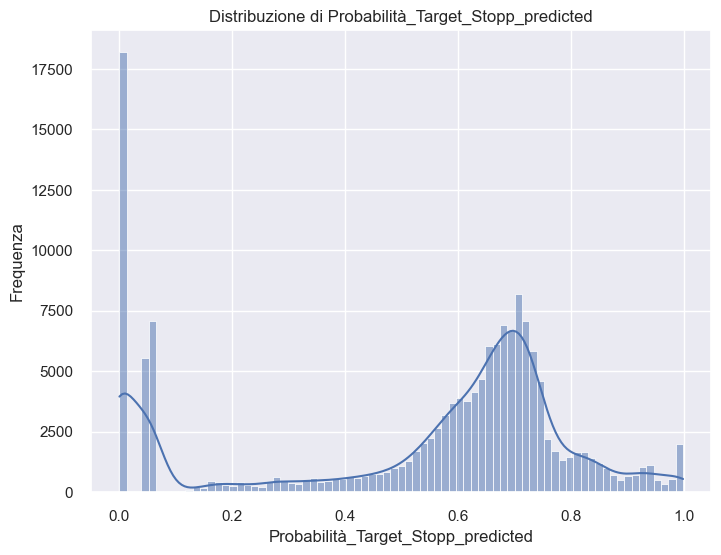

In [376]:
colonna_da_plottare = 'Probabilità_Target_Stopp_predicted'

# Crea un istogramma utilizzando seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_completo_con_sintetici[colonna_da_plottare], kde=True)  # kde=True aggiunge la stima della densità kernel
plt.title(f'Distribuzione di {colonna_da_plottare}')
plt.xlabel(colonna_da_plottare)
plt.ylabel('Frequenza')
plt.show()

### Previsione dati inventati

In [437]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113728 entries, 0 to 113727
Data columns (total 52 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Eta_Debitore                                        113728 non-null  float64
 1   RATIO_ONERI_AFF_TOT_AFF                             113728 non-null  float64
 2   Cash Balance                                        113728 non-null  float64
 3   DurataFinanziamentoAnni                             113728 non-null  float64
 4   IMP_FINANZIATO                                      113728 non-null  float64
 5   AgeingErogazioneGg                                  113728 non-null  float64
 6   TOT_AFF                                             113728 non-null  float64
 7   Ratio_Rate_Imp1                                     113728 non-null  float64
 8   DistanzaAffidoUltimoPagamento                       113728 non-n

In [438]:
X_res.iloc[0:1]

Eta_Debitore  RATIO_ONERI_AFF_TOT_AFF  Cash Balance  \
0         43.00                     0.09      3,413.69   

   DurataFinanziamentoAnni  IMP_FINANZIATO  AgeingErogazioneGg  TOT_AFF  \
0                     5.00        5,577.00              822.00   131.25   

   Ratio_Rate_Imp1  DistanzaAffidoUltimoPagamento  AgeingGestioneGg  \
0             0.45                           1.00             15.00   

   Sesso_Non Valutabile  Sesso_Uomo  Nazionalita_Italiano  \
0                     0           1                     1   

   Nazionalita_Non Valutabile  Denominazione Regione_Basilicata  \
0                           0                                 0   

   Denominazione Regione_Calabria  Denominazione Regione_Campania  \
0                               0                               0   

   Denominazione Regione_Emilia-Romagna  \
0                                     0   

   Denominazione Regione_Friuli-Venezia Giulia  Denominazione Regione_Lazio  \
0                                            0                            1   

   Denominazione Regione_Liguria  Denominazione Regione_Lombardia  \
0                              0                                0   

   Denominazione Regione_Marche  Denominazione Regione_Molise  \
0                             0                             0   

   Denominazione Regione_Non Valutabile  Denominazione Regione_Piemonte  \
0                                     0                               0   

   Denominazione Regione_Puglia  Denominazione Regione_Sardegna  \
0                             0                               0   

   Denominazione Regione_Sicilia  Denominazione Regione_Toscana  \
0                              0                              0   

   Denominazione Regione_Trentino-Alto Adige/Südtirol  \
0                                                  0    

   Denominazione Regione_Umbria  \
0                             0   

   Denominazione Regione_Valle d'Aosta/Vallée d'Aoste  \
0                                                  0    

   Denominazione Regione_Veneto  Metodo_pagamento_RI  NOSTART12M_SI  \
0                             0                    0              0   

   NOSTART6M_SI  DESCRIZIONE PRODOTTO_ARREDAMENTO  \
0             0                                 0   

   DESCRIZIONE PRODOTTO_AUTOMOTIVE NUOVO  \
0                                      0   

   DESCRIZIONE PRODOTTO_AUTOMOTIVE USATO  \
0                                      0   

   DESCRIZIONE PRODOTTO_ELETTRONICA & ELETTRODOME  \
0                                               0   

   DESCRIZIONE PRODOTTO_FINANZIAMENTI AZIENDE  \
0                                           0   

   DESCRIZIONE PRODOTTO_INTERVENTI CASA  \
0                                     0   

   DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI  \
0                                        0   

   DESCRIZIONE PRODOTTO_PRESTITI CON TRATTENUTA  \
0                                             0   

   DESCRIZIONE PRODOTTO_PRESTITO PERSONALE  \
0                                        1   

   DESCRIZIONE PRODOTTO_SPESE MEDICHE  DESCRIZIONE PRODOTTO_TEMPO LIBERO  \
0                                   0                                  0   

   MACROAREA_Non Valutabile  MACROAREA_Nord_Est  MACROAREA_Nord_Ovest  \
0                         0                   0                     0   

   MACROAREA_Sud_e_Isole  
0                      0

In [ ]:
# dati_inventati = pd.DataFrame({'TOT_AFF': 204.82, 'TOT_ONERI_AFF': 18.62, 'Eta_Debitore':49.894593, 'AgeingErogazioneGg': 1898, 'IMP_FINANZIATO': 16201, 'AgeingGestioneGg': 14}, index=[0])
# modello_scelto.predict_proba(dati_inventati)[0][0]

### Scopro nuove cose

In [439]:
path = modello_scelto.estimators_[0].cost_complexity_pruning_path(X_res, y_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [440]:
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 2.18745953e-07, 3.12636779e-07,
       3.54158851e-07, 4.37460102e-07, 8.43931266e-07, 1.24525861e-06,
       1.29986581e-06, 1.30265324e-06, 1.36080741e-06, 1.36938753e-06,
       1.39652090e-06, 1.58103275e-06, 1.58248392e-06, 1.75492578e-06,
       1.75858188e-06, 1.77023794e-06, 2.13161440e-06, 2.63787282e-06,
       2.63787282e-06, 2.75855981e-06, 2.78577817e-06, 2.82629231e-06,
       2.90654505e-06, 2.93096980e-06, 2.93096980e-06, 2.93096980e-06,
       3.10287419e-06, 3.13216810e-06, 3.22406678e-06, 3.44070368e-06,
       3.46233827e-06, 3.51716376e-06, 3.66371225e-06, 3.66371225e-06,
       3.66908704e-06, 3.71905047e-06, 3.74005598e-06, 3.81026074e-06,
       3.90989054e-06, 4.01961572e-06, 4.12167628e-06, 4.19661585e-06,
       4.35204607e-06, 4.44086333e-06, 4.50918431e-06, 4.54370438e-06,
       4.68955168e-06, 4.68955168e-06, 5.18178316e-06, 5.23387464e-06,
       5.27130029e-06, 5.47114363e-06, 5.82588013e-06, 5.86193960e-06,
      

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

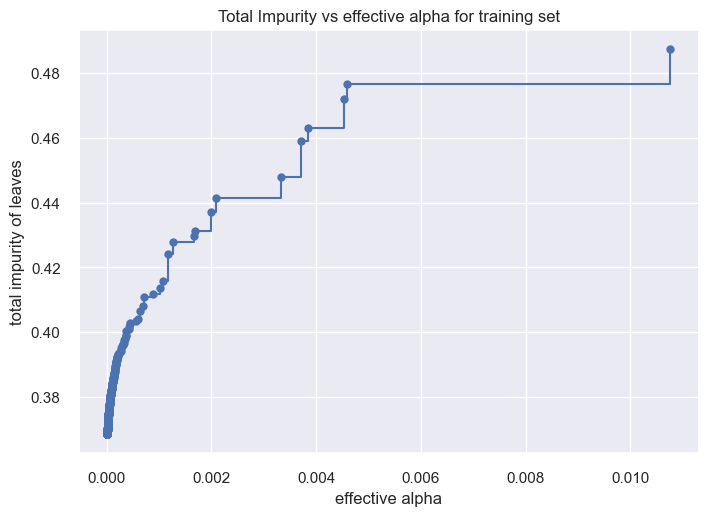

In [441]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")